In [64]:
# Required libraries
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import xarray as xr
import sys
import re
from tqdm import tqdm
from datetime import datetime

# Reading .he5 files for the year 2004

In [47]:
data_dir = '/Users/nawarajadhikari/OMI_O3_Data/2004'

# Path for ozone field
data_path = '/HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ColumnAmountO3'

# Initialize lists
dates = []
ozone_data = []

# Loop through files
for filename in sorted(os.listdir(data_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(data_dir, filename)
        
        # Extract date from filename (omi_O3_YYYYMMDD.he5)
        match = re.search(r'(\d{8})', filename)
        if match:
            date = match.group(1)
        else:
            date = 'unknown'
        
        with h5py.File(file_path, 'r') as f:
            if data_path in f:
                data = f[data_path][()]
                data = np.where(data < 0, np.nan, data)  # Filter invalid values
                
                dates.append(date)
                ozone_data.append(data)
                print(f"✅ Loaded {filename} with shape {data.shape}")
            else:
                print(f"❌ {filename} missing {data_path}")

print(f"\nTotal files read: {len(ozone_data)}")

# Print first file shape
if ozone_data:
    print(f"First file shape: {ozone_data[0].shape}")


✅ Loaded omi_O3_20041001.he5 with shape (720, 1440)
✅ Loaded omi_O3_20041002.he5 with shape (720, 1440)
✅ Loaded omi_O3_20041003.he5 with shape (720, 1440)
✅ Loaded omi_O3_20041004.he5 with shape (720, 1440)
✅ Loaded omi_O3_20041005.he5 with shape (720, 1440)
✅ Loaded omi_O3_20041006.he5 with shape (720, 1440)
✅ Loaded omi_O3_20041007.he5 with shape (720, 1440)
✅ Loaded omi_O3_20041008.he5 with shape (720, 1440)
✅ Loaded omi_O3_20041009.he5 with shape (720, 1440)
✅ Loaded omi_O3_20041010.he5 with shape (720, 1440)
✅ Loaded omi_O3_20041011.he5 with shape (720, 1440)
✅ Loaded omi_O3_20041012.he5 with shape (720, 1440)
✅ Loaded omi_O3_20041013.he5 with shape (720, 1440)
✅ Loaded omi_O3_20041014.he5 with shape (720, 1440)
✅ Loaded omi_O3_20041015.he5 with shape (720, 1440)
✅ Loaded omi_O3_20041016.he5 with shape (720, 1440)
✅ Loaded omi_O3_20041017.he5 with shape (720, 1440)
✅ Loaded omi_O3_20041018.he5 with shape (720, 1440)
✅ Loaded omi_O3_20041019.he5 with shape (720, 1440)
✅ Loaded omi

# Converting .he5 into  .nc 

In [63]:

from datetime import datetime

# Input and output directories
input_dir = '/Users/nawarajadhikari/OMI_O3_Data/2004'
output_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2004'
os.makedirs(output_dir, exist_ok=True)

# Data path inside HE5 file
data_path = '/HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ColumnAmountO3'

# Generate latitude and longitude arrays (for 0.25° global grid)
lat = np.arange(-89.875, 90, 0.25)
lon = np.arange(-179.875, 180, 0.25)

# Loop through each HE5 file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.he5'):
        match = re.search(r'(\d{8})', filename)
        if not match:
            print(f"Skipping {filename} (no date found)")
            continue
        
        date_str = match.group(1)
        date = datetime.strptime(date_str, "%Y%m%d")
        
        file_path = os.path.join(input_dir, filename)
        
        # Read data
        with h5py.File(file_path, 'r') as f:
            if data_path not in f:
                print(f"Data field missing in {filename}")
                continue
            
            data = f[data_path][()]
            data = np.where(data < 0, np.nan, data)  # Filter invalid values
        
        # Create xarray Dataset
        ds = xr.Dataset(
            {
                "ColumnAmountO3": (("lat", "lon"), data)
            },
            coords={
                "lat": lat,
                "lon": lon,
                "time": np.array([date])
            },
            attrs={
                "title": "OMI Total Column Ozone",
                "source": "OMDOAO3e.003",
                "date": date_str,
                "units": "Dobson Units"
            }
        )
        
        # Save as NetCDF
        output_file = os.path.join(output_dir, f"omi_O3_{date_str}.nc")
        ds.to_netcdf(output_file)
        print(f"✅ Saved {output_file}")


✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2004/omi_O3_20041001.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2004/omi_O3_20041002.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2004/omi_O3_20041003.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2004/omi_O3_20041004.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2004/omi_O3_20041005.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2004/omi_O3_20041006.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2004/omi_O3_20041007.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2004/omi_O3_20041008.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2004/omi_O3_20041009.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2004/omi_O3_20041010.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2004/omi_O3_20041011.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3

# Extracting the files for the Texas Region 

In [ ]:

# Input and output directories
input_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2004'
#/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF
output_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2004'
os.makedirs(output_dir, exist_ok=True)

# Texas bounding box
lat_min, lat_max = 25, 36.5
lon_min, lon_max = -108, -93

for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.nc'):
        input_file = os.path.join(input_dir, filename)

        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        date_str = match.group(1) if match else "unknown"

        # Open NetCDF
        ds = xr.open_dataset(input_file)

        # Subset Texas region
        ds_texas = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

        # Save Texas subset as NetCDF
        output_file = os.path.join(output_dir, f"omi_O3_Texas_{date_str}.nc")
        ds_texas.to_netcdf(output_file)

        print(f"✅ Saved Texas subset: {output_file}")


✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2004/omi_O3_Texas_20041001.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2004/omi_O3_Texas_20041002.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2004/omi_O3_Texas_20041003.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2004/omi_O3_Texas_20041004.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2004/omi_O3_Texas_20041005.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2004/omi_O3_Texas_20041006.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2004/omi_O3_Texas_20041007.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2004/omi_O3_Texas_20041008.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2004/omi_O3_Texas_20041009.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_P

# Computation of annual mean for 2004

In [129]:
import xarray as xr
import os

# Directory containing daily Texas subset NetCDF files
input_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2004'

# Open all daily files as a single xarray dataset
ds = xr.open_mfdataset(
    os.path.join(input_dir, '*.nc'),
    combine='by_coords'
)

# Compute annual mean
annual_mean_2004 = ds['ColumnAmountO3'].mean(dim='time', skipna=True)

print("✅ Annual mean calculated for Texas (2004)")
print(annual_mean_2004)

# Save to NetCDF
output_file = '/Users/nawarajadhikari/Capstone_project/OMI_O3_Texas_Annual_Mean/AnnualMean_Texas_2004.nc'
annual_mean_2004.to_netcdf(output_file)
print(f"✅ Saved annual mean to {output_file}")


✅ Annual mean calculated for Texas (2004)
<xarray.DataArray 'ColumnAmountO3' (lat: 46, lon: 60)> Size: 11kB
dask.array<mean_agg-aggregate, shape=(46, 60), dtype=float32, chunksize=(46, 60), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 368B 25.12 25.38 25.62 25.88 ... 35.88 36.12 36.38
  * lon      (lon) float64 480B -107.9 -107.6 -107.4 ... -93.62 -93.38 -93.12
✅ Saved annual mean to /Users/nawarajadhikari/Capstone_project/OMI_O3_Texas_Annual_Mean/AnnualMean_Texas_2004.nc


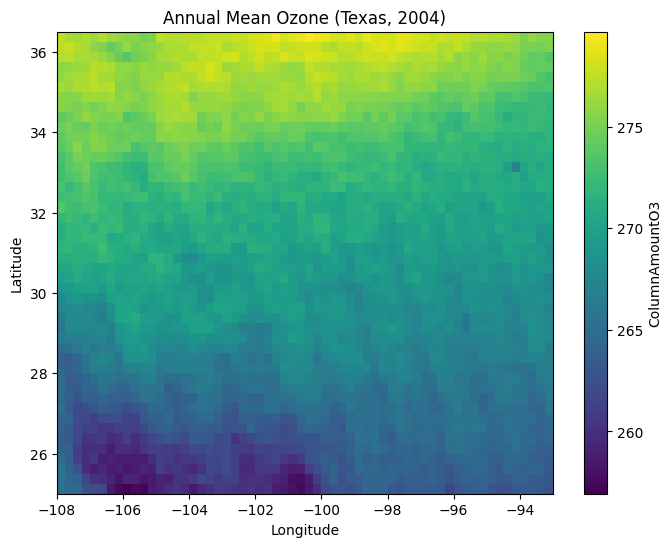

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
annual_mean_2004.plot(cmap='viridis')
plt.title('Annual Mean Ozone (Texas, 2004)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


# Reading .he5 files for the year 2005

In [74]:
data_dir = '/Users/nawarajadhikari/OMI_O3_Data/2005'

# Path for ozone field
data_path = '/HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ColumnAmountO3'

# Initialize lists
dates = []
ozone_data = []

# Loop through files
for filename in sorted(os.listdir(data_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(data_dir, filename)
        
        # Extract date from filename (omi_O3_YYYYMMDD.he5)
        match = re.search(r'(\d{8})', filename)
        if match:
            date = match.group(1)
        else:
            date = 'unknown'
        
        with h5py.File(file_path, 'r') as f:
            if data_path in f:
                data = f[data_path][()]
                data = np.where(data < 0, np.nan, data)  # Filter invalid values
                
                dates.append(date)
                ozone_data.append(data)
                print(f"✅ Loaded {filename} with shape {data.shape}")
            else:
                print(f"❌ {filename} missing {data_path}")

print(f"\nTotal files read: {len(ozone_data)}")

# Print first file shape
if ozone_data:
    print(f"First file shape: {ozone_data[0].shape}")


✅ Loaded omi_O3_20050101.he5 with shape (720, 1440)
✅ Loaded omi_O3_20050102.he5 with shape (720, 1440)
✅ Loaded omi_O3_20050103.he5 with shape (720, 1440)
✅ Loaded omi_O3_20050104.he5 with shape (720, 1440)
✅ Loaded omi_O3_20050105.he5 with shape (720, 1440)
✅ Loaded omi_O3_20050106.he5 with shape (720, 1440)
✅ Loaded omi_O3_20050107.he5 with shape (720, 1440)
✅ Loaded omi_O3_20050108.he5 with shape (720, 1440)
✅ Loaded omi_O3_20050109.he5 with shape (720, 1440)
✅ Loaded omi_O3_20050110.he5 with shape (720, 1440)
✅ Loaded omi_O3_20050111.he5 with shape (720, 1440)
✅ Loaded omi_O3_20050112.he5 with shape (720, 1440)
✅ Loaded omi_O3_20050113.he5 with shape (720, 1440)
✅ Loaded omi_O3_20050114.he5 with shape (720, 1440)
✅ Loaded omi_O3_20050115.he5 with shape (720, 1440)
✅ Loaded omi_O3_20050116.he5 with shape (720, 1440)
✅ Loaded omi_O3_20050117.he5 with shape (720, 1440)
✅ Loaded omi_O3_20050118.he5 with shape (720, 1440)
✅ Loaded omi_O3_20050119.he5 with shape (720, 1440)
✅ Loaded omi

# Converting .he5 files into .nc for 2005

In [75]:
from datetime import datetime

# Input and output directories
input_dir = '/Users/nawarajadhikari/OMI_O3_Data/2005'
output_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2005'
os.makedirs(output_dir, exist_ok=True)

# Data path inside HE5 file
data_path = '/HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ColumnAmountO3'

# Generate latitude and longitude arrays (for 0.25° global grid)
lat = np.arange(-89.875, 90, 0.25)
lon = np.arange(-179.875, 180, 0.25)

# Loop through each HE5 file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.he5'):
        match = re.search(r'(\d{8})', filename)
        if not match:
            print(f"Skipping {filename} (no date found)")
            continue
        
        date_str = match.group(1)
        date = datetime.strptime(date_str, "%Y%m%d")
        
        file_path = os.path.join(input_dir, filename)
        
        # Read data
        with h5py.File(file_path, 'r') as f:
            if data_path not in f:
                print(f"Data field missing in {filename}")
                continue
            
            data = f[data_path][()]
            data = np.where(data < 0, np.nan, data)  # Filter invalid values
        
        # Create xarray Dataset
        ds = xr.Dataset(
            {
                "ColumnAmountO3": (("lat", "lon"), data)
            },
            coords={
                "lat": lat,
                "lon": lon,
                "time": np.array([date])
            },
            attrs={
                "title": "OMI Total Column Ozone",
                "source": "OMDOAO3e.003",
                "date": date_str,
                "units": "Dobson Units"
            }
        )
        
        # Save as NetCDF
        output_file = os.path.join(output_dir, f"omi_O3_{date_str}.nc")
        ds.to_netcdf(output_file)
        print(f"✅ Saved {output_file}")


✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2005/omi_O3_20050101.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2005/omi_O3_20050102.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2005/omi_O3_20050103.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2005/omi_O3_20050104.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2005/omi_O3_20050105.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2005/omi_O3_20050106.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2005/omi_O3_20050107.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2005/omi_O3_20050108.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2005/omi_O3_20050109.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2005/omi_O3_20050110.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2005/omi_O3_20050111.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3

# Extracting files for the Texas region for 2005

In [76]:

# Input and output directories
input_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2005'
#/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF
output_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2005'
os.makedirs(output_dir, exist_ok=True)

# Texas bounding box
lat_min, lat_max = 25, 36.5
lon_min, lon_max = -108, -93

for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.nc'):
        input_file = os.path.join(input_dir, filename)

        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        date_str = match.group(1) if match else "unknown"

        # Open NetCDF
        ds = xr.open_dataset(input_file)

        # Subset Texas region
        ds_texas = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

        # Save Texas subset as NetCDF
        output_file = os.path.join(output_dir, f"omi_O3_Texas_{date_str}.nc")
        ds_texas.to_netcdf(output_file)

        print(f"✅ Saved Texas subset: {output_file}")


✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2005/omi_O3_Texas_20050101.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2005/omi_O3_Texas_20050102.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2005/omi_O3_Texas_20050103.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2005/omi_O3_Texas_20050104.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2005/omi_O3_Texas_20050105.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2005/omi_O3_Texas_20050106.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2005/omi_O3_Texas_20050107.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2005/omi_O3_Texas_20050108.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2005/omi_O3_Texas_20050109.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_P

# Computation of Annual Mean for the year 2005

In [85]:
# Directory containing daily Texas subset NetCDF files
input_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2005'

# Open all daily files as a single xarray dataset
ds = xr.open_mfdataset(
    os.path.join(input_dir, '*.nc'),
    combine='by_coords'
)

# Compute annual mean
annual_mean_2005 = ds['ColumnAmountO3'].mean(dim='time', skipna=True)

print("✅ Annual mean calculated for Texas (2005)")
print(annual_mean_2005)

# Save to NetCDF
output_file = '/Users/nawarajadhikari/Capstone_project/OMI_O3_Texas_Annual_Mean/OMI_O3_AnnualMean_Texas_2005.nc'
annual_mean_2005.to_netcdf(output_file)
print(f"✅ Saved annual mean to {output_file}")


✅ Annual mean calculated for Texas (2005)
<xarray.DataArray 'ColumnAmountO3' (lat: 46, lon: 60)> Size: 11kB
dask.array<mean_agg-aggregate, shape=(46, 60), dtype=float32, chunksize=(46, 60), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 368B 25.12 25.38 25.62 25.88 ... 35.88 36.12 36.38
  * lon      (lon) float64 480B -107.9 -107.6 -107.4 ... -93.62 -93.38 -93.12
✅ Saved annual mean to /Users/nawarajadhikari/Capstone_project/OMI_O3_Texas_Annual_Mean/OMI_O3_AnnualMean_Texas_2005.nc


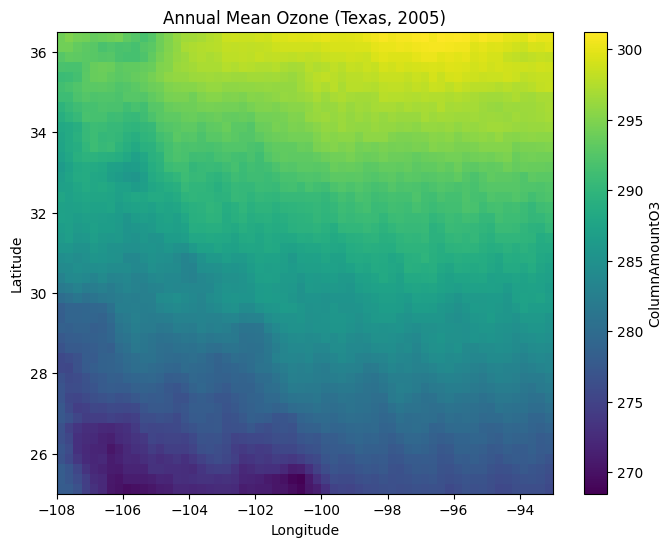

In [88]:
plt.figure(figsize=(8, 6))
annual_mean_2005.plot(cmap='viridis')
plt.title('Annual Mean Ozone (Texas, 2005)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Reading .he5 files for the year 2006

In [64]:
data_dir = '/Users/nawarajadhikari/OMI_O3_Data/2006'

# Path for ozone field
data_path = '/HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ColumnAmountO3'

# Initialize lists
dates = []
ozone_data = []

# Loop through files
for filename in sorted(os.listdir(data_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(data_dir, filename)
        
        # Extract date from filename (omi_O3_YYYYMMDD.he5)
        match = re.search(r'(\d{8})', filename)
        if match:
            date = match.group(1)
        else:
            date = 'unknown'
        
        with h5py.File(file_path, 'r') as f:
            if data_path in f:
                data = f[data_path][()]
                data = np.where(data < 0, np.nan, data)  # Filter invalid values
                
                dates.append(date)
                ozone_data.append(data)
                print(f"✅ Loaded {filename} with shape {data.shape}")
            else:
                print(f"❌ {filename} missing {data_path}")

print(f"\nTotal files read: {len(ozone_data)}")

# Print first file shape
if ozone_data:
    print(f"First file shape: {ozone_data[0].shape}")


✅ Loaded omi_O3_20060101.he5 with shape (720, 1440)
✅ Loaded omi_O3_20060102.he5 with shape (720, 1440)
✅ Loaded omi_O3_20060103.he5 with shape (720, 1440)
✅ Loaded omi_O3_20060104.he5 with shape (720, 1440)
✅ Loaded omi_O3_20060105.he5 with shape (720, 1440)
✅ Loaded omi_O3_20060106.he5 with shape (720, 1440)
✅ Loaded omi_O3_20060107.he5 with shape (720, 1440)
✅ Loaded omi_O3_20060108.he5 with shape (720, 1440)
✅ Loaded omi_O3_20060109.he5 with shape (720, 1440)
✅ Loaded omi_O3_20060110.he5 with shape (720, 1440)
✅ Loaded omi_O3_20060111.he5 with shape (720, 1440)
✅ Loaded omi_O3_20060112.he5 with shape (720, 1440)
✅ Loaded omi_O3_20060113.he5 with shape (720, 1440)
✅ Loaded omi_O3_20060114.he5 with shape (720, 1440)
✅ Loaded omi_O3_20060115.he5 with shape (720, 1440)
✅ Loaded omi_O3_20060116.he5 with shape (720, 1440)
✅ Loaded omi_O3_20060117.he5 with shape (720, 1440)
✅ Loaded omi_O3_20060118.he5 with shape (720, 1440)
✅ Loaded omi_O3_20060119.he5 with shape (720, 1440)
✅ Loaded omi

# Converting .he5 into  .nc for 2006

In [65]:
from datetime import datetime

# Input and output directories
input_dir = '/Users/nawarajadhikari/OMI_O3_Data/2006'
output_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2006'
os.makedirs(output_dir, exist_ok=True)

# Data path inside HE5 file
data_path = '/HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ColumnAmountO3'

# Generate latitude and longitude arrays (for 0.25° global grid)
lat = np.arange(-89.875, 90, 0.25)
lon = np.arange(-179.875, 180, 0.25)

# Loop through each HE5 file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.he5'):
        match = re.search(r'(\d{8})', filename)
        if not match:
            print(f"Skipping {filename} (no date found)")
            continue
        
        date_str = match.group(1)
        date = datetime.strptime(date_str, "%Y%m%d")
        
        file_path = os.path.join(input_dir, filename)
        
        # Read data
        with h5py.File(file_path, 'r') as f:
            if data_path not in f:
                print(f"Data field missing in {filename}")
                continue
            
            data = f[data_path][()]
            data = np.where(data < 0, np.nan, data)  # Filter invalid values
        
        # Create xarray Dataset
        ds = xr.Dataset(
            {
                "ColumnAmountO3": (("lat", "lon"), data)
            },
            coords={
                "lat": lat,
                "lon": lon,
                "time": np.array([date])
            },
            attrs={
                "title": "OMI Total Column Ozone",
                "source": "OMDOAO3e.003",
                "date": date_str,
                "units": "Dobson Units"
            }
        )
        
        # Save as NetCDF
        output_file = os.path.join(output_dir, f"omi_O3_{date_str}.nc")
        ds.to_netcdf(output_file)
        print(f"✅ Saved {output_file}")


✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2006/omi_O3_20060101.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2006/omi_O3_20060102.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2006/omi_O3_20060103.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2006/omi_O3_20060104.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2006/omi_O3_20060105.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2006/omi_O3_20060106.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2006/omi_O3_20060107.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2006/omi_O3_20060108.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2006/omi_O3_20060109.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2006/omi_O3_20060110.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2006/omi_O3_20060111.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3

# Extracting the files for the Texas Region_ 2006

In [66]:
# Input and output directories
input_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2006'
#/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF
output_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2006'
os.makedirs(output_dir, exist_ok=True)

# Texas bounding box
lat_min, lat_max = 25, 36.5
lon_min, lon_max = -108, -93

for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.nc'):
        input_file = os.path.join(input_dir, filename)

        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        date_str = match.group(1) if match else "unknown"

        # Open NetCDF
        ds = xr.open_dataset(input_file)

        # Subset Texas region
        ds_texas = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

        # Save Texas subset as NetCDF
        output_file = os.path.join(output_dir, f"omi_O3_Texas_{date_str}.nc")
        ds_texas.to_netcdf(output_file)

        print(f"✅ Saved Texas subset: {output_file}")


✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2006/omi_O3_Texas_20060101.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2006/omi_O3_Texas_20060102.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2006/omi_O3_Texas_20060103.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2006/omi_O3_Texas_20060104.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2006/omi_O3_Texas_20060105.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2006/omi_O3_Texas_20060106.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2006/omi_O3_Texas_20060107.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2006/omi_O3_Texas_20060108.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2006/omi_O3_Texas_20060109.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_P

# Computation of Annual Mean for 2006

In [87]:
# Directory containing daily Texas subset NetCDF files
input_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2006'

# Open all daily files as a single xarray dataset
ds = xr.open_mfdataset(
    os.path.join(input_dir, '*.nc'),
    combine='by_coords'
)

# Compute annual mean
annual_mean_2006 = ds['ColumnAmountO3'].mean(dim='time', skipna=True)

print("✅ Annual mean calculated for Texas (2006)")
print(annual_mean_2006)

# Save to NetCDF
output_file = '/Users/nawarajadhikari/Capstone_project/OMI_O3_Texas_Annual_Mean/OMI_O3_AnnualMean_Texas_2006.nc'
annual_mean_2006.to_netcdf(output_file)
print(f"✅ Saved annual mean to {output_file}")


✅ Annual mean calculated for Texas (2006)
<xarray.DataArray 'ColumnAmountO3' (lat: 46, lon: 60)> Size: 11kB
dask.array<mean_agg-aggregate, shape=(46, 60), dtype=float32, chunksize=(46, 60), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 368B 25.12 25.38 25.62 25.88 ... 35.88 36.12 36.38
  * lon      (lon) float64 480B -107.9 -107.6 -107.4 ... -93.62 -93.38 -93.12
✅ Saved annual mean to /Users/nawarajadhikari/Capstone_project/OMI_O3_Texas_Annual_Mean/OMI_O3_AnnualMean_Texas_2006.nc


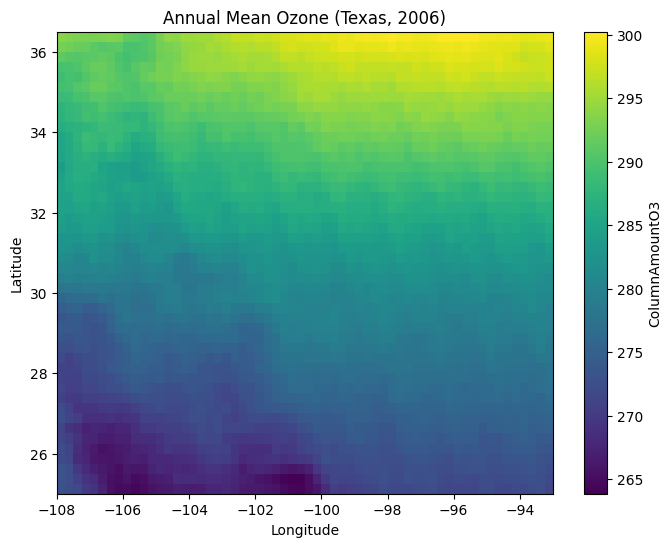

In [89]:
plt.figure(figsize=(8, 6))
annual_mean_2006.plot(cmap='viridis')
plt.title('Annual Mean Ozone (Texas, 2006)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Reading .he5 files for the year 2007

In [67]:
data_dir = '/Users/nawarajadhikari/OMI_O3_Data/2007'

# Path for ozone field
data_path = '/HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ColumnAmountO3'

# Initialize lists
dates = []
ozone_data = []

# Loop through files
for filename in sorted(os.listdir(data_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(data_dir, filename)
        
        # Extract date from filename (omi_O3_YYYYMMDD.he5)
        match = re.search(r'(\d{8})', filename)
        if match:
            date = match.group(1)
        else:
            date = 'unknown'
        
        with h5py.File(file_path, 'r') as f:
            if data_path in f:
                data = f[data_path][()]
                data = np.where(data < 0, np.nan, data)  # Filter invalid values
                
                dates.append(date)
                ozone_data.append(data)
                print(f"✅ Loaded {filename} with shape {data.shape}")
            else:
                print(f"❌ {filename} missing {data_path}")

print(f"\nTotal files read: {len(ozone_data)}")

# Print first file shape
if ozone_data:
    print(f"First file shape: {ozone_data[0].shape}")


✅ Loaded omi_O3_20070101.he5 with shape (720, 1440)
✅ Loaded omi_O3_20070102.he5 with shape (720, 1440)
✅ Loaded omi_O3_20070103.he5 with shape (720, 1440)
✅ Loaded omi_O3_20070104.he5 with shape (720, 1440)
✅ Loaded omi_O3_20070105.he5 with shape (720, 1440)
✅ Loaded omi_O3_20070106.he5 with shape (720, 1440)
✅ Loaded omi_O3_20070107.he5 with shape (720, 1440)
✅ Loaded omi_O3_20070108.he5 with shape (720, 1440)
✅ Loaded omi_O3_20070109.he5 with shape (720, 1440)
✅ Loaded omi_O3_20070110.he5 with shape (720, 1440)
✅ Loaded omi_O3_20070111.he5 with shape (720, 1440)
✅ Loaded omi_O3_20070112.he5 with shape (720, 1440)
✅ Loaded omi_O3_20070113.he5 with shape (720, 1440)
✅ Loaded omi_O3_20070114.he5 with shape (720, 1440)
✅ Loaded omi_O3_20070115.he5 with shape (720, 1440)
✅ Loaded omi_O3_20070116.he5 with shape (720, 1440)
✅ Loaded omi_O3_20070117.he5 with shape (720, 1440)
✅ Loaded omi_O3_20070118.he5 with shape (720, 1440)
✅ Loaded omi_O3_20070119.he5 with shape (720, 1440)
✅ Loaded omi

# Converting .he5 into  .nc for 2007

In [68]:


# Input and output directories
input_dir = '/Users/nawarajadhikari/OMI_O3_Data/2007'
output_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2007'
os.makedirs(output_dir, exist_ok=True)

# Data path inside HE5 file
data_path = '/HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ColumnAmountO3'

# Generate latitude and longitude arrays (for 0.25° global grid)
lat = np.arange(-89.875, 90, 0.25)
lon = np.arange(-179.875, 180, 0.25)

# Loop through each HE5 file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.he5'):
        match = re.search(r'(\d{8})', filename)
        if not match:
            print(f"Skipping {filename} (no date found)")
            continue
        
        date_str = match.group(1)
        date = datetime.strptime(date_str, "%Y%m%d")
        
        file_path = os.path.join(input_dir, filename)
        
        # Read data
        with h5py.File(file_path, 'r') as f:
            if data_path not in f:
                print(f"Data field missing in {filename}")
                continue
            
            data = f[data_path][()]
            data = np.where(data < 0, np.nan, data)  # Filter invalid values
        
        # Create xarray Dataset
        ds = xr.Dataset(
            {
                "ColumnAmountO3": (("lat", "lon"), data)
            },
            coords={
                "lat": lat,
                "lon": lon,
                "time": np.array([date])
            },
            attrs={
                "title": "OMI Total Column Ozone",
                "source": "OMDOAO3e.003",
                "date": date_str,
                "units": "Dobson Units"
            }
        )
        
        # Save as NetCDF
        output_file = os.path.join(output_dir, f"omi_O3_{date_str}.nc")
        ds.to_netcdf(output_file)
        print(f"✅ Saved {output_file}")


✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2007/omi_O3_20070101.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2007/omi_O3_20070102.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2007/omi_O3_20070103.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2007/omi_O3_20070104.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2007/omi_O3_20070105.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2007/omi_O3_20070106.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2007/omi_O3_20070107.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2007/omi_O3_20070108.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2007/omi_O3_20070109.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2007/omi_O3_20070110.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2007/omi_O3_20070111.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3

# Extracting the files for the Texas Region_ 2007

In [69]:
# Input and output directories
input_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2007'
#/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF
output_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2007'
os.makedirs(output_dir, exist_ok=True)

# Texas bounding box
lat_min, lat_max = 25, 36.5
lon_min, lon_max = -108, -93

for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.nc'):
        input_file = os.path.join(input_dir, filename)

        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        date_str = match.group(1) if match else "unknown"

        # Open NetCDF
        ds = xr.open_dataset(input_file)

        # Subset Texas region
        ds_texas = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

        # Save Texas subset as NetCDF
        output_file = os.path.join(output_dir, f"omi_O3_Texas_{date_str}.nc")
        ds_texas.to_netcdf(output_file)

        print(f"✅ Saved Texas subset: {output_file}")


✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2007/omi_O3_Texas_20070101.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2007/omi_O3_Texas_20070102.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2007/omi_O3_Texas_20070103.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2007/omi_O3_Texas_20070104.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2007/omi_O3_Texas_20070105.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2007/omi_O3_Texas_20070106.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2007/omi_O3_Texas_20070107.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2007/omi_O3_Texas_20070108.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2007/omi_O3_Texas_20070109.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_P

# Computation of Annual Mean for 2007

In [92]:
# Directory containing daily Texas subset NetCDF files
input_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2007'

# Open all daily files as a single xarray dataset
ds = xr.open_mfdataset(
    os.path.join(input_dir, '*.nc'),
    combine='by_coords'
)

# Compute annual mean
annual_mean_2007 = ds['ColumnAmountO3'].mean(dim='time', skipna=True)

print("✅ Annual mean calculated for Texas (2007)")
print(annual_mean_2007)

# Save to NetCDF
output_file = '/Users/nawarajadhikari/Capstone_project/OMI_O3_Texas_Annual_Mean/OMI_O3_AnnualMean_Texas_2007.nc'
annual_mean_2007.to_netcdf(output_file)
print(f"✅ Saved annual mean to {output_file}")


✅ Annual mean calculated for Texas (2007)
<xarray.DataArray 'ColumnAmountO3' (lat: 46, lon: 60)> Size: 11kB
dask.array<mean_agg-aggregate, shape=(46, 60), dtype=float32, chunksize=(46, 60), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 368B 25.12 25.38 25.62 25.88 ... 35.88 36.12 36.38
  * lon      (lon) float64 480B -107.9 -107.6 -107.4 ... -93.62 -93.38 -93.12
✅ Saved annual mean to /Users/nawarajadhikari/Capstone_project/OMI_O3_Texas_Annual_Mean/OMI_O3_AnnualMean_Texas_2007.nc


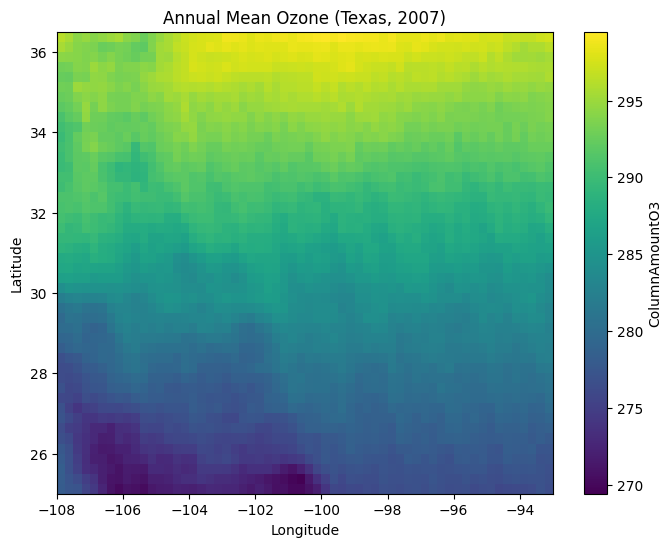

In [93]:
plt.figure(figsize=(8, 6))
annual_mean_2007.plot(cmap='viridis')
plt.title('Annual Mean Ozone (Texas, 2007)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Reading .he5 files for 2008

In [70]:
data_dir = '/Users/nawarajadhikari/OMI_O3_Data/2008'

# Path for ozone field
data_path = '/HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ColumnAmountO3'

# Initialize lists
dates = []
ozone_data = []

# Loop through files
for filename in sorted(os.listdir(data_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(data_dir, filename)
        
        # Extract date from filename (omi_O3_YYYYMMDD.he5)
        match = re.search(r'(\d{8})', filename)
        if match:
            date = match.group(1)
        else:
            date = 'unknown'
        
        with h5py.File(file_path, 'r') as f:
            if data_path in f:
                data = f[data_path][()]
                data = np.where(data < 0, np.nan, data)  # Filter invalid values
                
                dates.append(date)
                ozone_data.append(data)
                print(f"✅ Loaded {filename} with shape {data.shape}")
            else:
                print(f"❌ {filename} missing {data_path}")

print(f"\nTotal files read: {len(ozone_data)}")

# Print first file shape
if ozone_data:
    print(f"First file shape: {ozone_data[0].shape}")


✅ Loaded omi_O3_20080101.he5 with shape (720, 1440)
✅ Loaded omi_O3_20080102.he5 with shape (720, 1440)
✅ Loaded omi_O3_20080103.he5 with shape (720, 1440)
✅ Loaded omi_O3_20080104.he5 with shape (720, 1440)
✅ Loaded omi_O3_20080105.he5 with shape (720, 1440)
✅ Loaded omi_O3_20080106.he5 with shape (720, 1440)
✅ Loaded omi_O3_20080107.he5 with shape (720, 1440)
✅ Loaded omi_O3_20080108.he5 with shape (720, 1440)
✅ Loaded omi_O3_20080109.he5 with shape (720, 1440)
✅ Loaded omi_O3_20080110.he5 with shape (720, 1440)
✅ Loaded omi_O3_20080111.he5 with shape (720, 1440)
✅ Loaded omi_O3_20080112.he5 with shape (720, 1440)
✅ Loaded omi_O3_20080113.he5 with shape (720, 1440)
✅ Loaded omi_O3_20080114.he5 with shape (720, 1440)
✅ Loaded omi_O3_20080115.he5 with shape (720, 1440)
✅ Loaded omi_O3_20080116.he5 with shape (720, 1440)
✅ Loaded omi_O3_20080117.he5 with shape (720, 1440)
✅ Loaded omi_O3_20080118.he5 with shape (720, 1440)
✅ Loaded omi_O3_20080119.he5 with shape (720, 1440)
✅ Loaded omi

# Converting .he5 files into .nc for 2008

In [71]:
# Input and output directories
input_dir = '/Users/nawarajadhikari/OMI_O3_Data/2008'
output_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2008'
os.makedirs(output_dir, exist_ok=True)

# Data path inside HE5 file
data_path = '/HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ColumnAmountO3'

# Generate latitude and longitude arrays (for 0.25° global grid)
lat = np.arange(-89.875, 90, 0.25)
lon = np.arange(-179.875, 180, 0.25)

# Loop through each HE5 file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.he5'):
        match = re.search(r'(\d{8})', filename)
        if not match:
            print(f"Skipping {filename} (no date found)")
            continue
        
        date_str = match.group(1)
        date = datetime.strptime(date_str, "%Y%m%d")
        
        file_path = os.path.join(input_dir, filename)
        
        # Read data
        with h5py.File(file_path, 'r') as f:
            if data_path not in f:
                print(f"Data field missing in {filename}")
                continue
            
            data = f[data_path][()]
            data = np.where(data < 0, np.nan, data)  # Filter invalid values
        
        # Create xarray Dataset
        ds = xr.Dataset(
            {
                "ColumnAmountO3": (("lat", "lon"), data)
            },
            coords={
                "lat": lat,
                "lon": lon,
                "time": np.array([date])
            },
            attrs={
                "title": "OMI Total Column Ozone",
                "source": "OMDOAO3e.003",
                "date": date_str,
                "units": "Dobson Units"
            }
        )
        
        # Save as NetCDF
        output_file = os.path.join(output_dir, f"omi_O3_{date_str}.nc")
        ds.to_netcdf(output_file)
        print(f"✅ Saved {output_file}")


✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2008/omi_O3_20080101.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2008/omi_O3_20080102.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2008/omi_O3_20080103.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2008/omi_O3_20080104.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2008/omi_O3_20080105.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2008/omi_O3_20080106.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2008/omi_O3_20080107.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2008/omi_O3_20080108.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2008/omi_O3_20080109.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2008/omi_O3_20080110.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2008/omi_O3_20080111.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3

# Extracting the files for the Texas Region

In [72]:
# Input and output directories
input_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2008'
#/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF
output_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2008'
os.makedirs(output_dir, exist_ok=True)

# Texas bounding box
lat_min, lat_max = 25, 36.5
lon_min, lon_max = -108, -93

for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.nc'):
        input_file = os.path.join(input_dir, filename)

        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        date_str = match.group(1) if match else "unknown"

        # Open NetCDF
        ds = xr.open_dataset(input_file)

        # Subset Texas region
        ds_texas = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

        # Save Texas subset as NetCDF
        output_file = os.path.join(output_dir, f"omi_O3_Texas_{date_str}.nc")
        ds_texas.to_netcdf(output_file)

        print(f"✅ Saved Texas subset: {output_file}")


✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2008/omi_O3_Texas_20080101.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2008/omi_O3_Texas_20080102.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2008/omi_O3_Texas_20080103.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2008/omi_O3_Texas_20080104.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2008/omi_O3_Texas_20080105.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2008/omi_O3_Texas_20080106.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2008/omi_O3_Texas_20080107.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2008/omi_O3_Texas_20080108.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2008/omi_O3_Texas_20080109.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_P

# Computation of Annual Mean 2008

✅ Annual mean calculated for Texas (2008)
<xarray.DataArray 'ColumnAmountO3' (lat: 46, lon: 60)> Size: 11kB
dask.array<mean_agg-aggregate, shape=(46, 60), dtype=float32, chunksize=(46, 60), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 368B 25.12 25.38 25.62 25.88 ... 35.88 36.12 36.38
  * lon      (lon) float64 480B -107.9 -107.6 -107.4 ... -93.62 -93.38 -93.12
✅ Saved annual mean to /Users/nawarajadhikari/Capstone_project/OMI_O3_Texas_Annual_Mean/OMI_O3_AnnualMean_Texas_2008.nc


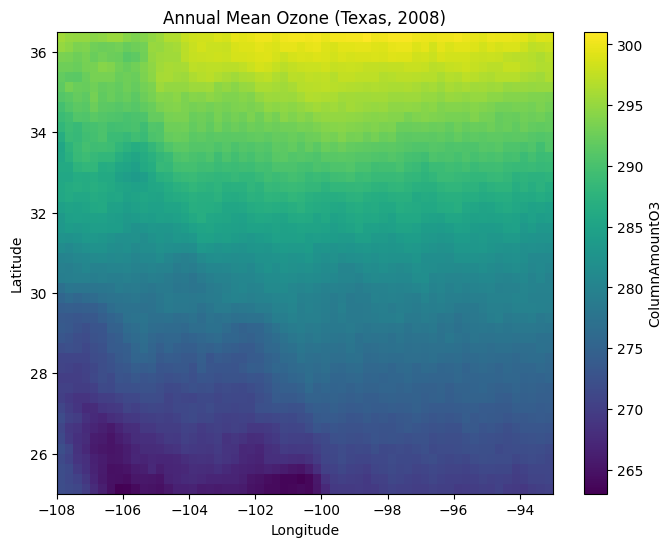

In [95]:
 # Directory containing daily Texas subset NetCDF files
input_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2008'

# Open all daily files as a single xarray dataset
ds = xr.open_mfdataset(
    os.path.join(input_dir, '*.nc'),
    combine='by_coords'
)

# Compute annual mean
annual_mean_2008 = ds['ColumnAmountO3'].mean(dim='time', skipna=True)

print("✅ Annual mean calculated for Texas (2008)")
print(annual_mean_2008)

# Save to NetCDF
output_file = '/Users/nawarajadhikari/Capstone_project/OMI_O3_Texas_Annual_Mean/OMI_O3_AnnualMean_Texas_2008.nc'
annual_mean_2008.to_netcdf(output_file)
print(f"✅ Saved annual mean to {output_file}")

#plot
plt.figure(figsize=(8, 6))
annual_mean_2008.plot(cmap='viridis')
plt.title('Annual Mean Ozone (Texas, 2008)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Reading .he5 files for 2009

In [2]:
data_dir = '/Users/nawarajadhikari/OMI_O3_Data/2009'

# Path for ozone field
data_path = '/HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ColumnAmountO3'

# Initialize lists
dates = []
ozone_data = []

# Loop through files
for filename in sorted(os.listdir(data_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(data_dir, filename)
        
        # Extract date from filename (omi_O3_YYYYMMDD.he5)
        match = re.search(r'(\d{8})', filename)
        if match:
            date = match.group(1)
        else:
            date = 'unknown'
        
        with h5py.File(file_path, 'r') as f:
            if data_path in f:
                data = f[data_path][()]
                data = np.where(data < 0, np.nan, data)  # Filter invalid values
                
                dates.append(date)
                ozone_data.append(data)
                print(f"✅ Loaded {filename} with shape {data.shape}")
            else:
                print(f"❌ {filename} missing {data_path}")

print(f"\nTotal files read: {len(ozone_data)}")

# Print first file shape
if ozone_data:
    print(f"First file shape: {ozone_data[0].shape}")


✅ Loaded omi_O3_20090101.he5 with shape (720, 1440)
✅ Loaded omi_O3_20090102.he5 with shape (720, 1440)
✅ Loaded omi_O3_20090103.he5 with shape (720, 1440)
✅ Loaded omi_O3_20090104.he5 with shape (720, 1440)
✅ Loaded omi_O3_20090105.he5 with shape (720, 1440)
✅ Loaded omi_O3_20090106.he5 with shape (720, 1440)
✅ Loaded omi_O3_20090107.he5 with shape (720, 1440)
✅ Loaded omi_O3_20090108.he5 with shape (720, 1440)
✅ Loaded omi_O3_20090109.he5 with shape (720, 1440)
✅ Loaded omi_O3_20090110.he5 with shape (720, 1440)
✅ Loaded omi_O3_20090111.he5 with shape (720, 1440)
✅ Loaded omi_O3_20090112.he5 with shape (720, 1440)
✅ Loaded omi_O3_20090113.he5 with shape (720, 1440)
✅ Loaded omi_O3_20090114.he5 with shape (720, 1440)
✅ Loaded omi_O3_20090115.he5 with shape (720, 1440)
✅ Loaded omi_O3_20090116.he5 with shape (720, 1440)
✅ Loaded omi_O3_20090117.he5 with shape (720, 1440)
✅ Loaded omi_O3_20090118.he5 with shape (720, 1440)
✅ Loaded omi_O3_20090119.he5 with shape (720, 1440)
✅ Loaded omi

# Converting .he5 files into .nc files for 2009

In [11]:
 # Converting .he5 files into .nc files for 2009

# Input and output directories
input_dir = '/Users/nawarajadhikari/OMI_O3_Data/2009'
output_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2009'
os.makedirs(output_dir, exist_ok=True)

# Data path inside HE5 file
data_path = '/HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ColumnAmountO3'

# Generate latitude and longitude arrays (for 0.25° global grid)
lat = np.arange(-89.875, 90, 0.25)
lon = np.arange(-179.875, 180, 0.25)

# Loop through each HE5 file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.he5'):
        match = re.search(r'(\d{8})', filename)
        if not match:
            print(f"Skipping {filename} (no date found)")
            continue

        date_str = match.group(1)
        date = datetime.strptime(date_str, "%Y%m%d")

        file_path = os.path.join(input_dir, filename)

        # Read data
        with h5py.File(file_path, 'r') as f:
            if data_path not in f:
                print(f"Data field missing in {filename}")
                continue

            data = f[data_path][()]
            data = np.where(data < 0, np.nan, data)  # Filter invalid values

        # Create xarray Dataset
        ds = xr.Dataset(
            {
                "ColumnAmountO3": (("lat", "lon"), data)
            },
            coords={
                "lat": lat,
                "lon": lon,
                "time": np.array([date])
            },
            attrs={
                "title": "OMI Total Column Ozone",
                "source": "OMDOAO3e.003",
                "date": date_str,
                "units": "Dobson Units"
            }
        )

        # Save as NetCDF
        output_file = os.path.join(output_dir, f"omi_O3_{date_str}.nc")
        ds.to_netcdf(output_file)
        print(f"✅ Saved {output_file}")


✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2009/omi_O3_20090101.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2009/omi_O3_20090102.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2009/omi_O3_20090103.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2009/omi_O3_20090104.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2009/omi_O3_20090105.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2009/omi_O3_20090106.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2009/omi_O3_20090107.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2009/omi_O3_20090108.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2009/omi_O3_20090109.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2009/omi_O3_20090110.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2009/omi_O3_20090111.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3

# Extracting the files for Texas Region

In [12]:
# Input and output directories
input_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2009'
#/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF
output_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2009'
os.makedirs(output_dir, exist_ok=True)

# Texas bounding box
lat_min, lat_max = 25, 36.5
lon_min, lon_max = -108, -93

for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.nc'):
        input_file = os.path.join(input_dir, filename)

        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        date_str = match.group(1) if match else "unknown"

        # Open NetCDF
        ds = xr.open_dataset(input_file)

        # Subset Texas region
        ds_texas = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

        # Save Texas subset as NetCDF
        output_file = os.path.join(output_dir, f"omi_O3_Texas_{date_str}.nc")
        ds_texas.to_netcdf(output_file)

        print(f"✅ Saved Texas subset: {output_file}")


✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2009/omi_O3_Texas_20090101.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2009/omi_O3_Texas_20090102.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2009/omi_O3_Texas_20090103.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2009/omi_O3_Texas_20090104.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2009/omi_O3_Texas_20090105.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2009/omi_O3_Texas_20090106.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2009/omi_O3_Texas_20090107.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2009/omi_O3_Texas_20090108.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2009/omi_O3_Texas_20090109.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_P

# Computation of Annual Mean for 2009

✅ Annual mean calculated for Texas (2009)
<xarray.DataArray 'ColumnAmountO3' (lat: 46, lon: 60)> Size: 11kB
dask.array<mean_agg-aggregate, shape=(46, 60), dtype=float32, chunksize=(46, 60), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 368B 25.12 25.38 25.62 25.88 ... 35.88 36.12 36.38
  * lon      (lon) float64 480B -107.9 -107.6 -107.4 ... -93.62 -93.38 -93.12
✅ Saved annual mean to /Users/nawarajadhikari/Capstone_project/OMI_O3_Texas_Annual_Mean/OMI_O3_AnnualMean_Texas_2009.nc


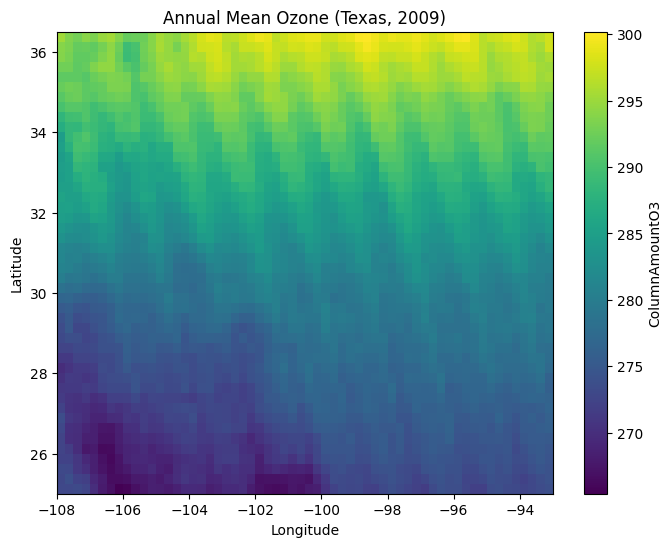

In [96]:
# Directory containing daily Texas subset NetCDF files
input_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2009'

# Open all daily files as a single xarray dataset
ds = xr.open_mfdataset(
    os.path.join(input_dir, '*.nc'),
    combine='by_coords'
)

# Compute annual mean
annual_mean_2009 = ds['ColumnAmountO3'].mean(dim='time', skipna=True)

print("✅ Annual mean calculated for Texas (2009)")
print(annual_mean_2009)

# Save to NetCDF
output_file = '/Users/nawarajadhikari/Capstone_project/OMI_O3_Texas_Annual_Mean/OMI_O3_AnnualMean_Texas_2009.nc'
annual_mean_2009.to_netcdf(output_file)
print(f"✅ Saved annual mean to {output_file}")

#plot
plt.figure(figsize=(8, 6))
annual_mean_2009.plot(cmap='viridis')
plt.title('Annual Mean Ozone (Texas, 2009)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Reading .he5 files for the year 2010

In [13]:
data_dir = '/Users/nawarajadhikari/OMI_O3_Data/2010'

# Path for ozone field
data_path = '/HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ColumnAmountO3'

# Initialize lists
dates = []
ozone_data = []

# Loop through files
for filename in sorted(os.listdir(data_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(data_dir, filename)
        
        # Extract date from filename (omi_O3_YYYYMMDD.he5)
        match = re.search(r'(\d{8})', filename)
        if match:
            date = match.group(1)
        else:
            date = 'unknown'
        
        with h5py.File(file_path, 'r') as f:
            if data_path in f:
                data = f[data_path][()]
                data = np.where(data < 0, np.nan, data)  # Filter invalid values
                
                dates.append(date)
                ozone_data.append(data)
                print(f"✅ Loaded {filename} with shape {data.shape}")
            else:
                print(f"❌ {filename} missing {data_path}")

print(f"\nTotal files read: {len(ozone_data)}")

# Print first file shape
if ozone_data:
    print(f"First file shape: {ozone_data[0].shape}")


✅ Loaded omi_O3_20100101.he5 with shape (720, 1440)
✅ Loaded omi_O3_20100102.he5 with shape (720, 1440)
✅ Loaded omi_O3_20100103.he5 with shape (720, 1440)
✅ Loaded omi_O3_20100104.he5 with shape (720, 1440)
✅ Loaded omi_O3_20100105.he5 with shape (720, 1440)
✅ Loaded omi_O3_20100106.he5 with shape (720, 1440)
✅ Loaded omi_O3_20100107.he5 with shape (720, 1440)
✅ Loaded omi_O3_20100108.he5 with shape (720, 1440)
✅ Loaded omi_O3_20100109.he5 with shape (720, 1440)
✅ Loaded omi_O3_20100110.he5 with shape (720, 1440)
✅ Loaded omi_O3_20100111.he5 with shape (720, 1440)
✅ Loaded omi_O3_20100112.he5 with shape (720, 1440)
✅ Loaded omi_O3_20100113.he5 with shape (720, 1440)
✅ Loaded omi_O3_20100114.he5 with shape (720, 1440)
✅ Loaded omi_O3_20100115.he5 with shape (720, 1440)
✅ Loaded omi_O3_20100116.he5 with shape (720, 1440)
✅ Loaded omi_O3_20100117.he5 with shape (720, 1440)
✅ Loaded omi_O3_20100118.he5 with shape (720, 1440)
✅ Loaded omi_O3_20100119.he5 with shape (720, 1440)
✅ Loaded omi

# Converting .he5 files into .nc files for the year 2010

In [14]:
 # Converting .he5 files into .nc files for 2010

# Input and output directories
input_dir = '/Users/nawarajadhikari/OMI_O3_Data/2010'
output_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2010'
os.makedirs(output_dir, exist_ok=True)

# Data path inside HE5 file
data_path = '/HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ColumnAmountO3'

# Generate latitude and longitude arrays (for 0.25° global grid)
lat = np.arange(-89.875, 90, 0.25)
lon = np.arange(-179.875, 180, 0.25)

# Loop through each HE5 file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.he5'):
        match = re.search(r'(\d{8})', filename)
        if not match:
            print(f"Skipping {filename} (no date found)")
            continue

        date_str = match.group(1)
        date = datetime.strptime(date_str, "%Y%m%d")

        file_path = os.path.join(input_dir, filename)

        # Read data
        with h5py.File(file_path, 'r') as f:
            if data_path not in f:
                print(f"Data field missing in {filename}")
                continue

            data = f[data_path][()]
            data = np.where(data < 0, np.nan, data)  # Filter invalid values

        # Create xarray Dataset
        ds = xr.Dataset(
            {
                "ColumnAmountO3": (("lat", "lon"), data)
            },
            coords={
                "lat": lat,
                "lon": lon,
                "time": np.array([date])
            },
            attrs={
                "title": "OMI Total Column Ozone",
                "source": "OMDOAO3e.003",
                "date": date_str,
                "units": "Dobson Units"
            }
        )

        # Save as NetCDF
        output_file = os.path.join(output_dir, f"omi_O3_{date_str}.nc")
        ds.to_netcdf(output_file)
        print(f"✅ Saved {output_file}")


✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2010/omi_O3_20100101.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2010/omi_O3_20100102.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2010/omi_O3_20100103.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2010/omi_O3_20100104.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2010/omi_O3_20100105.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2010/omi_O3_20100106.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2010/omi_O3_20100107.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2010/omi_O3_20100108.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2010/omi_O3_20100109.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2010/omi_O3_20100110.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2010/omi_O3_20100111.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3

# Extracting the files for the Texas region for 2010

In [15]:
# Input and output directories
input_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2010'
#/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF
output_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2010'
os.makedirs(output_dir, exist_ok=True)

# Texas bounding box
lat_min, lat_max = 25, 36.5
lon_min, lon_max = -108, -93

for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.nc'):
        input_file = os.path.join(input_dir, filename)

        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        date_str = match.group(1) if match else "unknown"

        # Open NetCDF
        ds = xr.open_dataset(input_file)

        # Subset Texas region
        ds_texas = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

        # Save Texas subset as NetCDF
        output_file = os.path.join(output_dir, f"omi_O3_Texas_{date_str}.nc")
        ds_texas.to_netcdf(output_file)

        print(f"✅ Saved Texas subset: {output_file}")


✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2010/omi_O3_Texas_20100101.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2010/omi_O3_Texas_20100102.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2010/omi_O3_Texas_20100103.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2010/omi_O3_Texas_20100104.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2010/omi_O3_Texas_20100105.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2010/omi_O3_Texas_20100106.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2010/omi_O3_Texas_20100107.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2010/omi_O3_Texas_20100108.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2010/omi_O3_Texas_20100109.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_P

# Computation of Annual Mean for 2010

✅ Annual mean calculated for Texas (2010)
<xarray.DataArray 'ColumnAmountO3' (lat: 46, lon: 60)> Size: 11kB
dask.array<mean_agg-aggregate, shape=(46, 60), dtype=float32, chunksize=(46, 60), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 368B 25.12 25.38 25.62 25.88 ... 35.88 36.12 36.38
  * lon      (lon) float64 480B -107.9 -107.6 -107.4 ... -93.62 -93.38 -93.12
✅ Saved annual mean to /Users/nawarajadhikari/Capstone_project/OMI_O3_Texas_Annual_Mean/OMI_O3_AnnualMean_Texas_2010.nc


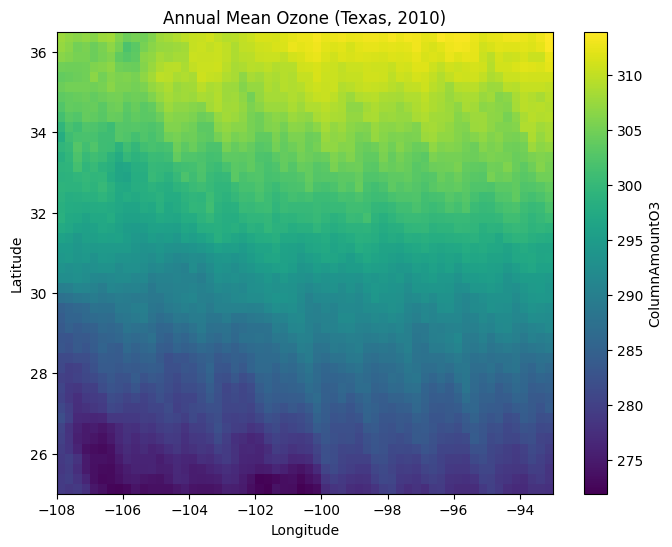

In [97]:
# Directory containing daily Texas subset NetCDF files
input_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2010'

# Open all daily files as a single xarray dataset
ds = xr.open_mfdataset(
    os.path.join(input_dir, '*.nc'),
    combine='by_coords'
)

# Compute annual mean
annual_mean_2010 = ds['ColumnAmountO3'].mean(dim='time', skipna=True)

print("✅ Annual mean calculated for Texas (2010)")
print(annual_mean_2010)

# Save to NetCDF
output_file = '/Users/nawarajadhikari/Capstone_project/OMI_O3_Texas_Annual_Mean/OMI_O3_AnnualMean_Texas_2010.nc'
annual_mean_2010.to_netcdf(output_file)
print(f"✅ Saved annual mean to {output_file}")

#plot
plt.figure(figsize=(8, 6))
annual_mean_2010.plot(cmap='viridis')
plt.title('Annual Mean Ozone (Texas, 2010)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Reading .he5 files for 2011

In [16]:
data_dir = '/Users/nawarajadhikari/OMI_O3_Data/2011'

# Path for ozone field
data_path = '/HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ColumnAmountO3'

# Initialize lists
dates = []
ozone_data = []

# Loop through files
for filename in sorted(os.listdir(data_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(data_dir, filename)
        
        # Extract date from filename (omi_O3_YYYYMMDD.he5)
        match = re.search(r'(\d{8})', filename)
        if match:
            date = match.group(1)
        else:
            date = 'unknown'
        
        with h5py.File(file_path, 'r') as f:
            if data_path in f:
                data = f[data_path][()]
                data = np.where(data < 0, np.nan, data)  # Filter invalid values
                
                dates.append(date)
                ozone_data.append(data)
                print(f"✅ Loaded {filename} with shape {data.shape}")
            else:
                print(f"❌ {filename} missing {data_path}")

print(f"\nTotal files read: {len(ozone_data)}")

# Print first file shape
if ozone_data:
    print(f"First file shape: {ozone_data[0].shape}")


✅ Loaded omi_O3_20110101.he5 with shape (720, 1440)
✅ Loaded omi_O3_20110102.he5 with shape (720, 1440)
✅ Loaded omi_O3_20110103.he5 with shape (720, 1440)
✅ Loaded omi_O3_20110104.he5 with shape (720, 1440)
✅ Loaded omi_O3_20110105.he5 with shape (720, 1440)
✅ Loaded omi_O3_20110106.he5 with shape (720, 1440)
✅ Loaded omi_O3_20110107.he5 with shape (720, 1440)
✅ Loaded omi_O3_20110108.he5 with shape (720, 1440)
✅ Loaded omi_O3_20110109.he5 with shape (720, 1440)
✅ Loaded omi_O3_20110110.he5 with shape (720, 1440)
✅ Loaded omi_O3_20110111.he5 with shape (720, 1440)
✅ Loaded omi_O3_20110112.he5 with shape (720, 1440)
✅ Loaded omi_O3_20110113.he5 with shape (720, 1440)
✅ Loaded omi_O3_20110114.he5 with shape (720, 1440)
✅ Loaded omi_O3_20110115.he5 with shape (720, 1440)
✅ Loaded omi_O3_20110116.he5 with shape (720, 1440)
✅ Loaded omi_O3_20110117.he5 with shape (720, 1440)
✅ Loaded omi_O3_20110118.he5 with shape (720, 1440)
✅ Loaded omi_O3_20110119.he5 with shape (720, 1440)
✅ Loaded omi

# Converting  .he5 files into .nc for 2011

In [17]:
# Converting .he5 files into .nc files for 2011

# Input and output directories
input_dir = '/Users/nawarajadhikari/OMI_O3_Data/2011'
output_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2011'
os.makedirs(output_dir, exist_ok=True)

# Data path inside HE5 file
data_path = '/HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ColumnAmountO3'

# Generate latitude and longitude arrays (for 0.25° global grid)
lat = np.arange(-89.875, 90, 0.25)
lon = np.arange(-179.875, 180, 0.25)

# Loop through each HE5 file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.he5'):
        match = re.search(r'(\d{8})', filename)
        if not match:
            print(f"Skipping {filename} (no date found)")
            continue

        date_str = match.group(1)
        date = datetime.strptime(date_str, "%Y%m%d")

        file_path = os.path.join(input_dir, filename)

        # Read data
        with h5py.File(file_path, 'r') as f:
            if data_path not in f:
                print(f"Data field missing in {filename}")
                continue

            data = f[data_path][()]
            data = np.where(data < 0, np.nan, data)  # Filter invalid values

        # Create xarray Dataset
        ds = xr.Dataset(
            {
                "ColumnAmountO3": (("lat", "lon"), data)
            },
            coords={
                "lat": lat,
                "lon": lon,
                "time": np.array([date])
            },
            attrs={
                "title": "OMI Total Column Ozone",
                "source": "OMDOAO3e.003",
                "date": date_str,
                "units": "Dobson Units"
            }
        )

        # Save as NetCDF
        output_file = os.path.join(output_dir, f"omi_O3_{date_str}.nc")
        ds.to_netcdf(output_file)
        print(f"✅ Saved {output_file}")


✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2011/omi_O3_20110101.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2011/omi_O3_20110102.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2011/omi_O3_20110103.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2011/omi_O3_20110104.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2011/omi_O3_20110105.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2011/omi_O3_20110106.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2011/omi_O3_20110107.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2011/omi_O3_20110108.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2011/omi_O3_20110109.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2011/omi_O3_20110110.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2011/omi_O3_20110111.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3

# Extracting files for the Texas region for 2011

In [18]:
# Input and output directories
input_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2011'
#/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF
output_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2011'
os.makedirs(output_dir, exist_ok=True)

# Texas bounding box
lat_min, lat_max = 25, 36.5
lon_min, lon_max = -108, -93

for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.nc'):
        input_file = os.path.join(input_dir, filename)

        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        date_str = match.group(1) if match else "unknown"

        # Open NetCDF
        ds = xr.open_dataset(input_file)

        # Subset Texas region
        ds_texas = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

        # Save Texas subset as NetCDF
        output_file = os.path.join(output_dir, f"omi_O3_Texas_{date_str}.nc")
        ds_texas.to_netcdf(output_file)

        print(f"✅ Saved Texas subset: {output_file}")


✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2011/omi_O3_Texas_20110101.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2011/omi_O3_Texas_20110102.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2011/omi_O3_Texas_20110103.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2011/omi_O3_Texas_20110104.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2011/omi_O3_Texas_20110105.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2011/omi_O3_Texas_20110106.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2011/omi_O3_Texas_20110107.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2011/omi_O3_Texas_20110108.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2011/omi_O3_Texas_20110109.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_P

# Computation of Annual Mean for the year 2011

✅ Annual mean calculated for Texas (2011)
<xarray.DataArray 'ColumnAmountO3' (lat: 46, lon: 60)> Size: 11kB
dask.array<mean_agg-aggregate, shape=(46, 60), dtype=float32, chunksize=(46, 60), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 368B 25.12 25.38 25.62 25.88 ... 35.88 36.12 36.38
  * lon      (lon) float64 480B -107.9 -107.6 -107.4 ... -93.62 -93.38 -93.12
✅ Saved annual mean to /Users/nawarajadhikari/Capstone_project/OMI_O3_Texas_Annual_Mean/OMI_O3_AnnualMean_Texas_2011.nc


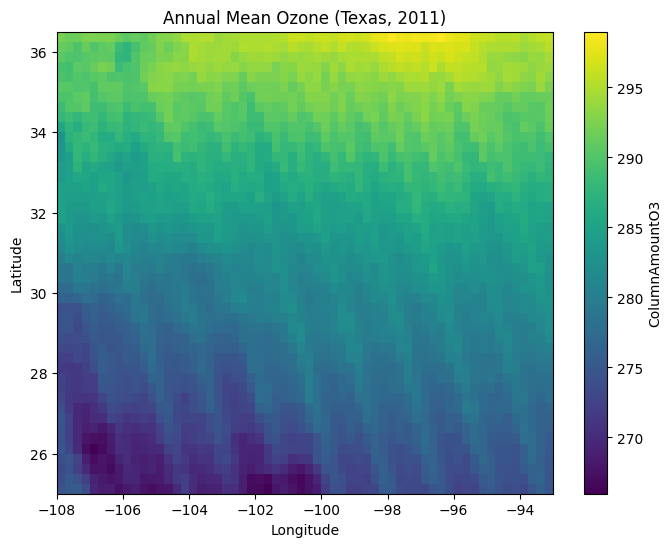

In [102]:
# Directory containing daily Texas subset NetCDF files
input_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2011'

# Open all daily files as a single xarray dataset
ds = xr.open_mfdataset(
    os.path.join(input_dir, '*.nc'),
    combine='by_coords'
)

# Compute annual mean
annual_mean_2011 = ds['ColumnAmountO3'].mean(dim='time', skipna=True)

print("✅ Annual mean calculated for Texas (2011)")
print(annual_mean_2011)

# Save to NetCDF
output_file = '/Users/nawarajadhikari/Capstone_project/OMI_O3_Texas_Annual_Mean/OMI_O3_AnnualMean_Texas_2011.nc'
annual_mean_2011.to_netcdf(output_file)
print(f"✅ Saved annual mean to {output_file}")

#plot
plt.figure(figsize=(8, 6))
annual_mean_2011.plot(cmap='viridis')
plt.title('Annual Mean Ozone (Texas, 2011)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Reading .he5 files for the year 2012

In [19]:
data_dir = '/Users/nawarajadhikari/OMI_O3_Data/2012'

# Path for ozone field
data_path = '/HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ColumnAmountO3'

# Initialize lists
dates = []
ozone_data = []

# Loop through files
for filename in sorted(os.listdir(data_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(data_dir, filename)
        
        # Extract date from filename (omi_O3_YYYYMMDD.he5)
        match = re.search(r'(\d{8})', filename)
        if match:
            date = match.group(1)
        else:
            date = 'unknown'
        
        with h5py.File(file_path, 'r') as f:
            if data_path in f:
                data = f[data_path][()]
                data = np.where(data < 0, np.nan, data)  # Filter invalid values
                
                dates.append(date)
                ozone_data.append(data)
                print(f"✅ Loaded {filename} with shape {data.shape}")
            else:
                print(f"❌ {filename} missing {data_path}")

print(f"\nTotal files read: {len(ozone_data)}")

# Print first file shape
if ozone_data:
    print(f"First file shape: {ozone_data[0].shape}")


✅ Loaded omi_O3_20120101.he5 with shape (720, 1440)
✅ Loaded omi_O3_20120102.he5 with shape (720, 1440)
✅ Loaded omi_O3_20120103.he5 with shape (720, 1440)
✅ Loaded omi_O3_20120104.he5 with shape (720, 1440)
✅ Loaded omi_O3_20120105.he5 with shape (720, 1440)
✅ Loaded omi_O3_20120106.he5 with shape (720, 1440)
✅ Loaded omi_O3_20120107.he5 with shape (720, 1440)
✅ Loaded omi_O3_20120108.he5 with shape (720, 1440)
✅ Loaded omi_O3_20120109.he5 with shape (720, 1440)
✅ Loaded omi_O3_20120110.he5 with shape (720, 1440)
✅ Loaded omi_O3_20120111.he5 with shape (720, 1440)
✅ Loaded omi_O3_20120112.he5 with shape (720, 1440)
✅ Loaded omi_O3_20120113.he5 with shape (720, 1440)
✅ Loaded omi_O3_20120114.he5 with shape (720, 1440)
✅ Loaded omi_O3_20120115.he5 with shape (720, 1440)
✅ Loaded omi_O3_20120116.he5 with shape (720, 1440)
✅ Loaded omi_O3_20120117.he5 with shape (720, 1440)
✅ Loaded omi_O3_20120118.he5 with shape (720, 1440)
✅ Loaded omi_O3_20120119.he5 with shape (720, 1440)
✅ Loaded omi

# Converting .he5 files into .nc for the year 2012

In [20]:
# Converting .he5 files into .nc files for 2012

# Input and output directories
input_dir = '/Users/nawarajadhikari/OMI_O3_Data/2012'
output_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2012'
os.makedirs(output_dir, exist_ok=True)

# Data path inside HE5 file
data_path = '/HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ColumnAmountO3'

# Generate latitude and longitude arrays (for 0.25° global grid)
lat = np.arange(-89.875, 90, 0.25)
lon = np.arange(-179.875, 180, 0.25)

# Loop through each HE5 file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.he5'):
        match = re.search(r'(\d{8})', filename)
        if not match:
            print(f"Skipping {filename} (no date found)")
            continue

        date_str = match.group(1)
        date = datetime.strptime(date_str, "%Y%m%d")

        file_path = os.path.join(input_dir, filename)

        # Read data
        with h5py.File(file_path, 'r') as f:
            if data_path not in f:
                print(f"Data field missing in {filename}")
                continue

            data = f[data_path][()]
            data = np.where(data < 0, np.nan, data)  # Filter invalid values

        # Create xarray Dataset
        ds = xr.Dataset(
            {
                "ColumnAmountO3": (("lat", "lon"), data)
            },
            coords={
                "lat": lat,
                "lon": lon,
                "time": np.array([date])
            },
            attrs={
                "title": "OMI Total Column Ozone",
                "source": "OMDOAO3e.003",
                "date": date_str,
                "units": "Dobson Units"
            }
        )

        # Save as NetCDF
        output_file = os.path.join(output_dir, f"omi_O3_{date_str}.nc")
        ds.to_netcdf(output_file)
        print(f"✅ Saved {output_file}")


✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2012/omi_O3_20120101.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2012/omi_O3_20120102.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2012/omi_O3_20120103.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2012/omi_O3_20120104.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2012/omi_O3_20120105.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2012/omi_O3_20120106.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2012/omi_O3_20120107.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2012/omi_O3_20120108.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2012/omi_O3_20120109.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2012/omi_O3_20120110.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2012/omi_O3_20120111.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3

# Extracting the files for the Texas region for 2012

In [24]:
 # Input and output directories
input_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2012'
#/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF
output_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2012'
os.makedirs(output_dir, exist_ok=True)

# Texas bounding box
lat_min, lat_max = 25, 36.5
lon_min, lon_max = -108, -93

for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.nc'):
        input_file = os.path.join(input_dir, filename)

        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        date_str = match.group(1) if match else "unknown"

        # Open NetCDF
        ds = xr.open_dataset(input_file)

        # Subset Texas region
        ds_texas = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

        # Save Texas subset as NetCDF
        output_file = os.path.join(output_dir, f"omi_O3_Texas_{date_str}.nc")
        ds_texas.to_netcdf(output_file)

        print(f"✅ Saved Texas subset: {output_file}")


✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2012/omi_O3_Texas_20120101.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2012/omi_O3_Texas_20120102.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2012/omi_O3_Texas_20120103.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2012/omi_O3_Texas_20120104.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2012/omi_O3_Texas_20120105.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2012/omi_O3_Texas_20120106.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2012/omi_O3_Texas_20120107.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2012/omi_O3_Texas_20120108.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2012/omi_O3_Texas_20120109.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_P

# Computation of Annual mean for the year 2012

✅ Annual mean calculated for Texas (2012)
<xarray.DataArray 'ColumnAmountO3' (lat: 46, lon: 60)> Size: 11kB
dask.array<mean_agg-aggregate, shape=(46, 60), dtype=float32, chunksize=(46, 60), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 368B 25.12 25.38 25.62 25.88 ... 35.88 36.12 36.38
  * lon      (lon) float64 480B -107.9 -107.6 -107.4 ... -93.62 -93.38 -93.12
✅ Saved annual mean to /Users/nawarajadhikari/Capstone_project/OMI_O3_Texas_Annual_Mean/OMI_O3_AnnualMean_Texas_2012.nc


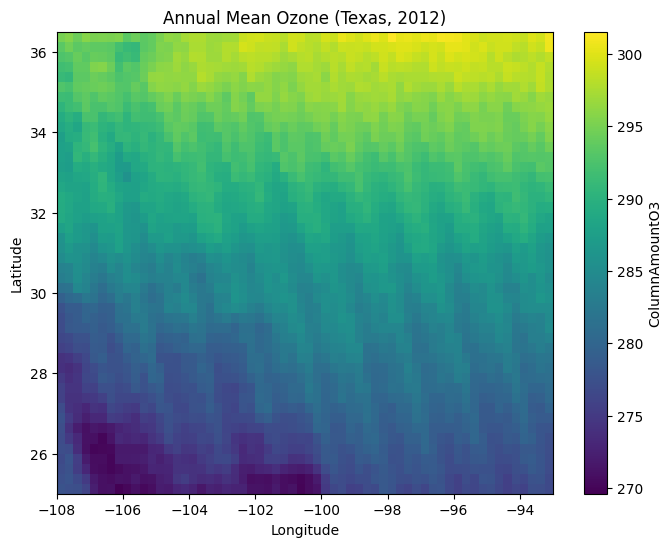

In [103]:
# Directory containing daily Texas subset NetCDF files
input_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2012'

# Open all daily files as a single xarray dataset
ds = xr.open_mfdataset(
    os.path.join(input_dir, '*.nc'),
    combine='by_coords'
)

# Compute annual mean
annual_mean_2012 = ds['ColumnAmountO3'].mean(dim='time', skipna=True)

print("✅ Annual mean calculated for Texas (2012)")
print(annual_mean_2012)

# Save to NetCDF
output_file = '/Users/nawarajadhikari/Capstone_project/OMI_O3_Texas_Annual_Mean/OMI_O3_AnnualMean_Texas_2012.nc'
annual_mean_2012.to_netcdf(output_file)
print(f"✅ Saved annual mean to {output_file}")

#plot
plt.figure(figsize=(8, 6))
annual_mean_2012.plot(cmap='viridis')
plt.title('Annual Mean Ozone (Texas, 2012)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Reading .he5 files for the year 2013

In [25]:
data_dir = '/Users/nawarajadhikari/OMI_O3_Data/2013'

# Path for ozone field
data_path = '/HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ColumnAmountO3'

# Initialize lists
dates = []
ozone_data = []

# Loop through files
for filename in sorted(os.listdir(data_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(data_dir, filename)
        
        # Extract date from filename (omi_O3_YYYYMMDD.he5)
        match = re.search(r'(\d{8})', filename)
        if match:
            date = match.group(1)
        else:
            date = 'unknown'
        
        with h5py.File(file_path, 'r') as f:
            if data_path in f:
                data = f[data_path][()]
                data = np.where(data < 0, np.nan, data)  # Filter invalid values
                
                dates.append(date)
                ozone_data.append(data)
                print(f"✅ Loaded {filename} with shape {data.shape}")
            else:
                print(f"❌ {filename} missing {data_path}")

print(f"\nTotal files read: {len(ozone_data)}")

# Print first file shape
if ozone_data:
    print(f"First file shape: {ozone_data[0].shape}")


✅ Loaded omi_O3_20130101.he5 with shape (720, 1440)
✅ Loaded omi_O3_20130102.he5 with shape (720, 1440)
✅ Loaded omi_O3_20130103.he5 with shape (720, 1440)
✅ Loaded omi_O3_20130104.he5 with shape (720, 1440)
✅ Loaded omi_O3_20130105.he5 with shape (720, 1440)
✅ Loaded omi_O3_20130106.he5 with shape (720, 1440)
✅ Loaded omi_O3_20130107.he5 with shape (720, 1440)
✅ Loaded omi_O3_20130108.he5 with shape (720, 1440)
✅ Loaded omi_O3_20130109.he5 with shape (720, 1440)
✅ Loaded omi_O3_20130110.he5 with shape (720, 1440)
✅ Loaded omi_O3_20130111.he5 with shape (720, 1440)
✅ Loaded omi_O3_20130112.he5 with shape (720, 1440)
✅ Loaded omi_O3_20130113.he5 with shape (720, 1440)
✅ Loaded omi_O3_20130114.he5 with shape (720, 1440)
✅ Loaded omi_O3_20130115.he5 with shape (720, 1440)
✅ Loaded omi_O3_20130116.he5 with shape (720, 1440)
✅ Loaded omi_O3_20130117.he5 with shape (720, 1440)
✅ Loaded omi_O3_20130118.he5 with shape (720, 1440)
✅ Loaded omi_O3_20130119.he5 with shape (720, 1440)
✅ Loaded omi

# Converting .he5 files into .nc for 2013

In [26]:
# Converting .he5 files into .nc files for 2013

# Input and output directories
input_dir = '/Users/nawarajadhikari/OMI_O3_Data/2013'
output_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2013'
os.makedirs(output_dir, exist_ok=True)

# Data path inside HE5 file
data_path = '/HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ColumnAmountO3'

# Generate latitude and longitude arrays (for 0.25° global grid)
lat = np.arange(-89.875, 90, 0.25)
lon = np.arange(-179.875, 180, 0.25)

# Loop through each HE5 file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.he5'):
        match = re.search(r'(\d{8})', filename)
        if not match:
            print(f"Skipping {filename} (no date found)")
            continue

        date_str = match.group(1)
        date = datetime.strptime(date_str, "%Y%m%d")

        file_path = os.path.join(input_dir, filename)

        # Read data
        with h5py.File(file_path, 'r') as f:
            if data_path not in f:
                print(f"Data field missing in {filename}")
                continue

            data = f[data_path][()]
            data = np.where(data < 0, np.nan, data)  # Filter invalid values

        # Create xarray Dataset
        ds = xr.Dataset(
            {
                "ColumnAmountO3": (("lat", "lon"), data)
            },
            coords={
                "lat": lat,
                "lon": lon,
                "time": np.array([date])
            },
            attrs={
                "title": "OMI Total Column Ozone",
                "source": "OMDOAO3e.003",
                "date": date_str,
                "units": "Dobson Units"
            }
        )

        # Save as NetCDF
        output_file = os.path.join(output_dir, f"omi_O3_{date_str}.nc")
        ds.to_netcdf(output_file)
        print(f"✅ Saved {output_file}")


✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2013/omi_O3_20130101.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2013/omi_O3_20130102.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2013/omi_O3_20130103.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2013/omi_O3_20130104.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2013/omi_O3_20130105.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2013/omi_O3_20130106.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2013/omi_O3_20130107.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2013/omi_O3_20130108.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2013/omi_O3_20130109.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2013/omi_O3_20130110.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2013/omi_O3_20130111.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3

# Extracting files for the Texas region for 2013

In [27]:
 # Input and output directories
input_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2013'
#/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF
output_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2013'
os.makedirs(output_dir, exist_ok=True)

# Texas bounding box
lat_min, lat_max = 25, 36.5
lon_min, lon_max = -108, -93

for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.nc'):
        input_file = os.path.join(input_dir, filename)

        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        date_str = match.group(1) if match else "unknown"

        # Open NetCDF
        ds = xr.open_dataset(input_file)

        # Subset Texas region
        ds_texas = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

        # Save Texas subset as NetCDF
        output_file = os.path.join(output_dir, f"omi_O3_Texas_{date_str}.nc")
        ds_texas.to_netcdf(output_file)

        print(f"✅ Saved Texas subset: {output_file}")


✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2013/omi_O3_Texas_20130101.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2013/omi_O3_Texas_20130102.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2013/omi_O3_Texas_20130103.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2013/omi_O3_Texas_20130104.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2013/omi_O3_Texas_20130105.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2013/omi_O3_Texas_20130106.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2013/omi_O3_Texas_20130107.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2013/omi_O3_Texas_20130108.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2013/omi_O3_Texas_20130109.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_P

# Computation of Annual Mean for the year 2013

✅ Annual mean calculated for Texas (2013)
<xarray.DataArray 'ColumnAmountO3' (lat: 46, lon: 60)> Size: 11kB
dask.array<mean_agg-aggregate, shape=(46, 60), dtype=float32, chunksize=(46, 60), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 368B 25.12 25.38 25.62 25.88 ... 35.88 36.12 36.38
  * lon      (lon) float64 480B -107.9 -107.6 -107.4 ... -93.62 -93.38 -93.12
✅ Saved annual mean to /Users/nawarajadhikari/Capstone_project/OMI_O3_Texas_Annual_Mean/OMI_O3_AnnualMean_Texas_2013.nc


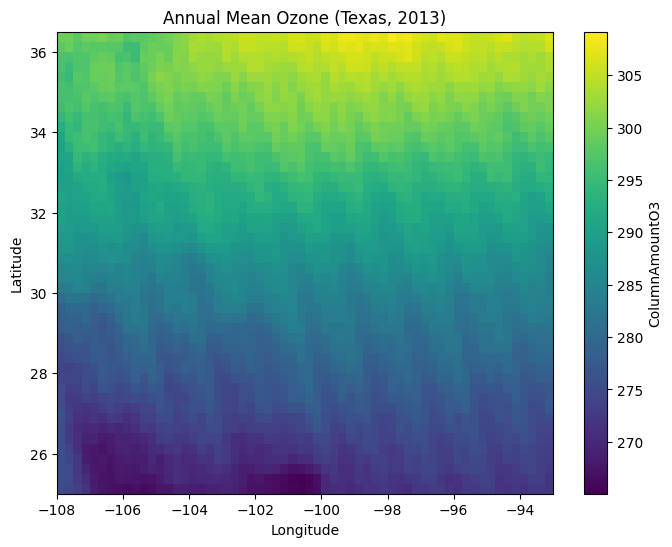

In [104]:
# Directory containing daily Texas subset NetCDF files
input_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2013'

# Open all daily files as a single xarray dataset
ds = xr.open_mfdataset(
    os.path.join(input_dir, '*.nc'),
    combine='by_coords'
)

# Compute annual mean
annual_mean_2013 = ds['ColumnAmountO3'].mean(dim='time', skipna=True)

print("✅ Annual mean calculated for Texas (2013)")
print(annual_mean_2013)

# Save to NetCDF
output_file = '/Users/nawarajadhikari/Capstone_project/OMI_O3_Texas_Annual_Mean/OMI_O3_AnnualMean_Texas_2013.nc'
annual_mean_2013.to_netcdf(output_file)
print(f"✅ Saved annual mean to {output_file}")

#plot
plt.figure(figsize=(8, 6))
annual_mean_2013.plot(cmap='viridis')
plt.title('Annual Mean Ozone (Texas, 2013)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Reading .he5 files for the year 2014

In [28]:
data_dir = '/Users/nawarajadhikari/OMI_O3_Data/2014'

# Path for ozone field
data_path = '/HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ColumnAmountO3'

# Initialize lists
dates = []
ozone_data = []

# Loop through files
for filename in sorted(os.listdir(data_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(data_dir, filename)
        
        # Extract date from filename (omi_O3_YYYYMMDD.he5)
        match = re.search(r'(\d{8})', filename)
        if match:
            date = match.group(1)
        else:
            date = 'unknown'
        
        with h5py.File(file_path, 'r') as f:
            if data_path in f:
                data = f[data_path][()]
                data = np.where(data < 0, np.nan, data)  # Filter invalid values
                
                dates.append(date)
                ozone_data.append(data)
                print(f"✅ Loaded {filename} with shape {data.shape}")
            else:
                print(f"❌ {filename} missing {data_path}")

print(f"\nTotal files read: {len(ozone_data)}")

# Print first file shape
if ozone_data:
    print(f"First file shape: {ozone_data[0].shape}")


✅ Loaded omi_O3_20140101.he5 with shape (720, 1440)
✅ Loaded omi_O3_20140102.he5 with shape (720, 1440)
✅ Loaded omi_O3_20140103.he5 with shape (720, 1440)
✅ Loaded omi_O3_20140104.he5 with shape (720, 1440)
✅ Loaded omi_O3_20140105.he5 with shape (720, 1440)
✅ Loaded omi_O3_20140106.he5 with shape (720, 1440)
✅ Loaded omi_O3_20140107.he5 with shape (720, 1440)
✅ Loaded omi_O3_20140108.he5 with shape (720, 1440)
✅ Loaded omi_O3_20140109.he5 with shape (720, 1440)
✅ Loaded omi_O3_20140110.he5 with shape (720, 1440)
✅ Loaded omi_O3_20140111.he5 with shape (720, 1440)
✅ Loaded omi_O3_20140112.he5 with shape (720, 1440)
✅ Loaded omi_O3_20140113.he5 with shape (720, 1440)
✅ Loaded omi_O3_20140114.he5 with shape (720, 1440)
✅ Loaded omi_O3_20140115.he5 with shape (720, 1440)
✅ Loaded omi_O3_20140116.he5 with shape (720, 1440)
✅ Loaded omi_O3_20140117.he5 with shape (720, 1440)
✅ Loaded omi_O3_20140118.he5 with shape (720, 1440)
✅ Loaded omi_O3_20140119.he5 with shape (720, 1440)
✅ Loaded omi

# Converting  .he5 files into .nc for the year 2014

In [29]:
# Converting .he5 files into .nc files for 2014

# Input and output directories
input_dir = '/Users/nawarajadhikari/OMI_O3_Data/2014'
output_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2014'
os.makedirs(output_dir, exist_ok=True)

# Data path inside HE5 file
data_path = '/HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ColumnAmountO3'

# Generate latitude and longitude arrays (for 0.25° global grid)
lat = np.arange(-89.875, 90, 0.25)
lon = np.arange(-179.875, 180, 0.25)

# Loop through each HE5 file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.he5'):
        match = re.search(r'(\d{8})', filename)
        if not match:
            print(f"Skipping {filename} (no date found)")
            continue

        date_str = match.group(1)
        date = datetime.strptime(date_str, "%Y%m%d")

        file_path = os.path.join(input_dir, filename)

        # Read data
        with h5py.File(file_path, 'r') as f:
            if data_path not in f:
                print(f"Data field missing in {filename}")
                continue

            data = f[data_path][()]
            data = np.where(data < 0, np.nan, data)  # Filter invalid values

        # Create xarray Dataset
        ds = xr.Dataset(
            {
                "ColumnAmountO3": (("lat", "lon"), data)
            },
            coords={
                "lat": lat,
                "lon": lon,
                "time": np.array([date])
            },
            attrs={
                "title": "OMI Total Column Ozone",
                "source": "OMDOAO3e.003",
                "date": date_str,
                "units": "Dobson Units"
            }
        )

        # Save as NetCDF
        output_file = os.path.join(output_dir, f"omi_O3_{date_str}.nc")
        ds.to_netcdf(output_file)
        print(f"✅ Saved {output_file}")


✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2014/omi_O3_20140101.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2014/omi_O3_20140102.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2014/omi_O3_20140103.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2014/omi_O3_20140104.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2014/omi_O3_20140105.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2014/omi_O3_20140106.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2014/omi_O3_20140107.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2014/omi_O3_20140108.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2014/omi_O3_20140109.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2014/omi_O3_20140110.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2014/omi_O3_20140111.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3

# Extracting the files for the Texas region for 2014

In [30]:
 # Input and output directories
input_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2014'
#/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF
output_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2014'
os.makedirs(output_dir, exist_ok=True)

# Texas bounding box
lat_min, lat_max = 25, 36.5
lon_min, lon_max = -108, -93

for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.nc'):
        input_file = os.path.join(input_dir, filename)

        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        date_str = match.group(1) if match else "unknown"

        # Open NetCDF
        ds = xr.open_dataset(input_file)

        # Subset Texas region
        ds_texas = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

        # Save Texas subset as NetCDF
        output_file = os.path.join(output_dir, f"omi_O3_Texas_{date_str}.nc")
        ds_texas.to_netcdf(output_file)

        print(f"✅ Saved Texas subset: {output_file}")


✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2014/omi_O3_Texas_20140101.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2014/omi_O3_Texas_20140102.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2014/omi_O3_Texas_20140103.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2014/omi_O3_Texas_20140104.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2014/omi_O3_Texas_20140105.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2014/omi_O3_Texas_20140106.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2014/omi_O3_Texas_20140107.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2014/omi_O3_Texas_20140108.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2014/omi_O3_Texas_20140109.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_P

# Computation of Annual Mean for the year 2014

✅ Annual mean calculated for Texas (2014)
<xarray.DataArray 'ColumnAmountO3' (lat: 46, lon: 60)> Size: 11kB
dask.array<mean_agg-aggregate, shape=(46, 60), dtype=float32, chunksize=(46, 60), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 368B 25.12 25.38 25.62 25.88 ... 35.88 36.12 36.38
  * lon      (lon) float64 480B -107.9 -107.6 -107.4 ... -93.62 -93.38 -93.12
✅ Saved annual mean to /Users/nawarajadhikari/Capstone_project/OMI_O3_Texas_Annual_Mean/OMI_O3_AnnualMean_Texas_2014.nc


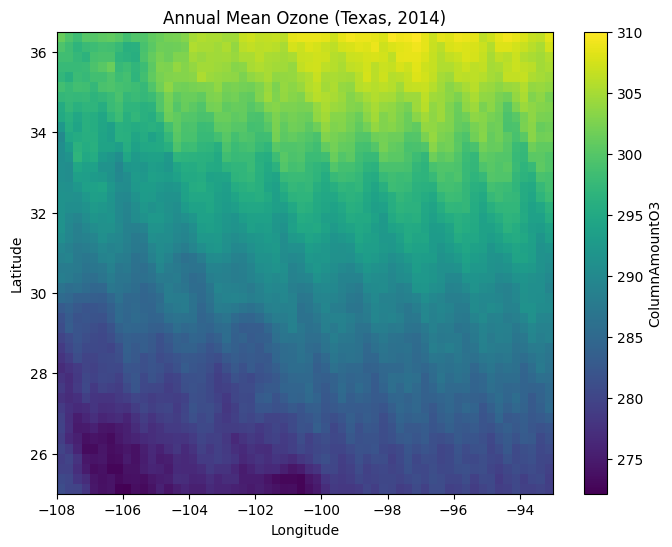

In [105]:
# Directory containing daily Texas subset NetCDF files
input_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2014'

# Open all daily files as a single xarray dataset
ds = xr.open_mfdataset(
    os.path.join(input_dir, '*.nc'),
    combine='by_coords'
)

# Compute annual mean
annual_mean_2014 = ds['ColumnAmountO3'].mean(dim='time', skipna=True)

print("✅ Annual mean calculated for Texas (2014)")
print(annual_mean_2014)

# Save to NetCDF
output_file = '/Users/nawarajadhikari/Capstone_project/OMI_O3_Texas_Annual_Mean/OMI_O3_AnnualMean_Texas_2014.nc'
annual_mean_2014.to_netcdf(output_file)
print(f"✅ Saved annual mean to {output_file}")

#plot
plt.figure(figsize=(8, 6))
annual_mean_2014.plot(cmap='viridis')
plt.title('Annual Mean Ozone (Texas, 2014)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Reading .he5 files for the year 2015

In [31]:
data_dir = '/Users/nawarajadhikari/OMI_O3_Data/2015'

# Path for ozone field
data_path = '/HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ColumnAmountO3'

# Initialize lists
dates = []
ozone_data = []

# Loop through files
for filename in sorted(os.listdir(data_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(data_dir, filename)
        
        # Extract date from filename (omi_O3_YYYYMMDD.he5)
        match = re.search(r'(\d{8})', filename)
        if match:
            date = match.group(1)
        else:
            date = 'unknown'
        
        with h5py.File(file_path, 'r') as f:
            if data_path in f:
                data = f[data_path][()]
                data = np.where(data < 0, np.nan, data)  # Filter invalid values
                
                dates.append(date)
                ozone_data.append(data)
                print(f"✅ Loaded {filename} with shape {data.shape}")
            else:
                print(f"❌ {filename} missing {data_path}")

print(f"\nTotal files read: {len(ozone_data)}")

# Print first file shape
if ozone_data:
    print(f"First file shape: {ozone_data[0].shape}")


✅ Loaded omi_O3_20150101.he5 with shape (720, 1440)
✅ Loaded omi_O3_20150102.he5 with shape (720, 1440)
✅ Loaded omi_O3_20150103.he5 with shape (720, 1440)
✅ Loaded omi_O3_20150104.he5 with shape (720, 1440)
✅ Loaded omi_O3_20150105.he5 with shape (720, 1440)
✅ Loaded omi_O3_20150106.he5 with shape (720, 1440)
✅ Loaded omi_O3_20150107.he5 with shape (720, 1440)
✅ Loaded omi_O3_20150108.he5 with shape (720, 1440)
✅ Loaded omi_O3_20150109.he5 with shape (720, 1440)
✅ Loaded omi_O3_20150110.he5 with shape (720, 1440)
✅ Loaded omi_O3_20150111.he5 with shape (720, 1440)
✅ Loaded omi_O3_20150112.he5 with shape (720, 1440)
✅ Loaded omi_O3_20150113.he5 with shape (720, 1440)
✅ Loaded omi_O3_20150114.he5 with shape (720, 1440)
✅ Loaded omi_O3_20150115.he5 with shape (720, 1440)
✅ Loaded omi_O3_20150116.he5 with shape (720, 1440)
✅ Loaded omi_O3_20150117.he5 with shape (720, 1440)
✅ Loaded omi_O3_20150118.he5 with shape (720, 1440)
✅ Loaded omi_O3_20150119.he5 with shape (720, 1440)
✅ Loaded omi

# Converting .he5 files into .nc for 2015

In [32]:
# Converting .he5 files into .nc files for 2015
# Input and output directories
input_dir = '/Users/nawarajadhikari/OMI_O3_Data/2015'
output_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2015'
os.makedirs(output_dir, exist_ok=True)

# Data path inside HE5 file
data_path = '/HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ColumnAmountO3'

# Generate latitude and longitude arrays (for 0.25° global grid)
lat = np.arange(-89.875, 90, 0.25)
lon = np.arange(-179.875, 180, 0.25)

# Loop through each HE5 file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.he5'):
        match = re.search(r'(\d{8})', filename)
        if not match:
            print(f"Skipping {filename} (no date found)")
            continue

        date_str = match.group(1)
        date = datetime.strptime(date_str, "%Y%m%d")

        file_path = os.path.join(input_dir, filename)

        # Read data
        with h5py.File(file_path, 'r') as f:
            if data_path not in f:
                print(f"Data field missing in {filename}")
                continue

            data = f[data_path][()]
            data = np.where(data < 0, np.nan, data)  # Filter invalid values

        # Create xarray Dataset
        ds = xr.Dataset(
            {
                "ColumnAmountO3": (("lat", "lon"), data)
            },
            coords={
                "lat": lat,
                "lon": lon,
                "time": np.array([date])
            },
            attrs={
                "title": "OMI Total Column Ozone",
                "source": "OMDOAO3e.003",
                "date": date_str,
                "units": "Dobson Units"
            }
        )

        # Save as NetCDF
        output_file = os.path.join(output_dir, f"omi_O3_{date_str}.nc")
        ds.to_netcdf(output_file)
        print(f"✅ Saved {output_file}")


✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2015/omi_O3_20150101.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2015/omi_O3_20150102.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2015/omi_O3_20150103.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2015/omi_O3_20150104.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2015/omi_O3_20150105.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2015/omi_O3_20150106.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2015/omi_O3_20150107.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2015/omi_O3_20150108.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2015/omi_O3_20150109.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2015/omi_O3_20150110.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2015/omi_O3_20150111.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3

# Extracting the files for the Texas region for 2015

In [33]:
 # Input and output directories
input_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2015'
#/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF
output_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2015'
os.makedirs(output_dir, exist_ok=True)

# Texas bounding box
lat_min, lat_max = 25, 36.5
lon_min, lon_max = -108, -93

for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.nc'):
        input_file = os.path.join(input_dir, filename)

        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        date_str = match.group(1) if match else "unknown"

        # Open NetCDF
        ds = xr.open_dataset(input_file)

        # Subset Texas region
        ds_texas = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

        # Save Texas subset as NetCDF
        output_file = os.path.join(output_dir, f"omi_O3_Texas_{date_str}.nc")
        ds_texas.to_netcdf(output_file)

        print(f"✅ Saved Texas subset: {output_file}")


✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2015/omi_O3_Texas_20150101.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2015/omi_O3_Texas_20150102.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2015/omi_O3_Texas_20150103.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2015/omi_O3_Texas_20150104.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2015/omi_O3_Texas_20150105.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2015/omi_O3_Texas_20150106.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2015/omi_O3_Texas_20150107.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2015/omi_O3_Texas_20150108.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2015/omi_O3_Texas_20150109.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_P

# Computation of Annual Mean for the year 2015

✅ Annual mean calculated for Texas (2015)
<xarray.DataArray 'ColumnAmountO3' (lat: 46, lon: 60)> Size: 11kB
dask.array<mean_agg-aggregate, shape=(46, 60), dtype=float32, chunksize=(46, 60), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 368B 25.12 25.38 25.62 25.88 ... 35.88 36.12 36.38
  * lon      (lon) float64 480B -107.9 -107.6 -107.4 ... -93.62 -93.38 -93.12
✅ Saved annual mean to /Users/nawarajadhikari/Capstone_project/OMI_O3_Texas_Annual_Mean/OMI_O3_AnnualMean_Texas_2015.nc


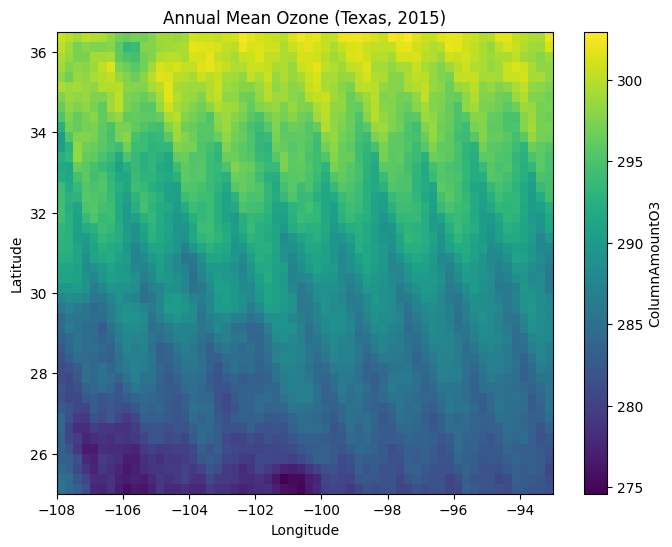

In [106]:
# Directory containing daily Texas subset NetCDF files
input_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2015'

# Open all daily files as a single xarray dataset
ds = xr.open_mfdataset(
    os.path.join(input_dir, '*.nc'),
    combine='by_coords'
)

# Compute annual mean
annual_mean_2015 = ds['ColumnAmountO3'].mean(dim='time', skipna=True)

print("✅ Annual mean calculated for Texas (2015)")
print(annual_mean_2015)

# Save to NetCDF
output_file = '/Users/nawarajadhikari/Capstone_project/OMI_O3_Texas_Annual_Mean/OMI_O3_AnnualMean_Texas_2015.nc'
annual_mean_2015.to_netcdf(output_file)
print(f"✅ Saved annual mean to {output_file}")

#plot
plt.figure(figsize=(8, 6))
annual_mean_2015.plot(cmap='viridis')
plt.title('Annual Mean Ozone (Texas, 2015)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Reading .he5 files for the year 2016 

In [34]:
data_dir = '/Users/nawarajadhikari/OMI_O3_Data/2016'

# Path for ozone field
data_path = '/HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ColumnAmountO3'

# Initialize lists
dates = []
ozone_data = []

# Loop through files
for filename in sorted(os.listdir(data_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(data_dir, filename)
        
        # Extract date from filename (omi_O3_YYYYMMDD.he5)
        match = re.search(r'(\d{8})', filename)
        if match:
            date = match.group(1)
        else:
            date = 'unknown'
        
        with h5py.File(file_path, 'r') as f:
            if data_path in f:
                data = f[data_path][()]
                data = np.where(data < 0, np.nan, data)  # Filter invalid values
                
                dates.append(date)
                ozone_data.append(data)
                print(f"✅ Loaded {filename} with shape {data.shape}")
            else:
                print(f"❌ {filename} missing {data_path}")

print(f"\nTotal files read: {len(ozone_data)}")

# Print first file shape
if ozone_data:
    print(f"First file shape: {ozone_data[0].shape}")


✅ Loaded omi_O3_20160101.he5 with shape (720, 1440)
✅ Loaded omi_O3_20160102.he5 with shape (720, 1440)
✅ Loaded omi_O3_20160103.he5 with shape (720, 1440)
✅ Loaded omi_O3_20160104.he5 with shape (720, 1440)
✅ Loaded omi_O3_20160105.he5 with shape (720, 1440)
✅ Loaded omi_O3_20160106.he5 with shape (720, 1440)
✅ Loaded omi_O3_20160107.he5 with shape (720, 1440)
✅ Loaded omi_O3_20160108.he5 with shape (720, 1440)
✅ Loaded omi_O3_20160109.he5 with shape (720, 1440)
✅ Loaded omi_O3_20160110.he5 with shape (720, 1440)
✅ Loaded omi_O3_20160111.he5 with shape (720, 1440)
✅ Loaded omi_O3_20160112.he5 with shape (720, 1440)
✅ Loaded omi_O3_20160113.he5 with shape (720, 1440)
✅ Loaded omi_O3_20160114.he5 with shape (720, 1440)
✅ Loaded omi_O3_20160115.he5 with shape (720, 1440)
✅ Loaded omi_O3_20160116.he5 with shape (720, 1440)
✅ Loaded omi_O3_20160117.he5 with shape (720, 1440)
✅ Loaded omi_O3_20160118.he5 with shape (720, 1440)
✅ Loaded omi_O3_20160119.he5 with shape (720, 1440)
✅ Loaded omi

# Converting .he5 files into .nc for 2016

In [35]:
# Converting .he5 files into .nc files for 2016
# Input and output directories
input_dir = '/Users/nawarajadhikari/OMI_O3_Data/2016'
output_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2016'
os.makedirs(output_dir, exist_ok=True)

# Data path inside HE5 file
data_path = '/HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ColumnAmountO3'

# Generate latitude and longitude arrays (for 0.25° global grid)
lat = np.arange(-89.875, 90, 0.25)
lon = np.arange(-179.875, 180, 0.25)

# Loop through each HE5 file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.he5'):
        match = re.search(r'(\d{8})', filename)
        if not match:
            print(f"Skipping {filename} (no date found)")
            continue

        date_str = match.group(1)
        date = datetime.strptime(date_str, "%Y%m%d")

        file_path = os.path.join(input_dir, filename)

        # Read data
        with h5py.File(file_path, 'r') as f:
            if data_path not in f:
                print(f"Data field missing in {filename}")
                continue

            data = f[data_path][()]
            data = np.where(data < 0, np.nan, data)  # Filter invalid values

        # Create xarray Dataset
        ds = xr.Dataset(
            {
                "ColumnAmountO3": (("lat", "lon"), data)
            },
            coords={
                "lat": lat,
                "lon": lon,
                "time": np.array([date])
            },
            attrs={
                "title": "OMI Total Column Ozone",
                "source": "OMDOAO3e.003",
                "date": date_str,
                "units": "Dobson Units"
            }
        )

        # Save as NetCDF
        output_file = os.path.join(output_dir, f"omi_O3_{date_str}.nc")
        ds.to_netcdf(output_file)
        print(f"✅ Saved {output_file}")


✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2016/omi_O3_20160101.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2016/omi_O3_20160102.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2016/omi_O3_20160103.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2016/omi_O3_20160104.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2016/omi_O3_20160105.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2016/omi_O3_20160106.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2016/omi_O3_20160107.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2016/omi_O3_20160108.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2016/omi_O3_20160109.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2016/omi_O3_20160110.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2016/omi_O3_20160111.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3

# Extracting files for the Texas region for 2016


In [36]:
 # Input and output directories
input_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2016'
#/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF
output_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2016'
os.makedirs(output_dir, exist_ok=True)

# Texas bounding box
lat_min, lat_max = 25, 36.5
lon_min, lon_max = -108, -93

for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.nc'):
        input_file = os.path.join(input_dir, filename)

        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        date_str = match.group(1) if match else "unknown"

        # Open NetCDF
        ds = xr.open_dataset(input_file)

        # Subset Texas region
        ds_texas = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

        # Save Texas subset as NetCDF
        output_file = os.path.join(output_dir, f"omi_O3_Texas_{date_str}.nc")
        ds_texas.to_netcdf(output_file)

        print(f"✅ Saved Texas subset: {output_file}")


✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2016/omi_O3_Texas_20160101.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2016/omi_O3_Texas_20160102.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2016/omi_O3_Texas_20160103.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2016/omi_O3_Texas_20160104.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2016/omi_O3_Texas_20160105.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2016/omi_O3_Texas_20160106.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2016/omi_O3_Texas_20160107.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2016/omi_O3_Texas_20160108.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2016/omi_O3_Texas_20160109.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_P

# Computation of Annual Mean for the year 2016

✅ Annual mean calculated for Texas (2016
<xarray.DataArray 'ColumnAmountO3' (lat: 46, lon: 60)> Size: 11kB
dask.array<mean_agg-aggregate, shape=(46, 60), dtype=float32, chunksize=(46, 60), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 368B 25.12 25.38 25.62 25.88 ... 35.88 36.12 36.38
  * lon      (lon) float64 480B -107.9 -107.6 -107.4 ... -93.62 -93.38 -93.12
✅ Saved annual mean to /Users/nawarajadhikari/Capstone_project/OMI_O3_Texas_Annual_Mean/OMI_O3_AnnualMean_Texas_2016.nc


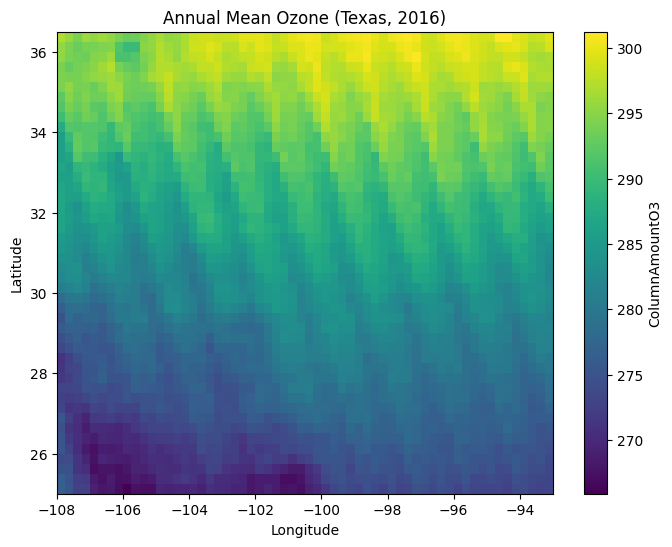

In [107]:
# Directory containing daily Texas subset NetCDF files
input_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2016'

# Open all daily files as a single xarray dataset
ds = xr.open_mfdataset(
    os.path.join(input_dir, '*.nc'),
    combine='by_coords'
)

# Compute annual mean
annual_mean_2016 = ds['ColumnAmountO3'].mean(dim='time', skipna=True)

print("✅ Annual mean calculated for Texas (2016")
print(annual_mean_2016)

# Save to NetCDF
output_file = '/Users/nawarajadhikari/Capstone_project/OMI_O3_Texas_Annual_Mean/OMI_O3_AnnualMean_Texas_2016.nc'
annual_mean_2016.to_netcdf(output_file)
print(f"✅ Saved annual mean to {output_file}")

#plot
plt.figure(figsize=(8, 6))
annual_mean_2016.plot(cmap='viridis')
plt.title('Annual Mean Ozone (Texas, 2016)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Reading .he5 files for the year 2017

In [37]:
data_dir = '/Users/nawarajadhikari/OMI_O3_Data/2017'

# Path for ozone field
data_path = '/HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ColumnAmountO3'

# Initialize lists
dates = []
ozone_data = []

# Loop through files
for filename in sorted(os.listdir(data_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(data_dir, filename)
        
        # Extract date from filename (omi_O3_YYYYMMDD.he5)
        match = re.search(r'(\d{8})', filename)
        if match:
            date = match.group(1)
        else:
            date = 'unknown'
        
        with h5py.File(file_path, 'r') as f:
            if data_path in f:
                data = f[data_path][()]
                data = np.where(data < 0, np.nan, data)  # Filter invalid values
                
                dates.append(date)
                ozone_data.append(data)
                print(f"✅ Loaded {filename} with shape {data.shape}")
            else:
                print(f"❌ {filename} missing {data_path}")

print(f"\nTotal files read: {len(ozone_data)}")

# Print first file shape
if ozone_data:
    print(f"First file shape: {ozone_data[0].shape}")


✅ Loaded omi_O3_20170101.he5 with shape (720, 1440)
✅ Loaded omi_O3_20170102.he5 with shape (720, 1440)
✅ Loaded omi_O3_20170103.he5 with shape (720, 1440)
✅ Loaded omi_O3_20170104.he5 with shape (720, 1440)
✅ Loaded omi_O3_20170105.he5 with shape (720, 1440)
✅ Loaded omi_O3_20170106.he5 with shape (720, 1440)
✅ Loaded omi_O3_20170107.he5 with shape (720, 1440)
✅ Loaded omi_O3_20170108.he5 with shape (720, 1440)
✅ Loaded omi_O3_20170109.he5 with shape (720, 1440)
✅ Loaded omi_O3_20170110.he5 with shape (720, 1440)
✅ Loaded omi_O3_20170111.he5 with shape (720, 1440)
✅ Loaded omi_O3_20170112.he5 with shape (720, 1440)
✅ Loaded omi_O3_20170113.he5 with shape (720, 1440)
✅ Loaded omi_O3_20170114.he5 with shape (720, 1440)
✅ Loaded omi_O3_20170115.he5 with shape (720, 1440)
✅ Loaded omi_O3_20170116.he5 with shape (720, 1440)
✅ Loaded omi_O3_20170117.he5 with shape (720, 1440)
✅ Loaded omi_O3_20170118.he5 with shape (720, 1440)
✅ Loaded omi_O3_20170119.he5 with shape (720, 1440)
✅ Loaded omi

# Converting .he5 fiels into .nc for 2017

In [38]:
# Converting .he5 files into .nc files for 2017
# Input and output directories
input_dir = '/Users/nawarajadhikari/OMI_O3_Data/2017'
output_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2017'
os.makedirs(output_dir, exist_ok=True)

# Data path inside HE5 file
data_path = '/HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ColumnAmountO3'

# Generate latitude and longitude arrays (for 0.25° global grid)
lat = np.arange(-89.875, 90, 0.25)
lon = np.arange(-179.875, 180, 0.25)

# Loop through each HE5 file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.he5'):
        match = re.search(r'(\d{8})', filename)
        if not match:
            print(f"Skipping {filename} (no date found)")
            continue

        date_str = match.group(1)
        date = datetime.strptime(date_str, "%Y%m%d")

        file_path = os.path.join(input_dir, filename)

        # Read data
        with h5py.File(file_path, 'r') as f:
            if data_path not in f:
                print(f"Data field missing in {filename}")
                continue

            data = f[data_path][()]
            data = np.where(data < 0, np.nan, data)  # Filter invalid values

        # Create xarray Dataset
        ds = xr.Dataset(
            {
                "ColumnAmountO3": (("lat", "lon"), data)
            },
            coords={
                "lat": lat,
                "lon": lon,
                "time": np.array([date])
            },
            attrs={
                "title": "OMI Total Column Ozone",
                "source": "OMDOAO3e.003",
                "date": date_str,
                "units": "Dobson Units"
            }
        )

        # Save as NetCDF
        output_file = os.path.join(output_dir, f"omi_O3_{date_str}.nc")
        ds.to_netcdf(output_file)
        print(f"✅ Saved {output_file}")


✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2017/omi_O3_20170101.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2017/omi_O3_20170102.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2017/omi_O3_20170103.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2017/omi_O3_20170104.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2017/omi_O3_20170105.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2017/omi_O3_20170106.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2017/omi_O3_20170107.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2017/omi_O3_20170108.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2017/omi_O3_20170109.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2017/omi_O3_20170110.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2017/omi_O3_20170111.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3

# Extracting the files for the Texas region for 2017

In [39]:
 # Input and output directories
input_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2017'
#/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF
output_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2017'
os.makedirs(output_dir, exist_ok=True)

# Texas bounding box
lat_min, lat_max = 25, 36.5
lon_min, lon_max = -108, -93

for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.nc'):
        input_file = os.path.join(input_dir, filename)

        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        date_str = match.group(1) if match else "unknown"

        # Open NetCDF
        ds = xr.open_dataset(input_file)

        # Subset Texas region
        ds_texas = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

        # Save Texas subset as NetCDF
        output_file = os.path.join(output_dir, f"omi_O3_Texas_{date_str}.nc")
        ds_texas.to_netcdf(output_file)

        print(f"✅ Saved Texas subset: {output_file}")


✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2017/omi_O3_Texas_20170101.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2017/omi_O3_Texas_20170102.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2017/omi_O3_Texas_20170103.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2017/omi_O3_Texas_20170104.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2017/omi_O3_Texas_20170105.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2017/omi_O3_Texas_20170106.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2017/omi_O3_Texas_20170107.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2017/omi_O3_Texas_20170108.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2017/omi_O3_Texas_20170109.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_P

# Computation of Annual Mean for the year 2017

✅ Annual mean calculated for Texas (2017
<xarray.DataArray 'ColumnAmountO3' (lat: 46, lon: 60)> Size: 11kB
dask.array<mean_agg-aggregate, shape=(46, 60), dtype=float32, chunksize=(46, 60), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 368B 25.12 25.38 25.62 25.88 ... 35.88 36.12 36.38
  * lon      (lon) float64 480B -107.9 -107.6 -107.4 ... -93.62 -93.38 -93.12
✅ Saved annual mean to /Users/nawarajadhikari/Capstone_project/OMI_O3_Texas_Annual_Mean/OMI_O3_AnnualMean_Texas_2017.nc


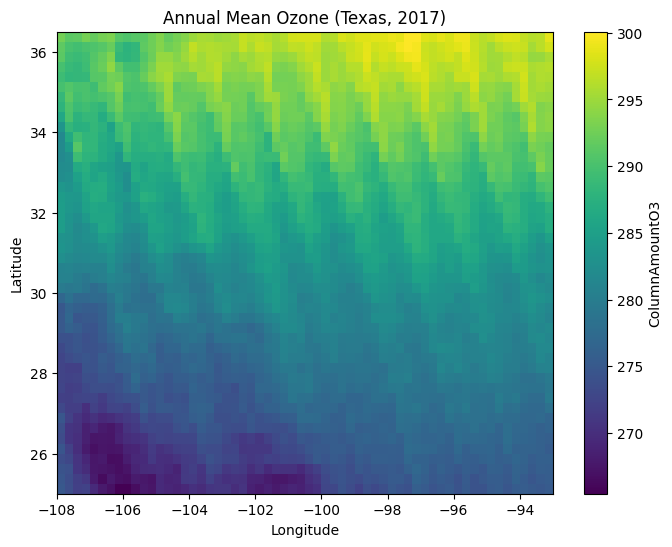

In [108]:
# Directory containing daily Texas subset NetCDF files
input_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2017'

# Open all daily files as a single xarray dataset
ds = xr.open_mfdataset(
    os.path.join(input_dir, '*.nc'),
    combine='by_coords'
)

# Compute annual mean
annual_mean_2017 = ds['ColumnAmountO3'].mean(dim='time', skipna=True)

print("✅ Annual mean calculated for Texas (2017")
print(annual_mean_2017)

# Save to NetCDF
output_file = '/Users/nawarajadhikari/Capstone_project/OMI_O3_Texas_Annual_Mean/OMI_O3_AnnualMean_Texas_2017.nc'
annual_mean_2017.to_netcdf(output_file)
print(f"✅ Saved annual mean to {output_file}")

#plot
plt.figure(figsize=(8, 6))
annual_mean_2017.plot(cmap='viridis')
plt.title('Annual Mean Ozone (Texas, 2017)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Reading .he5 files for 2018

In [40]:
data_dir = '/Users/nawarajadhikari/OMI_O3_Data/2018'

# Path for ozone field
data_path = '/HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ColumnAmountO3'

# Initialize lists
dates = []
ozone_data = []

# Loop through files
for filename in sorted(os.listdir(data_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(data_dir, filename)
        
        # Extract date from filename (omi_O3_YYYYMMDD.he5)
        match = re.search(r'(\d{8})', filename)
        if match:
            date = match.group(1)
        else:
            date = 'unknown'
        
        with h5py.File(file_path, 'r') as f:
            if data_path in f:
                data = f[data_path][()]
                data = np.where(data < 0, np.nan, data)  # Filter invalid values
                
                dates.append(date)
                ozone_data.append(data)
                print(f"✅ Loaded {filename} with shape {data.shape}")
            else:
                print(f"❌ {filename} missing {data_path}")

print(f"\nTotal files read: {len(ozone_data)}")

# Print first file shape
if ozone_data:
    print(f"First file shape: {ozone_data[0].shape}")


✅ Loaded omi_O3_20180101.he5 with shape (720, 1440)
✅ Loaded omi_O3_20180102.he5 with shape (720, 1440)
✅ Loaded omi_O3_20180103.he5 with shape (720, 1440)
✅ Loaded omi_O3_20180104.he5 with shape (720, 1440)
✅ Loaded omi_O3_20180105.he5 with shape (720, 1440)
✅ Loaded omi_O3_20180106.he5 with shape (720, 1440)
✅ Loaded omi_O3_20180107.he5 with shape (720, 1440)
✅ Loaded omi_O3_20180108.he5 with shape (720, 1440)
✅ Loaded omi_O3_20180109.he5 with shape (720, 1440)
✅ Loaded omi_O3_20180110.he5 with shape (720, 1440)
✅ Loaded omi_O3_20180111.he5 with shape (720, 1440)
✅ Loaded omi_O3_20180112.he5 with shape (720, 1440)
✅ Loaded omi_O3_20180113.he5 with shape (720, 1440)
✅ Loaded omi_O3_20180114.he5 with shape (720, 1440)
✅ Loaded omi_O3_20180115.he5 with shape (720, 1440)
✅ Loaded omi_O3_20180116.he5 with shape (720, 1440)
✅ Loaded omi_O3_20180117.he5 with shape (720, 1440)
✅ Loaded omi_O3_20180118.he5 with shape (720, 1440)
✅ Loaded omi_O3_20180119.he5 with shape (720, 1440)
✅ Loaded omi

# Converting .he5 files into .nc for 2018

In [41]:
# Converting .he5 files into .nc files for 2018
# Input and output directories
input_dir = '/Users/nawarajadhikari/OMI_O3_Data/2018'
output_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2018'
os.makedirs(output_dir, exist_ok=True)

# Data path inside HE5 file
data_path = '/HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ColumnAmountO3'

# Generate latitude and longitude arrays (for 0.25° global grid)
lat = np.arange(-89.875, 90, 0.25)
lon = np.arange(-179.875, 180, 0.25)

# Loop through each HE5 file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.he5'):
        match = re.search(r'(\d{8})', filename)
        if not match:
            print(f"Skipping {filename} (no date found)")
            continue

        date_str = match.group(1)
        date = datetime.strptime(date_str, "%Y%m%d")

        file_path = os.path.join(input_dir, filename)

        # Read data
        with h5py.File(file_path, 'r') as f:
            if data_path not in f:
                print(f"Data field missing in {filename}")
                continue

            data = f[data_path][()]
            data = np.where(data < 0, np.nan, data)  # Filter invalid values

        # Create xarray Dataset
        ds = xr.Dataset(
            {
                "ColumnAmountO3": (("lat", "lon"), data)
            },
            coords={
                "lat": lat,
                "lon": lon,
                "time": np.array([date])
            },
            attrs={
                "title": "OMI Total Column Ozone",
                "source": "OMDOAO3e.003",
                "date": date_str,
                "units": "Dobson Units"
            }
        )

        # Save as NetCDF
        output_file = os.path.join(output_dir, f"omi_O3_{date_str}.nc")
        ds.to_netcdf(output_file)
        print(f"✅ Saved {output_file}")


✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2018/omi_O3_20180101.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2018/omi_O3_20180102.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2018/omi_O3_20180103.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2018/omi_O3_20180104.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2018/omi_O3_20180105.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2018/omi_O3_20180106.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2018/omi_O3_20180107.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2018/omi_O3_20180108.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2018/omi_O3_20180109.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2018/omi_O3_20180110.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2018/omi_O3_20180111.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3

# Extracting files for the Texas region for 2018

In [42]:
 # Input and output directories
input_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2018'
#/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF
output_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2018'
os.makedirs(output_dir, exist_ok=True)

# Texas bounding box
lat_min, lat_max = 25, 36.5
lon_min, lon_max = -108, -93

for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.nc'):
        input_file = os.path.join(input_dir, filename)

        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        date_str = match.group(1) if match else "unknown"

        # Open NetCDF
        ds = xr.open_dataset(input_file)

        # Subset Texas region
        ds_texas = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

        # Save Texas subset as NetCDF
        output_file = os.path.join(output_dir, f"omi_O3_Texas_{date_str}.nc")
        ds_texas.to_netcdf(output_file)

        print(f"✅ Saved Texas subset: {output_file}")


✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2018/omi_O3_Texas_20180101.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2018/omi_O3_Texas_20180102.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2018/omi_O3_Texas_20180103.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2018/omi_O3_Texas_20180104.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2018/omi_O3_Texas_20180105.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2018/omi_O3_Texas_20180106.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2018/omi_O3_Texas_20180107.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2018/omi_O3_Texas_20180108.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2018/omi_O3_Texas_20180109.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_P

# Computation of Annual Mean for the year 2018

✅ Annual mean calculated for Texas (2018
<xarray.DataArray 'ColumnAmountO3' (lat: 46, lon: 60)> Size: 11kB
dask.array<mean_agg-aggregate, shape=(46, 60), dtype=float32, chunksize=(46, 60), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 368B 25.12 25.38 25.62 25.88 ... 35.88 36.12 36.38
  * lon      (lon) float64 480B -107.9 -107.6 -107.4 ... -93.62 -93.38 -93.12
✅ Saved annual mean to /Users/nawarajadhikari/Capstone_project/OMI_O3_Texas_Annual_Mean/OMI_O3_AnnualMean_Texas_2018.nc


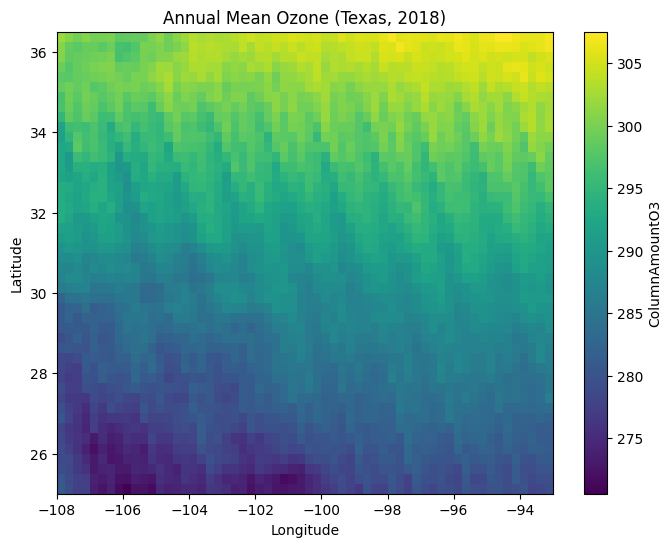

In [109]:
# Directory containing daily Texas subset NetCDF files
input_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2018'

# Open all daily files as a single xarray dataset
ds = xr.open_mfdataset(
    os.path.join(input_dir, '*.nc'),
    combine='by_coords'
)

# Compute annual mean
annual_mean_2018 = ds['ColumnAmountO3'].mean(dim='time', skipna=True)

print("✅ Annual mean calculated for Texas (2018")
print(annual_mean_2018)

# Save to NetCDF
output_file = '/Users/nawarajadhikari/Capstone_project/OMI_O3_Texas_Annual_Mean/OMI_O3_AnnualMean_Texas_2018.nc'
annual_mean_2018.to_netcdf(output_file)
print(f"✅ Saved annual mean to {output_file}")

#plot
plt.figure(figsize=(8, 6))
annual_mean_2018.plot(cmap='viridis')
plt.title('Annual Mean Ozone (Texas, 2018)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Reading .he5 file for the year 2019

In [43]:
data_dir = '/Users/nawarajadhikari/OMI_O3_Data/2019'

# Path for ozone field
data_path = '/HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ColumnAmountO3'

# Initialize lists
dates = []
ozone_data = []

# Loop through files
for filename in sorted(os.listdir(data_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(data_dir, filename)
        
        # Extract date from filename (omi_O3_YYYYMMDD.he5)
        match = re.search(r'(\d{8})', filename)
        if match:
            date = match.group(1)
        else:
            date = 'unknown'
        
        with h5py.File(file_path, 'r') as f:
            if data_path in f:
                data = f[data_path][()]
                data = np.where(data < 0, np.nan, data)  # Filter invalid values
                
                dates.append(date)
                ozone_data.append(data)
                print(f"✅ Loaded {filename} with shape {data.shape}")
            else:
                print(f"❌ {filename} missing {data_path}")

print(f"\nTotal files read: {len(ozone_data)}")

# Print first file shape
if ozone_data:
    print(f"First file shape: {ozone_data[0].shape}")


✅ Loaded omi_O3_20190101.he5 with shape (720, 1440)
✅ Loaded omi_O3_20190102.he5 with shape (720, 1440)
✅ Loaded omi_O3_20190103.he5 with shape (720, 1440)
✅ Loaded omi_O3_20190104.he5 with shape (720, 1440)
✅ Loaded omi_O3_20190105.he5 with shape (720, 1440)
✅ Loaded omi_O3_20190106.he5 with shape (720, 1440)
✅ Loaded omi_O3_20190107.he5 with shape (720, 1440)
✅ Loaded omi_O3_20190108.he5 with shape (720, 1440)
✅ Loaded omi_O3_20190109.he5 with shape (720, 1440)
✅ Loaded omi_O3_20190110.he5 with shape (720, 1440)
✅ Loaded omi_O3_20190111.he5 with shape (720, 1440)
✅ Loaded omi_O3_20190112.he5 with shape (720, 1440)
✅ Loaded omi_O3_20190113.he5 with shape (720, 1440)
✅ Loaded omi_O3_20190114.he5 with shape (720, 1440)
✅ Loaded omi_O3_20190115.he5 with shape (720, 1440)
✅ Loaded omi_O3_20190116.he5 with shape (720, 1440)
✅ Loaded omi_O3_20190117.he5 with shape (720, 1440)
✅ Loaded omi_O3_20190118.he5 with shape (720, 1440)
✅ Loaded omi_O3_20190119.he5 with shape (720, 1440)
✅ Loaded omi

# Converting .he5 files into .nc for 2019

In [44]:
# Converting .he5 files into .nc files for 2019
# Input and output directories
input_dir = '/Users/nawarajadhikari/OMI_O3_Data/2019'
output_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2019'
os.makedirs(output_dir, exist_ok=True)

# Data path inside HE5 file
data_path = '/HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ColumnAmountO3'

# Generate latitude and longitude arrays (for 0.25° global grid)
lat = np.arange(-89.875, 90, 0.25)
lon = np.arange(-179.875, 180, 0.25)

# Loop through each HE5 file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.he5'):
        match = re.search(r'(\d{8})', filename)
        if not match:
            print(f"Skipping {filename} (no date found)")
            continue

        date_str = match.group(1)
        date = datetime.strptime(date_str, "%Y%m%d")

        file_path = os.path.join(input_dir, filename)

        # Read data
        with h5py.File(file_path, 'r') as f:
            if data_path not in f:
                print(f"Data field missing in {filename}")
                continue

            data = f[data_path][()]
            data = np.where(data < 0, np.nan, data)  # Filter invalid values

        # Create xarray Dataset
        ds = xr.Dataset(
            {
                "ColumnAmountO3": (("lat", "lon"), data)
            },
            coords={
                "lat": lat,
                "lon": lon,
                "time": np.array([date])
            },
            attrs={
                "title": "OMI Total Column Ozone",
                "source": "OMDOAO3e.003",
                "date": date_str,
                "units": "Dobson Units"
            }
        )

        # Save as NetCDF
        output_file = os.path.join(output_dir, f"omi_O3_{date_str}.nc")
        ds.to_netcdf(output_file)
        print(f"✅ Saved {output_file}")


✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2019/omi_O3_20190101.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2019/omi_O3_20190102.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2019/omi_O3_20190103.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2019/omi_O3_20190104.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2019/omi_O3_20190105.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2019/omi_O3_20190106.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2019/omi_O3_20190107.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2019/omi_O3_20190108.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2019/omi_O3_20190109.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2019/omi_O3_20190110.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2019/omi_O3_20190111.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3

# Extracting files for the Texas region for 2019

In [45]:
# Input and output directories
input_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2019'
#/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF
output_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2019'
os.makedirs(output_dir, exist_ok=True)

# Texas bounding box
lat_min, lat_max = 25, 36.5
lon_min, lon_max = -108, -93

for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.nc'):
        input_file = os.path.join(input_dir, filename)

        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        date_str = match.group(1) if match else "unknown"

        # Open NetCDF
        ds = xr.open_dataset(input_file)

        # Subset Texas region
        ds_texas = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

        # Save Texas subset as NetCDF
        output_file = os.path.join(output_dir, f"omi_O3_Texas_{date_str}.nc")
        ds_texas.to_netcdf(output_file)

        print(f"✅ Saved Texas subset: {output_file}")


✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2019/omi_O3_Texas_20190101.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2019/omi_O3_Texas_20190102.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2019/omi_O3_Texas_20190103.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2019/omi_O3_Texas_20190104.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2019/omi_O3_Texas_20190105.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2019/omi_O3_Texas_20190106.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2019/omi_O3_Texas_20190107.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2019/omi_O3_Texas_20190108.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2019/omi_O3_Texas_20190109.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_P

# Computation of Annual Mean for the year 2019

✅ Annual mean calculated for Texas (2019
<xarray.DataArray 'ColumnAmountO3' (lat: 46, lon: 60)> Size: 11kB
dask.array<mean_agg-aggregate, shape=(46, 60), dtype=float32, chunksize=(46, 60), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 368B 25.12 25.38 25.62 25.88 ... 35.88 36.12 36.38
  * lon      (lon) float64 480B -107.9 -107.6 -107.4 ... -93.62 -93.38 -93.12
✅ Saved annual mean to /Users/nawarajadhikari/Capstone_project/OMI_O3_Texas_Annual_Mean/OMI_O3_AnnualMean_Texas_2019.nc


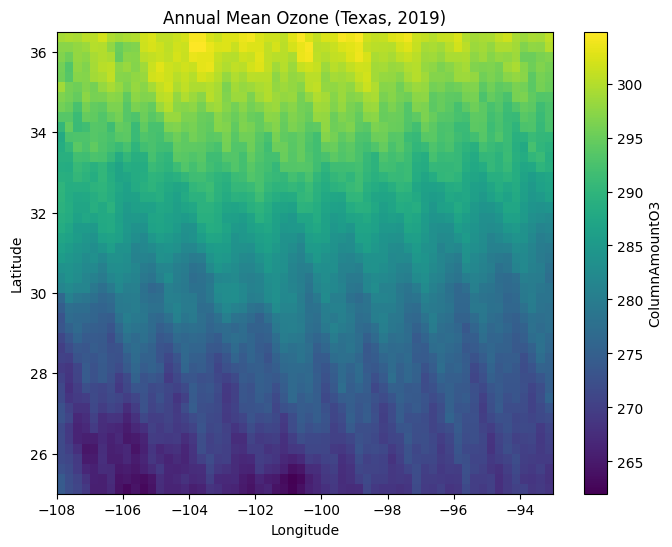

In [110]:
# Directory containing daily Texas subset NetCDF files
input_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2019'

# Open all daily files as a single xarray dataset
ds = xr.open_mfdataset(
    os.path.join(input_dir, '*.nc'),
    combine='by_coords'
)

# Compute annual mean
annual_mean_2019 = ds['ColumnAmountO3'].mean(dim='time', skipna=True)

print("✅ Annual mean calculated for Texas (2019")
print(annual_mean_2019)

# Save to NetCDF
output_file = '/Users/nawarajadhikari/Capstone_project/OMI_O3_Texas_Annual_Mean/OMI_O3_AnnualMean_Texas_2019.nc'
annual_mean_2019.to_netcdf(output_file)
print(f"✅ Saved annual mean to {output_file}")

#plot
plt.figure(figsize=(8, 6))
annual_mean_2019.plot(cmap='viridis')
plt.title('Annual Mean Ozone (Texas, 2019)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Reading .he5 files for the year 2020

In [46]:
data_dir = '/Users/nawarajadhikari/OMI_O3_Data/2020'

# Path for ozone field
data_path = '/HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ColumnAmountO3'

# Initialize lists
dates = []
ozone_data = []

# Loop through files
for filename in sorted(os.listdir(data_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(data_dir, filename)
        
        # Extract date from filename (omi_O3_YYYYMMDD.he5)
        match = re.search(r'(\d{8})', filename)
        if match:
            date = match.group(1)
        else:
            date = 'unknown'
        
        with h5py.File(file_path, 'r') as f:
            if data_path in f:
                data = f[data_path][()]
                data = np.where(data < 0, np.nan, data)  # Filter invalid values
                
                dates.append(date)
                ozone_data.append(data)
                print(f"✅ Loaded {filename} with shape {data.shape}")
            else:
                print(f"❌ {filename} missing {data_path}")

print(f"\nTotal files read: {len(ozone_data)}")

# Print first file shape
if ozone_data:
    print(f"First file shape: {ozone_data[0].shape}")


✅ Loaded omi_O3_20200101.he5 with shape (720, 1440)
✅ Loaded omi_O3_20200102.he5 with shape (720, 1440)
✅ Loaded omi_O3_20200103.he5 with shape (720, 1440)
✅ Loaded omi_O3_20200104.he5 with shape (720, 1440)
✅ Loaded omi_O3_20200105.he5 with shape (720, 1440)
✅ Loaded omi_O3_20200106.he5 with shape (720, 1440)
✅ Loaded omi_O3_20200107.he5 with shape (720, 1440)
✅ Loaded omi_O3_20200108.he5 with shape (720, 1440)
✅ Loaded omi_O3_20200109.he5 with shape (720, 1440)
✅ Loaded omi_O3_20200110.he5 with shape (720, 1440)
✅ Loaded omi_O3_20200111.he5 with shape (720, 1440)
✅ Loaded omi_O3_20200112.he5 with shape (720, 1440)
✅ Loaded omi_O3_20200113.he5 with shape (720, 1440)
✅ Loaded omi_O3_20200114.he5 with shape (720, 1440)
✅ Loaded omi_O3_20200115.he5 with shape (720, 1440)
✅ Loaded omi_O3_20200116.he5 with shape (720, 1440)
✅ Loaded omi_O3_20200117.he5 with shape (720, 1440)
✅ Loaded omi_O3_20200118.he5 with shape (720, 1440)
✅ Loaded omi_O3_20200119.he5 with shape (720, 1440)
✅ Loaded omi

# Converting .he5 fils into .nc for the year 2020

In [47]:
# Converting .he5 files into .nc files for 2020
# Input and output directories
input_dir = '/Users/nawarajadhikari/OMI_O3_Data/2020'
output_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2020'
os.makedirs(output_dir, exist_ok=True)

# Data path inside HE5 file
data_path = '/HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ColumnAmountO3'

# Generate latitude and longitude arrays (for 0.25° global grid)
lat = np.arange(-89.875, 90, 0.25)
lon = np.arange(-179.875, 180, 0.25)

# Loop through each HE5 file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.he5'):
        match = re.search(r'(\d{8})', filename)
        if not match:
            print(f"Skipping {filename} (no date found)")
            continue

        date_str = match.group(1)
        date = datetime.strptime(date_str, "%Y%m%d")

        file_path = os.path.join(input_dir, filename)

        # Read data
        with h5py.File(file_path, 'r') as f:
            if data_path not in f:
                print(f"Data field missing in {filename}")
                continue

            data = f[data_path][()]
            data = np.where(data < 0, np.nan, data)  # Filter invalid values

        # Create xarray Dataset
        ds = xr.Dataset(
            {
                "ColumnAmountO3": (("lat", "lon"), data)
            },
            coords={
                "lat": lat,
                "lon": lon,
                "time": np.array([date])
            },
            attrs={
                "title": "OMI Total Column Ozone",
                "source": "OMDOAO3e.003",
                "date": date_str,
                "units": "Dobson Units"
            }
        )

        # Save as NetCDF
        output_file = os.path.join(output_dir, f"omi_O3_{date_str}.nc")
        ds.to_netcdf(output_file)
        print(f"✅ Saved {output_file}")


✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2020/omi_O3_20200101.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2020/omi_O3_20200102.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2020/omi_O3_20200103.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2020/omi_O3_20200104.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2020/omi_O3_20200105.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2020/omi_O3_20200106.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2020/omi_O3_20200107.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2020/omi_O3_20200108.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2020/omi_O3_20200109.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2020/omi_O3_20200110.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2020/omi_O3_20200111.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3

# Extracting files for the Texas region for 2020

In [48]:
# Input and output directories
input_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2020'
#/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF
output_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2020'
os.makedirs(output_dir, exist_ok=True)

# Texas bounding box
lat_min, lat_max = 25, 36.5
lon_min, lon_max = -108, -93

for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.nc'):
        input_file = os.path.join(input_dir, filename)

        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        date_str = match.group(1) if match else "unknown"

        # Open NetCDF
        ds = xr.open_dataset(input_file)

        # Subset Texas region
        ds_texas = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

        # Save Texas subset as NetCDF
        output_file = os.path.join(output_dir, f"omi_O3_Texas_{date_str}.nc")
        ds_texas.to_netcdf(output_file)

        print(f"✅ Saved Texas subset: {output_file}")


✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2020/omi_O3_Texas_20200101.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2020/omi_O3_Texas_20200102.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2020/omi_O3_Texas_20200103.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2020/omi_O3_Texas_20200104.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2020/omi_O3_Texas_20200105.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2020/omi_O3_Texas_20200106.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2020/omi_O3_Texas_20200107.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2020/omi_O3_Texas_20200108.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2020/omi_O3_Texas_20200109.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_P

# Computation of Annual Mean for the year 2020

✅ Annual mean calculated for Texas (2020
<xarray.DataArray 'ColumnAmountO3' (lat: 46, lon: 60)> Size: 11kB
dask.array<mean_agg-aggregate, shape=(46, 60), dtype=float32, chunksize=(46, 60), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 368B 25.12 25.38 25.62 25.88 ... 35.88 36.12 36.38
  * lon      (lon) float64 480B -107.9 -107.6 -107.4 ... -93.62 -93.38 -93.12
✅ Saved annual mean to /Users/nawarajadhikari/Capstone_project/OMI_O3_Texas_Annual_Mean/OMI_O3_AnnualMean_Texas_2020.nc


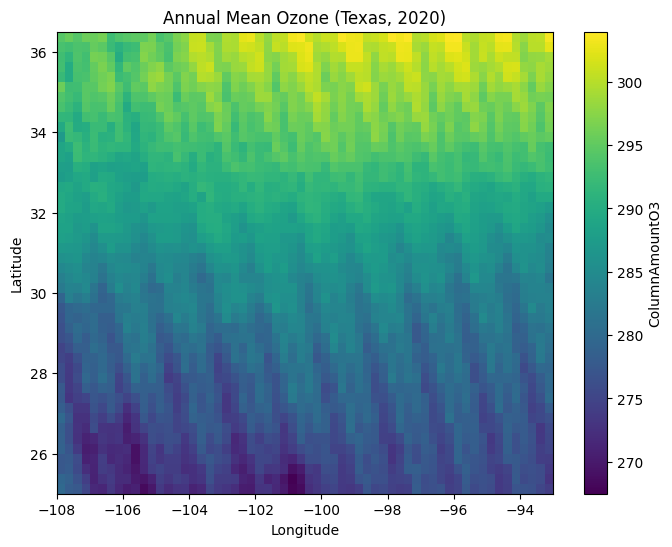

In [111]:
# Directory containing daily Texas subset NetCDF files
input_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2020'

# Open all daily files as a single xarray dataset
ds = xr.open_mfdataset(
    os.path.join(input_dir, '*.nc'),
    combine='by_coords'
)

# Compute annual mean
annual_mean_2020 = ds['ColumnAmountO3'].mean(dim='time', skipna=True)

print("✅ Annual mean calculated for Texas (2020")
print(annual_mean_2020)

# Save to NetCDF
output_file = '/Users/nawarajadhikari/Capstone_project/OMI_O3_Texas_Annual_Mean/OMI_O3_AnnualMean_Texas_2020.nc'
annual_mean_2020.to_netcdf(output_file)
print(f"✅ Saved annual mean to {output_file}")

#plot
plt.figure(figsize=(8, 6))
annual_mean_2020.plot(cmap='viridis')
plt.title('Annual Mean Ozone (Texas, 2020)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Reading .he5 files for the year 2021

In [52]:
data_dir = "/Users/nawarajadhikari/OMI_O3_Data/2021"
data_path = "/HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ColumnAmountO3"

# Loop through all .he5 files
for filename in sorted(os.listdir(data_dir)):
    if filename.endswith(".he5"):
        file_path = os.path.join(data_dir, filename)

        # Check file validity
        if not os.path.isfile(file_path) or os.path.getsize(file_path) == 0:
            print(f"⚠️ Skipping invalid or empty file: {file_path}")
            continue

        try:
            with h5py.File(file_path, "r") as f:
                if data_path not in f:
                    print(f"⚠️ Dataset missing in: {filename}")
                    continue

                data = f[data_path][()]
                data = np.where(data < 0, np.nan, data)
                print(f"✅ Loaded {filename} with shape {data.shape}")

        except Exception as e:
            print(f"❌ Error reading {filename}: {e}")


✅ Loaded omi_O3_20210101.he5 with shape (720, 1440)
✅ Loaded omi_O3_20210102.he5 with shape (720, 1440)
✅ Loaded omi_O3_20210103.he5 with shape (720, 1440)
✅ Loaded omi_O3_20210104.he5 with shape (720, 1440)
✅ Loaded omi_O3_20210105.he5 with shape (720, 1440)
✅ Loaded omi_O3_20210106.he5 with shape (720, 1440)
✅ Loaded omi_O3_20210107.he5 with shape (720, 1440)
✅ Loaded omi_O3_20210108.he5 with shape (720, 1440)
✅ Loaded omi_O3_20210109.he5 with shape (720, 1440)
✅ Loaded omi_O3_20210110.he5 with shape (720, 1440)
✅ Loaded omi_O3_20210111.he5 with shape (720, 1440)
✅ Loaded omi_O3_20210112.he5 with shape (720, 1440)
✅ Loaded omi_O3_20210113.he5 with shape (720, 1440)
✅ Loaded omi_O3_20210114.he5 with shape (720, 1440)
✅ Loaded omi_O3_20210115.he5 with shape (720, 1440)
✅ Loaded omi_O3_20210116.he5 with shape (720, 1440)
✅ Loaded omi_O3_20210117.he5 with shape (720, 1440)
✅ Loaded omi_O3_20210118.he5 with shape (720, 1440)
✅ Loaded omi_O3_20210119.he5 with shape (720, 1440)
✅ Loaded omi

# Converting .he5 files into .nc for the year 2021

In [ ]:
# Directories
input_dir = '/Users/nawarajadhikari/OMI_O3_Data/2021'
output_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2021'
os.makedirs(output_dir, exist_ok=True)

# Data path inside HE5 file
data_path = '/HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ColumnAmountO3'

# Lat/Lon arrays for global grid (0.25° resolution)
lat = np.arange(-89.875, 90, 0.25)
lon = np.arange(-179.875, 180, 0.25)

for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(input_dir, filename)

        # ✅ Check if file exists and is not empty
        if not os.path.isfile(file_path) or os.path.getsize(file_path) == 0:
            print(f"⚠️ Skipping empty or invalid file: {file_path}")
            continue

        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        if not match:
            print(f"⚠️ Skipping {filename} (no valid date found)")
            continue
        date_str = match.group(1)
        date = datetime.strptime(date_str, "%Y%m%d")

        # ✅ Read the HE5 file safely
        try:
            with h5py.File(file_path, 'r') as f:
                if data_path not in f:
                    print(f"⚠️ Dataset missing in: {filename}")
                    continue

                data = f[data_path][()]
                data = np.where(data < 0, np.nan, data)  # Filter invalid values

        except Exception as e:
            print(f"❌ Error reading {filename}: {e}")
            continue

        # ✅ Create xarray Dataset
        ds = xr.Dataset(
            {
                "ColumnAmountO3": (("lat", "lon"), data)
            },
            coords={
                "lat": lat,
                "lon": lon,
                "time": np.array([date])
            },
            attrs={
                "title": "OMI Total Column Ozone",
                "source": "OMDOAO3e.003",
                "date": date_str,
                "units": "Dobson Units"
            }
        )

        # ✅ Save to NetCDF
        output_file = os.path.join(output_dir, f"omi_O3_{date_str}.nc")
        ds.to_netcdf(output_file)
        print(f"✅ Saved: {output_file}")



✅ Saved: /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2021/omi_O3_20210101.nc
✅ Saved: /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2021/omi_O3_20210102.nc
✅ Saved: /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2021/omi_O3_20210103.nc
✅ Saved: /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2021/omi_O3_20210104.nc
✅ Saved: /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2021/omi_O3_20210105.nc
✅ Saved: /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2021/omi_O3_20210106.nc
✅ Saved: /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2021/omi_O3_20210107.nc
✅ Saved: /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2021/omi_O3_20210108.nc
✅ Saved: /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2021/omi_O3_20210109.nc
✅ Saved: /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2021/omi_O3_20210110.nc
✅ Saved: /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2021/omi_O3_20210111.nc
✅ Saved: /Users/nawarajadhikari/Capstone_Pr

# Extracting files for the Texas region for 2021

In [55]:
# Input and output directories
input_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2021'
#/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF
output_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2021'
os.makedirs(output_dir, exist_ok=True)

# Texas bounding box
lat_min, lat_max = 25, 36.5
lon_min, lon_max = -108, -93

for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.nc'):
        input_file = os.path.join(input_dir, filename)

        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        date_str = match.group(1) if match else "unknown"

        # Open NetCDF
        ds = xr.open_dataset(input_file)

        # Subset Texas region
        ds_texas = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

        # Save Texas subset as NetCDF
        output_file = os.path.join(output_dir, f"omi_O3_Texas_{date_str}.nc")
        ds_texas.to_netcdf(output_file)

        print(f"✅ Saved Texas subset: {output_file}")


✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2021/omi_O3_Texas_20210101.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2021/omi_O3_Texas_20210102.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2021/omi_O3_Texas_20210103.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2021/omi_O3_Texas_20210104.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2021/omi_O3_Texas_20210105.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2021/omi_O3_Texas_20210106.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2021/omi_O3_Texas_20210107.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2021/omi_O3_Texas_20210108.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2021/omi_O3_Texas_20210109.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_P

# Computation of Annual Mean for the year 2021

✅ Annual mean calculated for Texas (2021
<xarray.DataArray 'ColumnAmountO3' (lat: 46, lon: 60)> Size: 11kB
dask.array<mean_agg-aggregate, shape=(46, 60), dtype=float32, chunksize=(46, 60), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 368B 25.12 25.38 25.62 25.88 ... 35.88 36.12 36.38
  * lon      (lon) float64 480B -107.9 -107.6 -107.4 ... -93.62 -93.38 -93.12
✅ Saved annual mean to /Users/nawarajadhikari/Capstone_project/OMI_O3_Texas_Annual_Mean/OMI_O3_AnnualMean_Texas_2021.nc


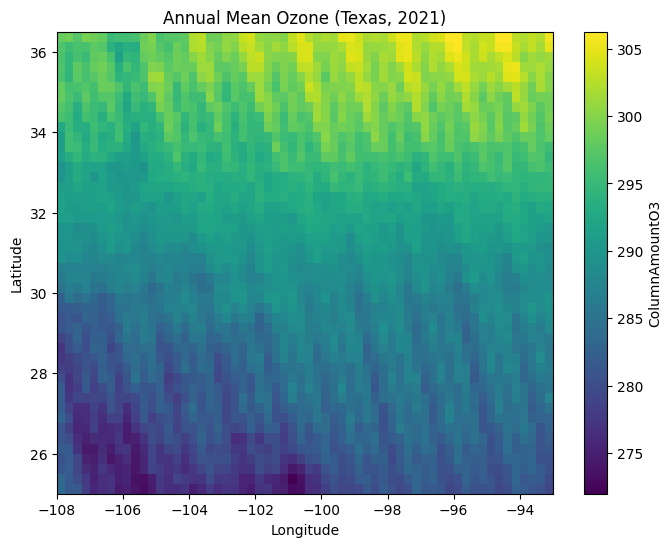

In [112]:
# Directory containing daily Texas subset NetCDF files
input_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2021'

# Open all daily files as a single xarray dataset
ds = xr.open_mfdataset(
    os.path.join(input_dir, '*.nc'),
    combine='by_coords'
)

# Compute annual mean
annual_mean_2021 = ds['ColumnAmountO3'].mean(dim='time', skipna=True)

print("✅ Annual mean calculated for Texas (2021")
print(annual_mean_2021)

# Save to NetCDF
output_file = '/Users/nawarajadhikari/Capstone_project/OMI_O3_Texas_Annual_Mean/OMI_O3_AnnualMean_Texas_2021.nc'
annual_mean_2021.to_netcdf(output_file)
print(f"✅ Saved annual mean to {output_file}")

#plot
plt.figure(figsize=(8, 6))
annual_mean_2021.plot(cmap='viridis')
plt.title('Annual Mean Ozone (Texas, 2021)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Reading .he5 files for 2022

In [56]:
data_dir = '/Users/nawarajadhikari/OMI_O3_Data/2022'

# Path for ozone field
data_path = '/HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ColumnAmountO3'

# Initialize lists
dates = []
ozone_data = []

# Loop through files
for filename in sorted(os.listdir(data_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(data_dir, filename)
        
        # Extract date from filename (omi_O3_YYYYMMDD.he5)
        match = re.search(r'(\d{8})', filename)
        if match:
            date = match.group(1)
        else:
            date = 'unknown'
        
        with h5py.File(file_path, 'r') as f:
            if data_path in f:
                data = f[data_path][()]
                data = np.where(data < 0, np.nan, data)  # Filter invalid values
                
                dates.append(date)
                ozone_data.append(data)
                print(f"✅ Loaded {filename} with shape {data.shape}")
            else:
                print(f"❌ {filename} missing {data_path}")

print(f"\nTotal files read: {len(ozone_data)}")

# Print first file shape
if ozone_data:
    print(f"First file shape: {ozone_data[0].shape}")


✅ Loaded omi_O3_20220101.he5 with shape (720, 1440)
✅ Loaded omi_O3_20220102.he5 with shape (720, 1440)
✅ Loaded omi_O3_20220103.he5 with shape (720, 1440)
✅ Loaded omi_O3_20220104.he5 with shape (720, 1440)
✅ Loaded omi_O3_20220105.he5 with shape (720, 1440)
✅ Loaded omi_O3_20220106.he5 with shape (720, 1440)
✅ Loaded omi_O3_20220107.he5 with shape (720, 1440)
✅ Loaded omi_O3_20220108.he5 with shape (720, 1440)
✅ Loaded omi_O3_20220109.he5 with shape (720, 1440)
✅ Loaded omi_O3_20220110.he5 with shape (720, 1440)
✅ Loaded omi_O3_20220111.he5 with shape (720, 1440)
✅ Loaded omi_O3_20220112.he5 with shape (720, 1440)
✅ Loaded omi_O3_20220113.he5 with shape (720, 1440)
✅ Loaded omi_O3_20220114.he5 with shape (720, 1440)
✅ Loaded omi_O3_20220115.he5 with shape (720, 1440)
✅ Loaded omi_O3_20220116.he5 with shape (720, 1440)
✅ Loaded omi_O3_20220117.he5 with shape (720, 1440)
✅ Loaded omi_O3_20220118.he5 with shape (720, 1440)
✅ Loaded omi_O3_20220119.he5 with shape (720, 1440)
✅ Loaded omi

# Converting .he5 files into .nc for 2022

In [57]:
# Converting .he5 files into .nc files for 2022
# Input and output directories
input_dir = '/Users/nawarajadhikari/OMI_O3_Data/2022'
output_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2022'
os.makedirs(output_dir, exist_ok=True)

# Data path inside HE5 file
data_path = '/HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ColumnAmountO3'

# Generate latitude and longitude arrays (for 0.25° global grid)
lat = np.arange(-89.875, 90, 0.25)
lon = np.arange(-179.875, 180, 0.25)

# Loop through each HE5 file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.he5'):
        match = re.search(r'(\d{8})', filename)
        if not match:
            print(f"Skipping {filename} (no date found)")
            continue

        date_str = match.group(1)
        date = datetime.strptime(date_str, "%Y%m%d")

        file_path = os.path.join(input_dir, filename)

        # Read data
        with h5py.File(file_path, 'r') as f:
            if data_path not in f:
                print(f"Data field missing in {filename}")
                continue

            data = f[data_path][()]
            data = np.where(data < 0, np.nan, data)  # Filter invalid values

        # Create xarray Dataset
        ds = xr.Dataset(
            {
                "ColumnAmountO3": (("lat", "lon"), data)
            },
            coords={
                "lat": lat,
                "lon": lon,
                "time": np.array([date])
            },
            attrs={
                "title": "OMI Total Column Ozone",
                "source": "OMDOAO3e.003",
                "date": date_str,
                "units": "Dobson Units"
            }
        )

        # Save as NetCDF
        output_file = os.path.join(output_dir, f"omi_O3_{date_str}.nc")
        ds.to_netcdf(output_file)
        print(f"✅ Saved {output_file}")


✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2022/omi_O3_20220101.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2022/omi_O3_20220102.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2022/omi_O3_20220103.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2022/omi_O3_20220104.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2022/omi_O3_20220105.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2022/omi_O3_20220106.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2022/omi_O3_20220107.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2022/omi_O3_20220108.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2022/omi_O3_20220109.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2022/omi_O3_20220110.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2022/omi_O3_20220111.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3

# Extracting files for the Texas region for 2022

In [58]:
# Input and output directories
input_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2022'
#/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF
output_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2022'
os.makedirs(output_dir, exist_ok=True)

# Texas bounding box
lat_min, lat_max = 25, 36.5
lon_min, lon_max = -108, -93

for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.nc'):
        input_file = os.path.join(input_dir, filename)

        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        date_str = match.group(1) if match else "unknown"

        # Open NetCDF
        ds = xr.open_dataset(input_file)

        # Subset Texas region
        ds_texas = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

        # Save Texas subset as NetCDF
        output_file = os.path.join(output_dir, f"omi_O3_Texas_{date_str}.nc")
        ds_texas.to_netcdf(output_file)

        print(f"✅ Saved Texas subset: {output_file}")


✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2022/omi_O3_Texas_20220101.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2022/omi_O3_Texas_20220102.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2022/omi_O3_Texas_20220103.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2022/omi_O3_Texas_20220104.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2022/omi_O3_Texas_20220105.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2022/omi_O3_Texas_20220106.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2022/omi_O3_Texas_20220107.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2022/omi_O3_Texas_20220108.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2022/omi_O3_Texas_20220109.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_P

# Computation of Annual Mean for the year 2022

✅ Annual mean calculated for Texas (2022
<xarray.DataArray 'ColumnAmountO3' (lat: 46, lon: 60)> Size: 11kB
dask.array<mean_agg-aggregate, shape=(46, 60), dtype=float32, chunksize=(46, 60), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 368B 25.12 25.38 25.62 25.88 ... 35.88 36.12 36.38
  * lon      (lon) float64 480B -107.9 -107.6 -107.4 ... -93.62 -93.38 -93.12
✅ Saved annual mean to /Users/nawarajadhikari/Capstone_project/OMI_O3_Texas_Annual_Mean/OMI_O3_AnnualMean_Texas_2022.nc


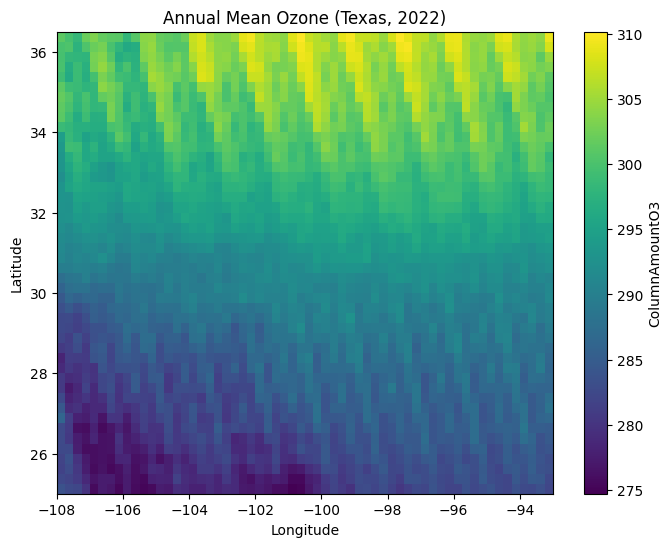

In [113]:
# Directory containing daily Texas subset NetCDF files
input_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2022'

# Open all daily files as a single xarray dataset
ds = xr.open_mfdataset(
    os.path.join(input_dir, '*.nc'),
    combine='by_coords'
)

# Compute annual mean
annual_mean_2022 = ds['ColumnAmountO3'].mean(dim='time', skipna=True)

print("✅ Annual mean calculated for Texas (2022")
print(annual_mean_2022)

# Save to NetCDF
output_file = '/Users/nawarajadhikari/Capstone_project/OMI_O3_Texas_Annual_Mean/OMI_O3_AnnualMean_Texas_2022.nc'
annual_mean_2022.to_netcdf(output_file)
print(f"✅ Saved annual mean to {output_file}")

#plot
plt.figure(figsize=(8, 6))
annual_mean_2022.plot(cmap='viridis')
plt.title('Annual Mean Ozone (Texas, 2022)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Reading .he5 files for 2023

In [59]:
data_dir = '/Users/nawarajadhikari/OMI_O3_Data/2023'

# Path for ozone field
data_path = '/HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ColumnAmountO3'

# Initialize lists
dates = []
ozone_data = []

# Loop through files
for filename in sorted(os.listdir(data_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(data_dir, filename)
        
        # Extract date from filename (omi_O3_YYYYMMDD.he5)
        match = re.search(r'(\d{8})', filename)
        if match:
            date = match.group(1)
        else:
            date = 'unknown'
        
        with h5py.File(file_path, 'r') as f:
            if data_path in f:
                data = f[data_path][()]
                data = np.where(data < 0, np.nan, data)  # Filter invalid values
                
                dates.append(date)
                ozone_data.append(data)
                print(f"✅ Loaded {filename} with shape {data.shape}")
            else:
                print(f"❌ {filename} missing {data_path}")

print(f"\nTotal files read: {len(ozone_data)}")

# Print first file shape
if ozone_data:
    print(f"First file shape: {ozone_data[0].shape}")


✅ Loaded omi_O3_20230101.he5 with shape (720, 1440)
✅ Loaded omi_O3_20230102.he5 with shape (720, 1440)
✅ Loaded omi_O3_20230103.he5 with shape (720, 1440)
✅ Loaded omi_O3_20230104.he5 with shape (720, 1440)
✅ Loaded omi_O3_20230105.he5 with shape (720, 1440)
✅ Loaded omi_O3_20230106.he5 with shape (720, 1440)
✅ Loaded omi_O3_20230107.he5 with shape (720, 1440)
✅ Loaded omi_O3_20230108.he5 with shape (720, 1440)
✅ Loaded omi_O3_20230109.he5 with shape (720, 1440)
✅ Loaded omi_O3_20230110.he5 with shape (720, 1440)
✅ Loaded omi_O3_20230111.he5 with shape (720, 1440)
✅ Loaded omi_O3_20230112.he5 with shape (720, 1440)
✅ Loaded omi_O3_20230113.he5 with shape (720, 1440)
✅ Loaded omi_O3_20230114.he5 with shape (720, 1440)
✅ Loaded omi_O3_20230115.he5 with shape (720, 1440)
✅ Loaded omi_O3_20230116.he5 with shape (720, 1440)
✅ Loaded omi_O3_20230117.he5 with shape (720, 1440)
✅ Loaded omi_O3_20230118.he5 with shape (720, 1440)
✅ Loaded omi_O3_20230119.he5 with shape (720, 1440)
✅ Loaded omi

# Converting .he5 files into .nc for 2023

In [60]:
# Converting .he5 files into .nc files for 2023
# Input and output directories
input_dir = '/Users/nawarajadhikari/OMI_O3_Data/2023'
output_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2023'
os.makedirs(output_dir, exist_ok=True)

# Data path inside HE5 file
data_path = '/HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ColumnAmountO3'

# Generate latitude and longitude arrays (for 0.25° global grid)
lat = np.arange(-89.875, 90, 0.25)
lon = np.arange(-179.875, 180, 0.25)

# Loop through each HE5 file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.he5'):
        match = re.search(r'(\d{8})', filename)
        if not match:
            print(f"Skipping {filename} (no date found)")
            continue

        date_str = match.group(1)
        date = datetime.strptime(date_str, "%Y%m%d")

        file_path = os.path.join(input_dir, filename)

        # Read data
        with h5py.File(file_path, 'r') as f:
            if data_path not in f:
                print(f"Data field missing in {filename}")
                continue

            data = f[data_path][()]
            data = np.where(data < 0, np.nan, data)  # Filter invalid values

        # Create xarray Dataset
        ds = xr.Dataset(
            {
                "ColumnAmountO3": (("lat", "lon"), data)
            },
            coords={
                "lat": lat,
                "lon": lon,
                "time": np.array([date])
            },
            attrs={
                "title": "OMI Total Column Ozone",
                "source": "OMDOAO3e.003",
                "date": date_str,
                "units": "Dobson Units"
            }
        )

        # Save as NetCDF
        output_file = os.path.join(output_dir, f"omi_O3_{date_str}.nc")
        ds.to_netcdf(output_file)
        print(f"✅ Saved {output_file}")


✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2023/omi_O3_20230101.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2023/omi_O3_20230102.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2023/omi_O3_20230103.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2023/omi_O3_20230104.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2023/omi_O3_20230105.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2023/omi_O3_20230106.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2023/omi_O3_20230107.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2023/omi_O3_20230108.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2023/omi_O3_20230109.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2023/omi_O3_20230110.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2023/omi_O3_20230111.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3

# Extracting files for the Texas region for 2023

In [61]:
# Input and output directories
input_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2023'
#/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF
output_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2023'
os.makedirs(output_dir, exist_ok=True)

# Texas bounding box
lat_min, lat_max = 25, 36.5
lon_min, lon_max = -108, -93

for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.nc'):
        input_file = os.path.join(input_dir, filename)

        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        date_str = match.group(1) if match else "unknown"

        # Open NetCDF
        ds = xr.open_dataset(input_file)

        # Subset Texas region
        ds_texas = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

        # Save Texas subset as NetCDF
        output_file = os.path.join(output_dir, f"omi_O3_Texas_{date_str}.nc")
        ds_texas.to_netcdf(output_file)

        print(f"✅ Saved Texas subset: {output_file}")


✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2023/omi_O3_Texas_20230101.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2023/omi_O3_Texas_20230102.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2023/omi_O3_Texas_20230103.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2023/omi_O3_Texas_20230104.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2023/omi_O3_Texas_20230105.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2023/omi_O3_Texas_20230106.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2023/omi_O3_Texas_20230107.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2023/omi_O3_Texas_20230108.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2023/omi_O3_Texas_20230109.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_P

# Computation of Annual Mean for the year 2023

✅ Annual mean calculated for Texas (2023
<xarray.DataArray 'ColumnAmountO3' (lat: 46, lon: 60)> Size: 11kB
dask.array<mean_agg-aggregate, shape=(46, 60), dtype=float32, chunksize=(46, 60), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 368B 25.12 25.38 25.62 25.88 ... 35.88 36.12 36.38
  * lon      (lon) float64 480B -107.9 -107.6 -107.4 ... -93.62 -93.38 -93.12
✅ Saved annual mean to /Users/nawarajadhikari/Capstone_project/OMI_O3_Texas_Annual_Mean/OMI_O3_AnnualMean_Texas_2023.nc


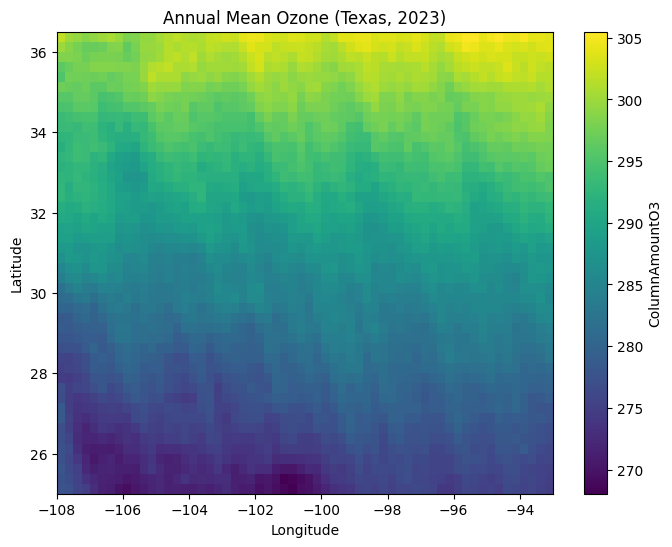

In [114]:
# Directory containing daily Texas subset NetCDF files
input_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2023'

# Open all daily files as a single xarray dataset
ds = xr.open_mfdataset(
    os.path.join(input_dir, '*.nc'),
    combine='by_coords'
)

# Compute annual mean
annual_mean_2023 = ds['ColumnAmountO3'].mean(dim='time', skipna=True)

print("✅ Annual mean calculated for Texas (2023")
print(annual_mean_2023)

# Save to NetCDF
output_file = '/Users/nawarajadhikari/Capstone_project/OMI_O3_Texas_Annual_Mean/OMI_O3_AnnualMean_Texas_2023.nc'
annual_mean_2023.to_netcdf(output_file)
print(f"✅ Saved annual mean to {output_file}")

#plot
plt.figure(figsize=(8, 6))
annual_mean_2023.plot(cmap='viridis')
plt.title('Annual Mean Ozone (Texas, 2023)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Reading .he5 files for 2024

In [62]:
data_dir = '/Users/nawarajadhikari/OMI_O3_Data/2024'

# Path for ozone field
data_path = '/HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ColumnAmountO3'

# Initialize lists
dates = []
ozone_data = []

# Loop through files
for filename in sorted(os.listdir(data_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(data_dir, filename)
        
        # Extract date from filename (omi_O3_YYYYMMDD.he5)
        match = re.search(r'(\d{8})', filename)
        if match:
            date = match.group(1)
        else:
            date = 'unknown'
        
        with h5py.File(file_path, 'r') as f:
            if data_path in f:
                data = f[data_path][()]
                data = np.where(data < 0, np.nan, data)  # Filter invalid values
                
                dates.append(date)
                ozone_data.append(data)
                print(f"✅ Loaded {filename} with shape {data.shape}")
            else:
                print(f"❌ {filename} missing {data_path}")

print(f"\nTotal files read: {len(ozone_data)}")

# Print first file shape
if ozone_data:
    print(f"First file shape: {ozone_data[0].shape}")


✅ Loaded omi_O3_20240101.he5 with shape (720, 1440)
✅ Loaded omi_O3_20240102.he5 with shape (720, 1440)
✅ Loaded omi_O3_20240103.he5 with shape (720, 1440)
✅ Loaded omi_O3_20240104.he5 with shape (720, 1440)
✅ Loaded omi_O3_20240105.he5 with shape (720, 1440)
✅ Loaded omi_O3_20240106.he5 with shape (720, 1440)
✅ Loaded omi_O3_20240107.he5 with shape (720, 1440)
✅ Loaded omi_O3_20240108.he5 with shape (720, 1440)
✅ Loaded omi_O3_20240109.he5 with shape (720, 1440)
✅ Loaded omi_O3_20240110.he5 with shape (720, 1440)
✅ Loaded omi_O3_20240111.he5 with shape (720, 1440)
✅ Loaded omi_O3_20240112.he5 with shape (720, 1440)
✅ Loaded omi_O3_20240113.he5 with shape (720, 1440)
✅ Loaded omi_O3_20240114.he5 with shape (720, 1440)
✅ Loaded omi_O3_20240115.he5 with shape (720, 1440)
✅ Loaded omi_O3_20240116.he5 with shape (720, 1440)
✅ Loaded omi_O3_20240117.he5 with shape (720, 1440)
✅ Loaded omi_O3_20240118.he5 with shape (720, 1440)
✅ Loaded omi_O3_20240119.he5 with shape (720, 1440)
✅ Loaded omi

# Converting .he5 files into .nc for 2024

In [69]:
# Input and output directories
input_dir = '/Users/nawarajadhikari/OMI_O3_Data/2024'
output_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2024'
os.makedirs(output_dir, exist_ok=True)

# Data path inside HE5 file
data_path = '/HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ColumnAmountO3'

# Generate latitude and longitude arrays (for 0.25° global grid)
lat = np.arange(-89.875, 90, 0.25)
lon = np.arange(-179.875, 180, 0.25)

# Loop through files
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(input_dir, filename)

        # Validate file
        if not os.path.isfile(file_path) or os.path.getsize(file_path) == 0:
            print(f"⚠️ Skipping invalid file: {file_path}")
            continue

        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        if not match:
            print(f"⚠️ Skipping {filename} (no date found)")
            continue
        date_str = match.group(1)
        date = datetime.strptime(date_str, "%Y%m%d")

        # Read data
        try:
            with h5py.File(file_path, 'r') as f:
                if data_path not in f:
                    print(f"⚠️ Dataset missing in {filename}")
                    continue
                data = f[data_path][()]
                data = np.where(data < 0, np.nan, data)  # Replace invalid values
        except Exception as e:
            print(f"❌ Error reading {filename}: {e}")
            continue

        # Clean attributes to avoid NetCDF error
        safe_attrs = {
            "title": "OMI Total Column Ozone",
            "source": "OMDOAO3e.003",
            "date": date_str,
            "units": "Dobson Units"
        }

        # Create Dataset
        ds = xr.Dataset(
            {
                "ColumnAmountO3": (("lat", "lon"), data)
            },
            coords={
                "lat": lat,
                "lon": lon,
                "time": [np.datetime64(date)]  # NetCDF safe datetime
            },
            attrs=safe_attrs
        )

        # Save as NetCDF
        output_file = os.path.join(output_dir, f"omi_O3_{date_str}.nc")
        try:
            ds.to_netcdf(output_file, engine="netcdf4")  # Force netCDF4 engine
            print(f"✅ Saved: {output_file}")
        except Exception as e:
            print(f"❌ Error saving {output_file}: {e}")


✅ Saved: /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2024/omi_O3_20240101.nc
✅ Saved: /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2024/omi_O3_20240102.nc
✅ Saved: /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2024/omi_O3_20240103.nc
✅ Saved: /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2024/omi_O3_20240104.nc
✅ Saved: /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2024/omi_O3_20240105.nc
✅ Saved: /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2024/omi_O3_20240106.nc
✅ Saved: /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2024/omi_O3_20240107.nc
✅ Saved: /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2024/omi_O3_20240108.nc
✅ Saved: /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2024/omi_O3_20240109.nc
✅ Saved: /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2024/omi_O3_20240110.nc
✅ Saved: /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2024/omi_O3_20240111.nc
✅ Saved: /Users/nawarajadhikari/Capstone_Pr

# Extracting the files for the Texas region for 2024

In [70]:
# Input and output directories
input_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2024'
#/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF
output_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2024'
os.makedirs(output_dir, exist_ok=True)

# Texas bounding box
lat_min, lat_max = 25, 36.5
lon_min, lon_max = -108, -93

for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.nc'):
        input_file = os.path.join(input_dir, filename)

        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        date_str = match.group(1) if match else "unknown"

        # Open NetCDF
        ds = xr.open_dataset(input_file)

        # Subset Texas region
        ds_texas = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

        # Save Texas subset as NetCDF
        output_file = os.path.join(output_dir, f"omi_O3_Texas_{date_str}.nc")
        ds_texas.to_netcdf(output_file)

        print(f"✅ Saved Texas subset: {output_file}")


✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2024/omi_O3_Texas_20240101.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2024/omi_O3_Texas_20240102.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2024/omi_O3_Texas_20240103.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2024/omi_O3_Texas_20240104.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2024/omi_O3_Texas_20240105.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2024/omi_O3_Texas_20240106.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2024/omi_O3_Texas_20240107.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2024/omi_O3_Texas_20240108.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2024/omi_O3_Texas_20240109.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_P

# Computation of Annual Mean for the year 2024

✅ Annual mean calculated for Texas (2024
<xarray.DataArray 'ColumnAmountO3' (lat: 46, lon: 60)> Size: 11kB
dask.array<mean_agg-aggregate, shape=(46, 60), dtype=float32, chunksize=(46, 60), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 368B 25.12 25.38 25.62 25.88 ... 35.88 36.12 36.38
  * lon      (lon) float64 480B -107.9 -107.6 -107.4 ... -93.62 -93.38 -93.12
✅ Saved annual mean to /Users/nawarajadhikari/Capstone_project/OMI_O3_Texas_Annual_Mean/OMI_O3_AnnualMean_Texas_2024.nc


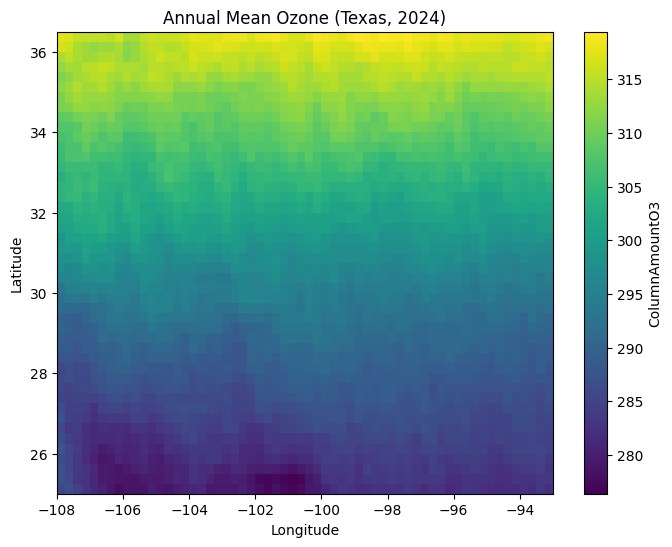

In [115]:
# Directory containing daily Texas subset NetCDF files
input_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2024'

# Open all daily files as a single xarray dataset
ds = xr.open_mfdataset(
    os.path.join(input_dir, '*.nc'),
    combine='by_coords'
)

# Compute annual mean
annual_mean_2024 = ds['ColumnAmountO3'].mean(dim='time', skipna=True)

print("✅ Annual mean calculated for Texas (2024")
print(annual_mean_2024)

# Save to NetCDF
output_file = '/Users/nawarajadhikari/Capstone_project/OMI_O3_Texas_Annual_Mean/OMI_O3_AnnualMean_Texas_2024.nc'
annual_mean_2024.to_netcdf(output_file)
print(f"✅ Saved annual mean to {output_file}")

#plot
plt.figure(figsize=(8, 6))
annual_mean_2024.plot(cmap='viridis')
plt.title('Annual Mean Ozone (Texas, 2024)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Reading .he5 files for 2025

In [71]:
data_dir = '/Users/nawarajadhikari/OMI_O3_Data/2025'

# Path for ozone field
data_path = '/HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ColumnAmountO3'

# Initialize lists
dates = []
ozone_data = []

# Loop through files
for filename in sorted(os.listdir(data_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(data_dir, filename)
        
        # Extract date from filename (omi_O3_YYYYMMDD.he5)
        match = re.search(r'(\d{8})', filename)
        if match:
            date = match.group(1)
        else:
            date = 'unknown'
        
        with h5py.File(file_path, 'r') as f:
            if data_path in f:
                data = f[data_path][()]
                data = np.where(data < 0, np.nan, data)  # Filter invalid values
                
                dates.append(date)
                ozone_data.append(data)
                print(f"✅ Loaded {filename} with shape {data.shape}")
            else:
                print(f"❌ {filename} missing {data_path}")

print(f"\nTotal files read: {len(ozone_data)}")

# Print first file shape
if ozone_data:
    print(f"First file shape: {ozone_data[0].shape}")


✅ Loaded omi_O3_20250101.he5 with shape (720, 1440)
✅ Loaded omi_O3_20250102.he5 with shape (720, 1440)
✅ Loaded omi_O3_20250103.he5 with shape (720, 1440)
✅ Loaded omi_O3_20250104.he5 with shape (720, 1440)
✅ Loaded omi_O3_20250105.he5 with shape (720, 1440)
✅ Loaded omi_O3_20250106.he5 with shape (720, 1440)
✅ Loaded omi_O3_20250107.he5 with shape (720, 1440)
✅ Loaded omi_O3_20250108.he5 with shape (720, 1440)
✅ Loaded omi_O3_20250109.he5 with shape (720, 1440)
✅ Loaded omi_O3_20250110.he5 with shape (720, 1440)
✅ Loaded omi_O3_20250111.he5 with shape (720, 1440)
✅ Loaded omi_O3_20250112.he5 with shape (720, 1440)
✅ Loaded omi_O3_20250113.he5 with shape (720, 1440)
✅ Loaded omi_O3_20250114.he5 with shape (720, 1440)
✅ Loaded omi_O3_20250115.he5 with shape (720, 1440)
✅ Loaded omi_O3_20250116.he5 with shape (720, 1440)
✅ Loaded omi_O3_20250117.he5 with shape (720, 1440)
✅ Loaded omi_O3_20250118.he5 with shape (720, 1440)
✅ Loaded omi_O3_20250119.he5 with shape (720, 1440)
✅ Loaded omi

# Converting .he5 files into .nc for 2025

In [72]:
# Converting .he5 files into .nc files for 2025
# Input and output directories
input_dir = '/Users/nawarajadhikari/OMI_O3_Data/2025'
output_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2025'
os.makedirs(output_dir, exist_ok=True)

# Data path inside HE5 file
data_path = '/HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ColumnAmountO3'

# Generate latitude and longitude arrays (for 0.25° global grid)
lat = np.arange(-89.875, 90, 0.25)
lon = np.arange(-179.875, 180, 0.25)

# Loop through each HE5 file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.he5'):
        match = re.search(r'(\d{8})', filename)
        if not match:
            print(f"Skipping {filename} (no date found)")
            continue

        date_str = match.group(1)
        date = datetime.strptime(date_str, "%Y%m%d")

        file_path = os.path.join(input_dir, filename)

        # Read data
        with h5py.File(file_path, 'r') as f:
            if data_path not in f:
                print(f"Data field missing in {filename}")
                continue

            data = f[data_path][()]
            data = np.where(data < 0, np.nan, data)  # Filter invalid values

        # Create xarray Dataset
        ds = xr.Dataset(
            {
                "ColumnAmountO3": (("lat", "lon"), data)
            },
            coords={
                "lat": lat,
                "lon": lon,
                "time": np.array([date])
            },
            attrs={
                "title": "OMI Total Column Ozone",
                "source": "OMDOAO3e.003",
                "date": date_str,
                "units": "Dobson Units"
            }
        )

        # Save as NetCDF
        output_file = os.path.join(output_dir, f"omi_O3_{date_str}.nc")
        ds.to_netcdf(output_file)
        print(f"✅ Saved {output_file}")


✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2025/omi_O3_20250101.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2025/omi_O3_20250102.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2025/omi_O3_20250103.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2025/omi_O3_20250104.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2025/omi_O3_20250105.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2025/omi_O3_20250106.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2025/omi_O3_20250107.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2025/omi_O3_20250108.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2025/omi_O3_20250109.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2025/omi_O3_20250110.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2025/omi_O3_20250111.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_O3

# Extracting the files for the Texas region for 2025

In [73]:
# Input and output directories
input_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF/2025'
#/Users/nawarajadhikari/Capstone_Project/OMI_O3_NetCDF
output_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2025'
os.makedirs(output_dir, exist_ok=True)

# Texas bounding box
lat_min, lat_max = 25, 36.5
lon_min, lon_max = -108, -93

for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.nc'):
        input_file = os.path.join(input_dir, filename)

        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        date_str = match.group(1) if match else "unknown"

        # Open NetCDF
        ds = xr.open_dataset(input_file)

        # Subset Texas region
        ds_texas = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

        # Save Texas subset as NetCDF
        output_file = os.path.join(output_dir, f"omi_O3_Texas_{date_str}.nc")
        ds_texas.to_netcdf(output_file)

        print(f"✅ Saved Texas subset: {output_file}")


✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2025/omi_O3_Texas_20250101.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2025/omi_O3_Texas_20250102.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2025/omi_O3_Texas_20250103.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2025/omi_O3_Texas_20250104.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2025/omi_O3_Texas_20250105.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2025/omi_O3_Texas_20250106.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2025/omi_O3_Texas_20250107.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2025/omi_O3_Texas_20250108.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2025/omi_O3_Texas_20250109.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_P

# Computation of Annual mean for the year 2025

✅ Annual mean calculated for Texas (2025
<xarray.DataArray 'ColumnAmountO3' (lat: 46, lon: 60)> Size: 11kB
dask.array<mean_agg-aggregate, shape=(46, 60), dtype=float32, chunksize=(46, 60), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 368B 25.12 25.38 25.62 25.88 ... 35.88 36.12 36.38
  * lon      (lon) float64 480B -107.9 -107.6 -107.4 ... -93.62 -93.38 -93.12
✅ Saved annual mean to /Users/nawarajadhikari/Capstone_project/OMI_O3_Texas_Annual_Mean/OMI_O3_AnnualMean_Texas_2025.nc


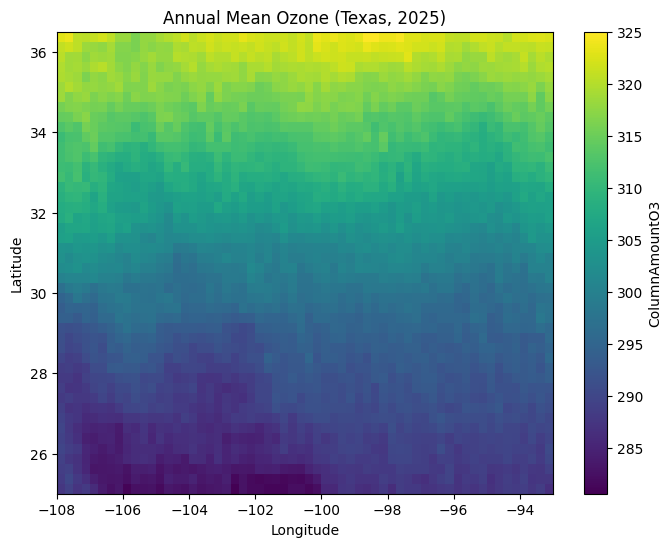

In [116]:
# Directory containing daily Texas subset NetCDF files
input_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas/2025'

# Open all daily files as a single xarray dataset
ds = xr.open_mfdataset(
    os.path.join(input_dir, '*.nc'),
    combine='by_coords'
)

# Compute annual mean
annual_mean_2025 = ds['ColumnAmountO3'].mean(dim='time', skipna=True)

print("✅ Annual mean calculated for Texas (2025")
print(annual_mean_2025)

# Save to NetCDF
output_file = '/Users/nawarajadhikari/Capstone_project/OMI_O3_Texas_Annual_Mean/OMI_O3_AnnualMean_Texas_2025.nc'
annual_mean_2025.to_netcdf(output_file)
print(f"✅ Saved annual mean to {output_file}")

#plot
plt.figure(figsize=(8, 6))
annual_mean_2025.plot(cmap='viridis')
plt.title('Annual Mean Ozone (Texas, 2025)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Checking Annual Mean Diff. from 2025 to 2004

In [119]:
import xarray as xr

file_2004 = '/Users/nawarajadhikari/Capstone_project/OMI_O3_Texas_Annual_Mean/OMI_O3_AnnualMean_Texas_2004.nc'
file_2025 = '/Users/nawarajadhikari/Capstone_project/OMI_O3_Texas_Annual_Mean/OMI_O3_AnnualMean_Texas_2025.nc'

ds_2004 = xr.open_dataset(file_2004)
ds_2025 = xr.open_dataset(file_2025)

mean2004 = ds_2004['ColumnAmountO3']
mean2025 = ds_2025['ColumnAmountO3']

In [120]:
diff = mean2025 - mean2004
print("Difference range:", float(diff.min()), "to", float(diff.max()))
print("Mean difference:", float(diff.mean()))


Difference range: 20.094818115234375 to 47.37103271484375
Mean difference: 31.800575256347656


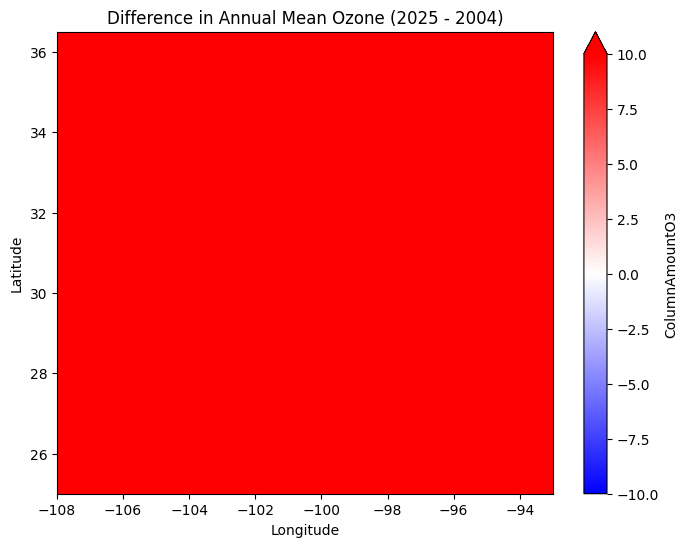

In [121]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
diff.plot(cmap='bwr', vmin=-10, vmax=10)
plt.title('Difference in Annual Mean Ozone (2025 - 2004)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


# Trend Analysis

Trend: 0.631 DU per year
Starting mean (2004): 269.56 DU
Ending mean (2025): 301.36 DU


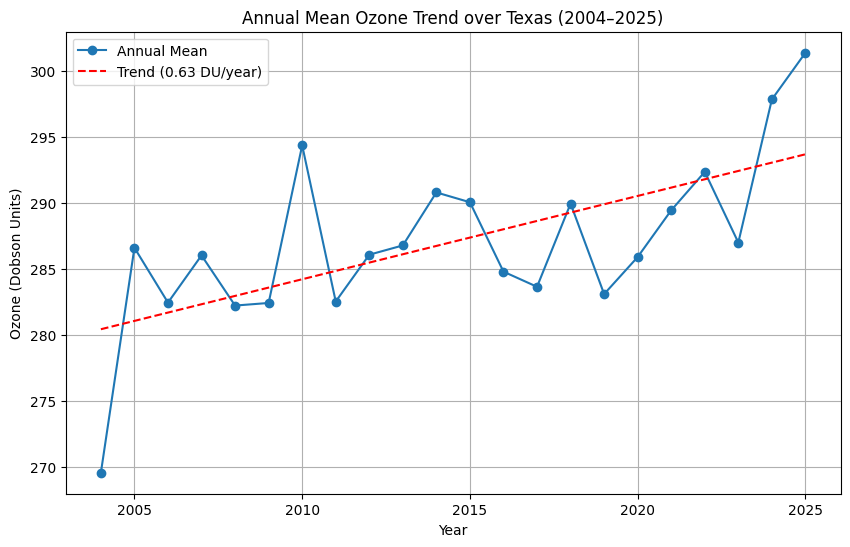

In [ ]:
from sklearn.linear_model import LinearRegression

# Directory where annual mean files are stored
input_dir = '/Users/nawarajadhikari/Capstone_project/OMI_O3_Texas_Annual_Mean'

# Collection of years and mean values
years = []
mean_values = []

for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.nc'):
        match = re.search(r'(\d{4})', filename)
        if match:
            year = int(match.group(1))
            file_path = os.path.join(input_dir, filename)
            ds = xr.open_dataset(file_path)
            
            # Computation of spatial mean over Texas for that year
            mean_o3 = float(ds['ColumnAmountO3'].mean(skipna=True))
            ds.close()
            
            years.append(year)
            mean_values.append(mean_o3)

# Converting to numpy arrays
years = np.array(years).reshape(-1, 1)  # shape (n,1)
mean_values = np.array(mean_values)

# Linear regression for trend
model = LinearRegression()
model.fit(years, mean_values)

trend_slope = model.coef_[0]
trend_intercept = model.intercept_

print(f"Trend: {trend_slope:.3f} DU per year")
print(f"Starting mean (2004): {mean_values[0]:.2f} DU")
print(f"Ending mean (2025): {mean_values[-1]:.2f} DU")

# Trend line
predicted = model.predict(years)

# Plot time series + trend
plt.figure(figsize=(10, 6))
plt.plot(years.flatten(), mean_values, marker='o', label='Annual Mean')
plt.plot(years.flatten(), predicted, color='red', linestyle='--', label=f'Trend ({trend_slope:.2f} DU/year)')
plt.title('Annual Mean Ozone Trend over Texas (2004–2025)')
plt.xlabel('Year')
plt.ylabel('Ozone (Dobson Units)')
plt.grid(True)
plt.legend()
plt.show()


# Spatial trends across Texas

In [127]:
# Calculating the trend (slope) at each grid cell across time, then plotting it on the Texas map.

/Users/nawarajadhikari/anaconda3/envs/omi_env/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


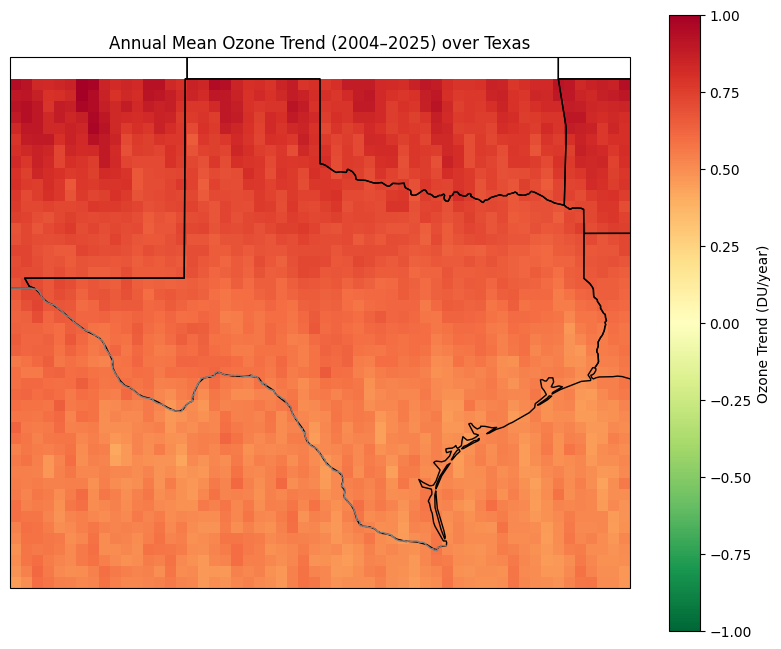

In [125]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Path 
input_dir = '/Users/nawarajadhikari/Capstone_project/OMI_O3_Texas_Annual_Mean'

# Step 1: Annual mean datasets into one DataArray
datasets = []
years = []

for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.nc'):
        match = re.search(r'(\d{4})', filename)
        if match:
            year = int(match.group(1))
            ds = xr.open_dataset(os.path.join(input_dir, filename))
            datasets.append(ds['ColumnAmountO3'])
            years.append(year)

# Combininig into a single DataArray
stacked = xr.concat(datasets, dim='time')
stacked['time'] = years  # Assign years as time dimension

# Step 2: Computation  of trend at each pixel (lat, lon)
years_array = np.array(years).reshape(-1, 1)
slope = np.full(stacked.isel(time=0).shape, np.nan)

for i in range(stacked.shape[1]):  # lat index
    for j in range(stacked.shape[2]):  # lon index
        y = stacked[:, i, j].values
        if np.all(np.isnan(y)):
            continue
        mask = ~np.isnan(y)
        if mask.sum() > 5:  # Only compute if enough data points
            model = LinearRegression()
            model.fit(years_array[mask], y[mask])
            slope[i, j] = model.coef_[0]  # DU/year

# Converting to DataArray
trend = xr.DataArray(
    slope,
    coords={"lat": stacked.lat, "lon": stacked.lon},
    dims=("lat", "lon")
)

# Step 3: Plotting the trend map
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
trend.plot(
    ax=ax,
    cmap='RdYlGn_r',  # Red (positive), Green (negative)
    vmin=-1, vmax=1,  # Adjust for DU/year
    cbar_kwargs={'label': 'Ozone Trend (DU/year)'}
)
ax.add_feature(cfeature.STATES.with_scale('50m'), edgecolor='black')
ax.add_feature(cfeature.BORDERS, edgecolor='gray')
ax.set_extent([-107, -93, 25, 37], crs=ccrs.PlateCarree())
ax.set_title('Annual Mean Ozone Trend (2004–2025) over Texas')

plt.show()


# Checking Trend Magnitudes

In [126]:
print("Min trend:", float(trend.min()), "DU/year")
print("Max trend:", float(trend.max()), "DU/year")
print("Mean trend:", float(trend.mean()), "DU/year")


Min trend: 0.4175491720724078 DU/year
Max trend: 0.9988170518234312 DU/year
Mean trend: 0.6307950250694611 DU/year


Obervation:________

Minimum Trend = 0.42 DU/year:
- The slowest increasing grid cell in Texas still shows a positive trend of about 0.42 Dobson Units per year.
- This means no region in Texas experienced a decrease; ozone levels increased everywhere.

Maximum Trend = 0.99 DU/year:
- The fastest increasing region gained nearly 1 DU/year, which is significant over 21 years (≈ +20 DU total).
- Likely corresponds to northern or northeastern Texas (where the map is darkest red).

Mean Trend = 0.63 DU/year:
- On average, ozone increased by 0.63 DU per year statewide.
- Over the full period (2004–2025), this equates to about +13 DU total, confirming a strong positive trend across Texas.

# Correlation

Aligned Annual Means for Texas:
    year  O3_mean_DU  NO2_mean_mol_cm2
0   2004  269.559662      1.524840e+15
1   2005  286.592407      1.636896e+15
2   2006  282.441467      1.524840e+15
3   2007  286.014496      1.518794e+15
4   2008  282.216309      1.397676e+15
5   2009  282.412689      1.413243e+15
6   2010  294.345032      1.408279e+15
7   2011  282.523163      1.539261e+15
8   2012  286.066559      1.438416e+15
9   2013  286.769501      1.456997e+15
10  2014  290.782806      1.398307e+15
11  2015  290.038666      1.494860e+15
12  2016  284.783386      1.421500e+15
13  2017  283.638184      1.449515e+15
14  2018  289.935120      1.410450e+15
15  2019  283.086090      1.436346e+15
16  2020  285.892029      1.428919e+15
17  2021  289.429962      1.497593e+15
18  2022  292.339661      1.587811e+15
19  2023  286.986450      1.656720e+15
20  2024  297.825317      1.687122e+15
21  2025  301.360382      1.788510e+15

Pearson correlation (NO₂ vs O₃): r = 0.424, p = 0.049


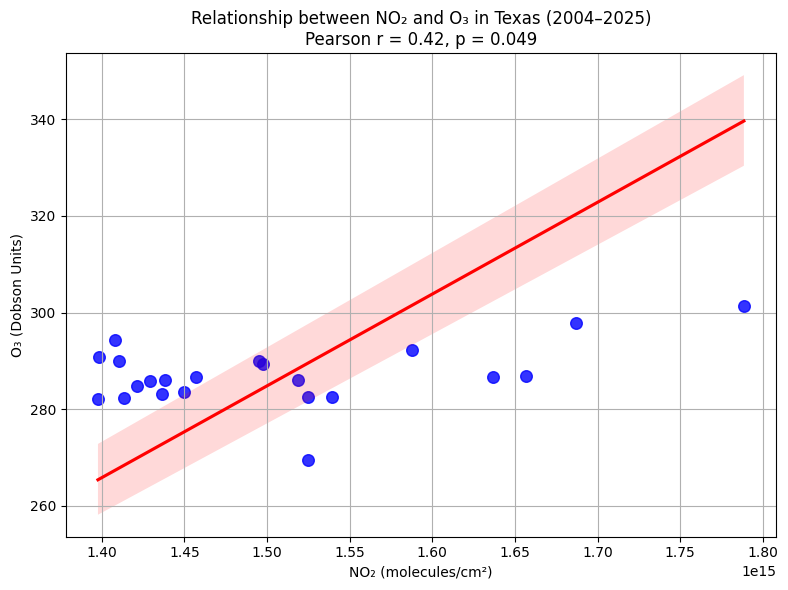

In [151]:
import xarray as xr
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Directories
ozone_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas_Annual_Mean'
no2_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/Texas_Annual_Mean'

# Initialize
ozone_dict = {}
no2_dict = {}

# Ozone annual means
for file in sorted(os.listdir(ozone_dir)):
    if file.endswith('.nc'):
        match = re.search(r'(\d{4})', file)
        if match:
            year = int(match.group(1))
            ds = xr.open_dataset(os.path.join(ozone_dir, file))
            mean_val = float(ds['ColumnAmountO3'].mean(skipna=True))
            ds.close()
            ozone_dict[year] = mean_val

# NO2 annual means
for file in sorted(os.listdir(no2_dir)):
    if file.endswith('.nc'):
        match = re.search(r'(\d{4})', file)
        if match:
            year = int(match.group(1))
            ds = xr.open_dataset(os.path.join(no2_dir, file))
            mean_val = float(ds['ColumnAmountNO2Trop'].mean(skipna=True))  # adjust var name if needed
            ds.close()
            no2_dict[year] = mean_val

# ✅ Align years
common_years = sorted(set(ozone_dict.keys()) & set(no2_dict.keys()))

# Build DataFrame
data = pd.DataFrame({
    'year': common_years,
    'O3_mean_DU': [ozone_dict[y] for y in common_years],
    'NO2_mean_mol_cm2': [no2_dict[y] for y in common_years]
})

print("Aligned Annual Means for Texas:")
print(data)

# ✅ Correlation
corr, p_val = pearsonr(data['NO2_mean_mol_cm2'], data['O3_mean_DU'])
print(f"\nPearson correlation (NO₂ vs O₃): r = {corr:.3f}, p = {p_val:.3f}")

# ✅ Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='NO2_mean_mol_cm2', y='O3_mean_DU', data=data,
            scatter_kws={'s': 70, 'color': 'blue'}, line_kws={'color': 'red'})
plt.title(f'Relationship between NO₂ and O₃ in Texas ({common_years[0]}–{common_years[-1]})\nPearson r = {corr:.2f}, p = {p_val:.3f}')
plt.xlabel('NO₂ (molecules/cm²)')
plt.ylabel('O₃ (Dobson Units)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [153]:
import pandas as pd
import xarray as xr
import os
from scipy.spatial import cKDTree
import numpy as np

In [154]:
benzene_df = pd.read_csv("/Users/nawarajadhikari/Capstone_Project/File3.csv")

# Inspect and filter necessary columns
benzene_df = benzene_df[['MONITOR_LATITUDE', 'MONITOR_LONGITUDE', 'BENZENE']]  
benzene_coords = benzene_df[['MONITOR_LATITUDE', 'MONITOR_LONGITUDE']].values

In [155]:
O3_folder = "/Users/nawarajadhikari/Capstone_Project/OMI_O3_Texas_Annual_Mean"
O3_all = []

for file in os.listdir(O3_folder):
    if file.endswith(".nc") or file.endswith(".nc4"):
        ds = xr.open_dataset(os.path.join(O3_folder, file))

        # Assume lat and lon are 1D
lat = ds['lat'].values    # shape (46,)
lon = ds['lon'].values    # shape (60,)
O3 = ds['ColumnAmountO3'].values  # shape (46, 60)

# Create 2D coordinate grid
lon_grid, lat_grid = np.meshgrid(lon, lat)  # shape (46, 60)

# Flatten everything
lat_flat = lat_grid.flatten()
lon_flat = lon_grid.flatten()
O3_flat = O3.flatten()

# Filter out NaNs in O3
mask = ~np.isnan(O3_flat)

coords = np.column_stack((lat_flat[mask], lon_flat[mask]))
values =O3_flat[mask]

df = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])
df['O3'] = values

O3_all.append(df)

# Combine O3 data
O3_df = pd.concat(O3_all, ignore_index=True)

In [156]:
# KDTree for fast nearest neighbor search
O3_coords = O3_df[['Latitude', 'Longitude']].values
tree = cKDTree(O3_coords)

# Query the nearest O3 point for each Benzene site
distances, indices = tree.query(benzene_coords, k=1)

# Get matched O3 values
benzene_df['Matched_O3'] = O3_df.iloc[indices]['O3'].values


In [157]:
correlation = benzene_df[['BENZENE', 'Matched_O3']].corr().iloc[0, 1]
print(f"📊 Correlation between Benzene and matched O3: {correlation:.3f}")

📊 Correlation between Benzene and matched O3: -0.045


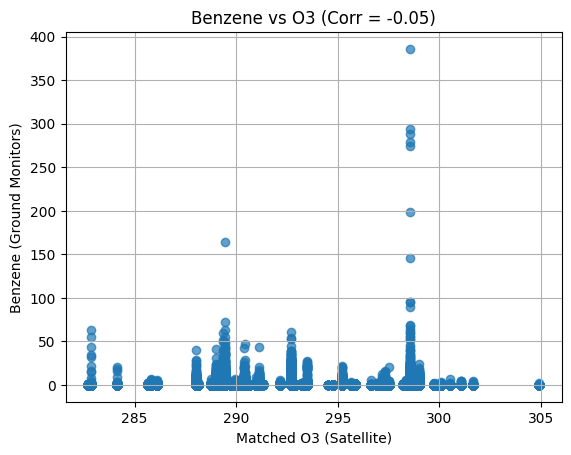

In [158]:
import matplotlib.pyplot as plt

plt.scatter(benzene_df['Matched_O3'], benzene_df['BENZENE'], alpha=0.7)
plt.xlabel("Matched O3 (Satellite)")
plt.ylabel("Benzene (Ground Monitors)")
plt.title(f"Benzene vs O3 (Corr = {correlation:.2f})")
plt.grid(True)
plt.show()

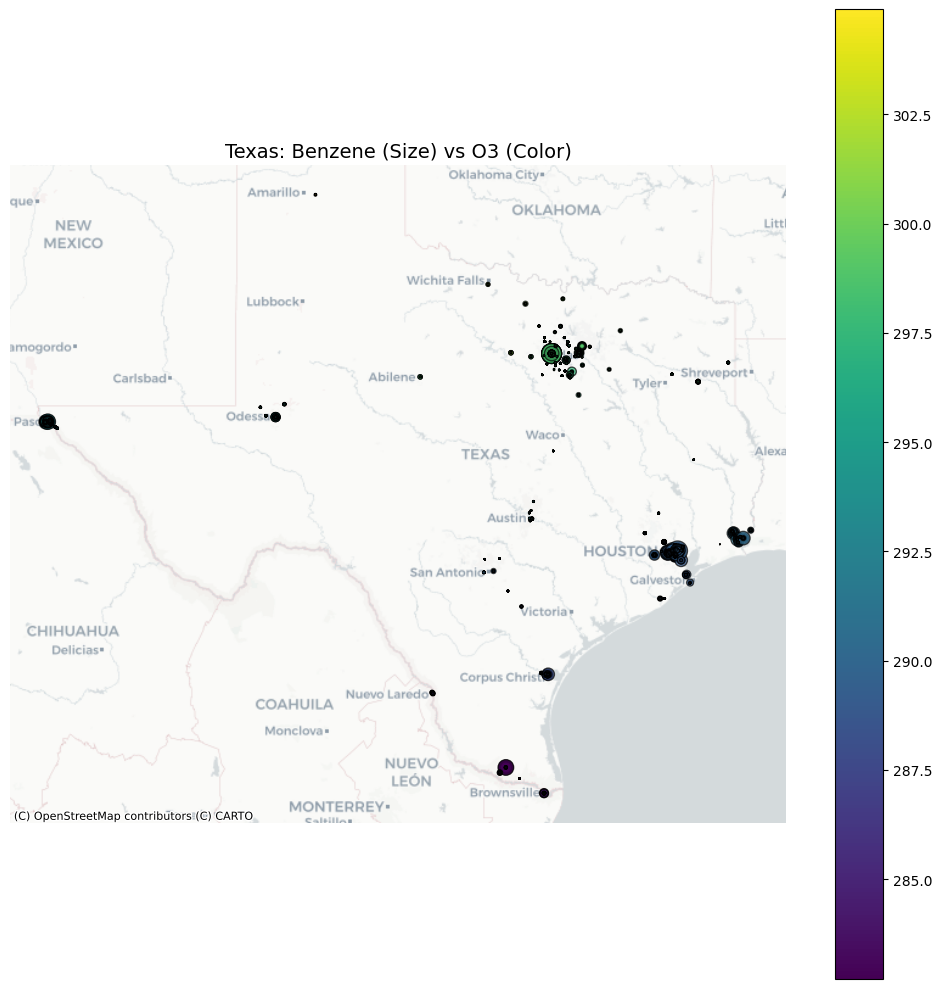

In [159]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(
    benzene_df,
    geometry=gpd.points_from_xy(benzene_df['MONITOR_LONGITUDE'], benzene_df['MONITOR_LATITUDE']),
    crs='EPSG:4326'
)
gdf_web = gdf.to_crs(epsg=3857)

# Handle benzene for size (clean + scale)
size = gdf_web['BENZENE'].clip(lower=0, upper=100).fillna(0) * 2
color = gdf_web['Matched_O3']

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
gdf_web.plot(
    ax=ax,
    markersize=size,
    column=color,
    cmap='viridis',
    legend=True,
    alpha=0.7,
    edgecolor='black'
)

# Use supported base map
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

ax.set_title("Texas: Benzene (Size) vs O3 (Color)", fontsize=14)
ax.set_axis_off()
plt.tight_layout()
plt.show()

# Future Ozone Prediction Using Machine Learning

RF Predictions: [294.27594966 294.27594966 294.27594966 294.27594966 294.27594966
 294.27594966 294.27594966 294.27594966 294.27594966 294.27594966]
Linear Predictions: [296.14809245 296.88094696 297.61380147 298.34665598 299.07951049
 299.812365   300.54521951 301.27807402 302.01092853 302.74378304]


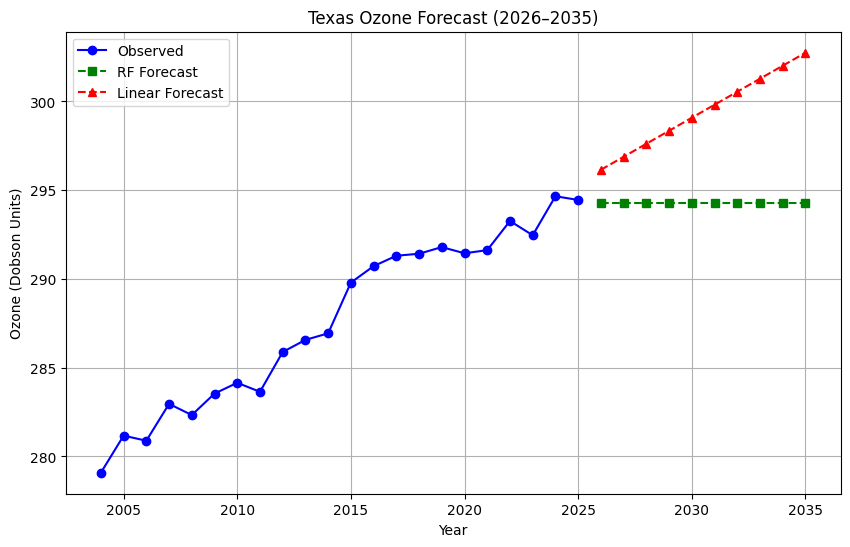

In [144]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Example data
years = np.arange(2004, 2026)
temp_values = np.linspace(18, 20.5, len(years))
solar_values = np.linspace(210, 215, len(years))
ozone_values = np.linspace(280, 295, len(years)) + np.random.normal(0, 0.8, len(years)) # Simulated trend
data = pd.DataFrame({
    'year': years,
    'temp': temp_values,
    'solar': solar_values,
    'ozone': ozone_values
})

# Features and target
X = data[['year', 'temp', 'solar']]
y = data['ozone']

# Train models
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X, y)

lin_model = LinearRegression()
lin_model.fit(X, y)

# Future projections
future_years = np.arange(2026, 2036)
temp_proj = np.linspace(temp_values[-1], temp_values[-1] + 1.0, len(future_years))
solar_proj = np.linspace(solar_values[-1], solar_values[-1] + 2.0, len(future_years))

future_data = pd.DataFrame({
    'year': future_years,
    'temp': temp_proj,
    'solar': solar_proj
})

# Predictions
rf_pred = rf_model.predict(future_data)
lin_pred = lin_model.predict(future_data)

print("RF Predictions:", rf_pred)
print("Linear Predictions:", lin_pred)

# Plot
plt.figure(figsize=(10,6))
plt.plot(years, ozone_values, 'bo-', label='Observed')
plt.plot(future_years, rf_pred, 'gs--', label='RF Forecast')
plt.plot(future_years, lin_pred, 'r^--', label='Linear Forecast')
plt.title('Texas Ozone Forecast (2026–2035)')
plt.xlabel('Year')
plt.ylabel('Ozone (Dobson Units)')
plt.grid()
plt.legend()
plt.show()


# Health Impact Analysis

In [145]:
# Inputs
population = 30_000_000 # Estimated
baseline_rate = 500 / 100_000  # per person
RR_per_10ppb = 1.02

# Forecast ozone in DU (from models)
ozone_2025 = 295
ozone_2035_linear = 302
ozone_2035_RF = 294.5

# Convert DU difference to ppb (approx: 10 DU ≈ 5 ppb)
def du_to_ppb(du_diff):
    return du_diff * 0.5

# Calculate excess cases function
def calculate_excess_cases(o3_start, o3_end):
    du_diff = o3_end - o3_start
    ppb_diff = du_to_ppb(du_diff)
    RR = RR_per_10ppb ** (ppb_diff / 10)
    risk_increase = RR - 1
    baseline_cases = population * baseline_rate
    excess_cases = baseline_cases * risk_increase
    return excess_cases

excess_linear = calculate_excess_cases(ozone_2025, ozone_2035_linear)
excess_RF = calculate_excess_cases(ozone_2025, ozone_2035_RF)

print(f"Excess cases (Linear trend): {excess_linear:.0f} per year")
print(f"Excess cases (Stagnation scenario): {excess_RF:.0f} per year")


Excess cases (Linear trend): 1043 per year
Excess cases (Stagnation scenario): -74 per year


# Checking the Model's Prediction Accuracy

In [146]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Split data: Train = 2004–2019, Test = 2020–2025
train_X = X[X['year'] < 2020]
test_X = X[X['year'] >= 2020]
train_y = y[X['year'] < 2020]
test_y = y[X['year'] >= 2020]

# Fit models again
rf_model.fit(train_X, train_y)
lin_model.fit(train_X, train_y)

# Predictions on test set
rf_test_pred = rf_model.predict(test_X)
lin_test_pred = lin_model.predict(test_X)

# Calculate Metrics
def evaluate_model(name, actual, predicted):
    r2 = r2_score(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)
    print(f"{name} -> R²: {r2:.3f}, RMSE: {rmse:.3f}, MAE: {mae:.3f}")

evaluate_model("Random Forest", test_y, rf_test_pred)
evaluate_model("Linear Regression", test_y, lin_test_pred)


Random Forest -> R²: -1.186, RMSE: 1.863, MAE: 1.428
Linear Regression -> R²: -2.512, RMSE: 2.361, MAE: 2.274


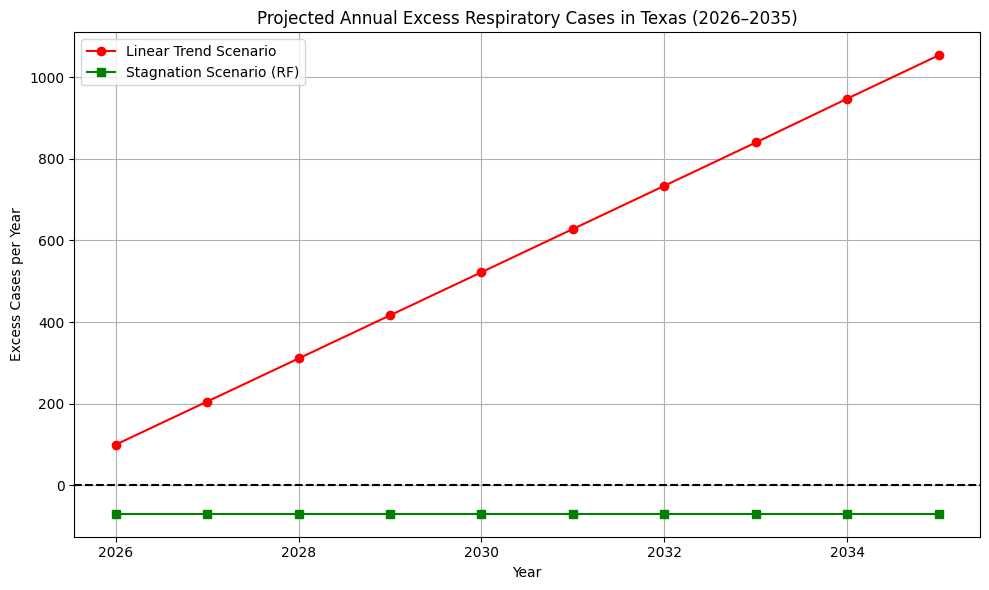

2035 Excess Cases - Linear Trend: 1054
2035 Excess Cases - Stagnation: -70


In [147]:
import numpy as np
import matplotlib.pyplot as plt

# Inputs
population = 30_000_000
baseline_rate = 500 / 100_000  # per person
RR_per_10ppb = 1.02

# Historical & forecast ozone 
ozone_2025 = 295
linear_forecast = np.array([295.67, 296.38, 297.09, 297.80, 298.51, 299.22, 299.93, 300.64, 301.36, 302.07])  # from Linear model
rf_forecast = np.full(len(linear_forecast), 294.53)  # RF forecast is flat

years_future = np.arange(2026, 2036)

# Function to convert DU to ppb and calculate excess cases
def du_to_ppb(du_diff):
    return du_diff * 0.5

def calculate_excess_cases(o3_start, o3_series):
    baseline_cases = population * baseline_rate
    excess_cases = []
    for val in o3_series:
        du_diff = val - o3_start
        ppb_diff = du_to_ppb(du_diff)
        RR = RR_per_10ppb ** (ppb_diff / 10)
        risk_increase = RR - 1
        excess_cases.append(baseline_cases * risk_increase)
    return np.array(excess_cases)

# Calculate excess cases for both scenarios
excess_linear = calculate_excess_cases(ozone_2025, linear_forecast)
excess_rf = calculate_excess_cases(ozone_2025, rf_forecast)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(years_future, excess_linear, 'r-o', label='Linear Trend Scenario')
plt.plot(years_future, excess_rf, 'g-s', label='Stagnation Scenario (RF)')
plt.axhline(0, color='black', linestyle='--')
plt.title('Projected Annual Excess Respiratory Cases in Texas (2026–2035)')
plt.xlabel('Year')
plt.ylabel('Excess Cases per Year')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print summary for last year
print(f"2035 Excess Cases - Linear Trend: {excess_linear[-1]:.0f}")
print(f"2035 Excess Cases - Stagnation: {excess_rf[-1]:.0f}")
